# **Проект: Анализ рынка продажи автомобилей (Казахстан), 2019 г. (Часть 3)**

## **0. Импорт библиотек и загрузка очищенного файла с данными**

In [1]:
# Загрузим библиотеки
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
#import warnings
#warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format ='{:,.2f}'.format
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Создадим датафрейм df на основе файла autokz2019.csv
df = pd.read_csv('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/06_Auto_Kazakhstan/autokz2019_cleared.csv')
df.head(2)

год_месяц     компания бренд модель  год_выпуска страна_производитель  \
0   2019-05  Mercur Auto  Audi     A3         2018                  DEU   
1   2019-08  Mercur Auto  Audi     A3         2018                  DEU   

  вид_топлива  объём_двигателя(л) коробка_передач тип_привода  регион  \
0      бензин                1.40            АКПП         FWD  Алматы   
1      бензин                1.40            АКПП         FWD  Алматы   

   количество  цена(usd)  общая_стоимость_заказа(usd)   область  \
0           1  28,115.00                    28,115.00  г.Алматы   
1           1  32,246.99                    32,246.99  г.Алматы   

      сегментация_2013 класс_2013 производитель объём_двигателя_класс  \
0  Легковые автомобили    C класс            EU                 малый   
1  Легковые автомобили    C класс            EU                 малый   

  категория_заказа_количество    категория_заказа_цена  
0                1 автомобиль  от 25.000 до 35.000 USD  
1                1 автомобиль  от 25.000 до 35.000 USD

In [3]:
# Изменим тип данных столбца 'год_месяц'
df['год_месяц'] = pd.to_datetime(df['год_месяц']).dt.to_period("M")

In [4]:
# Выведем общую информацию об исходном файле с помощью метода .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39954 entries, 0 to 39953
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype    
---  ------                       --------------  -----    
 0   год_месяц                    39954 non-null  period[M]
 1   компания                     39954 non-null  object   
 2   бренд                        39954 non-null  object   
 3   модель                       39954 non-null  object   
 4   год_выпуска                  39954 non-null  int64    
 5   страна_производитель         39954 non-null  object   
 6   вид_топлива                  39954 non-null  object   
 7   объём_двигателя(л)           39954 non-null  float64  
 8   коробка_передач              39954 non-null  object   
 9   тип_привода                  39954 non-null  object   
 10  регион                       39954 non-null  object   
 11  количество                   39954 non-null  int64    
 12  цена(usd)                    39954 non-null  f

**Шпаргалки:**

https://skine.ru/articles/79306/

https://www.codecamp.ru/blog/pandas-groupby-plot/



## **4. Анализ автомобильного рынка в разрезе коммерческого и некомерческого автотранспорта**

### **4.0. Техническое задание раздела**

**План анализа:**

- разделить данные на коммерческий и некоммерческий автотранспорт;
- рассчитать емкость рынка автомобилей: в денежном и количественном выражении;
- определить марки лидеры на рынке автомобилей;
- определить модели-лидеры на рынке;
- показать динамику рынка: общую и по сегментам;
- провести RFM-анализ моделей авто (показатели Frequency и Monetary);
- проанализировать продажи автомобилей в разрезе бренд / сегмент;
- проанализировать продажи автомобилей по маркам;
- проанализировать продажи по регионам;
- проверить гипотезу: стоимость автомобиля зависит от средней заработной платы по региону(области);
- проанализировать продажи автоцентров.

### **4.1. Создадим в датафрейме столбец 'коммерческий автотранспорт'**

Разделить данные на коммерческий и некоммерческий автотранспорт можно по значению 'Коммерческие автомобили'  столбца 'сегментация_2013'

In [5]:
# Создадим столбец 'коммерческий автотранспорт'
df['коммерческий автотранспорт'] = False

In [6]:
# Заполним столбец 'коммерческий автотранспорт' True, если значение столбца 'сегментация_2013' - 'Коммерческие автомобили'
df.loc[df['сегментация_2013']=='Коммерческие автомобили', 'коммерческий автотранспорт'] = True

In [7]:
# Изучим значения столбца 'коммерческий автотранспорт'
df['коммерческий автотранспорт'].value_counts()

False    35630
True      4324
Name: коммерческий автотранспорт, dtype: int64

In [8]:
# Проверим результаты изменений исходного датафрейма с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39954 entries, 0 to 39953
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype    
---  ------                       --------------  -----    
 0   год_месяц                    39954 non-null  period[M]
 1   компания                     39954 non-null  object   
 2   бренд                        39954 non-null  object   
 3   модель                       39954 non-null  object   
 4   год_выпуска                  39954 non-null  int64    
 5   страна_производитель         39954 non-null  object   
 6   вид_топлива                  39954 non-null  object   
 7   объём_двигателя(л)           39954 non-null  float64  
 8   коробка_передач              39954 non-null  object   
 9   тип_привода                  39954 non-null  object   
 10  регион                       39954 non-null  object   
 11  количество                   39954 non-null  int64    
 12  цена(usd)                    39954 non-null  f

_________
________
**Промежуточный вывод:**

- в исходном датафрейме создан столбец 'коммерческий автотранспорт';
- 4324 строк исходного датафрейма относятся к коммерческому автотранспорту;
- 35630 строк исходного датафрейма относятся к некоммерческому автотранспорту.


### **4.2. Анализ емкости автомобильного рынка Казахстана**

**Емкость рынка** определяется, как сумма розничных продаж всех конкурентов в определенном сегменте.

Математически, ёмкость рынка можно выразить следующим образом:

Е = М х С,

где:
Е - емкость рынка в натуральном или денежном выражении (ед./год, руб./год.);

М - количество реализуемого товара в год (ед.);

С - стоимость товара (руб.).

Согласно ТЗ IV-й квартал занимает 40% от объема продаж за I-Ш кварталы на автомобильном рынке Казахстана.

#### **4.2.1. Анализ емкости рынка коммерческого автотранспорта**

In [9]:
# Создадим датафрейм com_market_capacity для анализа емкости рынка коммерческого а/т
com_market_capacity = df[df['коммерческий автотранспорт']==True].pivot_table(index = ['год_месяц'], values = ['количество', 'общая_стоимость_заказа(usd)'], aggfunc='sum').reset_index()
com_market_capacity.columns = ['год_месяц', 'емкость_ед_месяц', 'емкость_usd_месяц']
com_market_capacity

год_месяц  емкость_ед_месяц  емкость_usd_месяц
0   2019-01               351      10,335,644.80
1   2019-02               367      10,197,069.84
2   2019-03               530      18,381,530.64
3   2019-04               517      13,246,812.11
4   2019-05               750      27,076,056.15
5   2019-06               549      18,424,568.90
6   2019-07               870      46,020,951.51
7   2019-08               653      19,544,155.76
8   2019-09               655      22,416,524.44

In [10]:
# Рассчитаем прогнозное значение помесячной емкости рынка на IV квартал
x1 = round(com_market_capacity['емкость_ед_месяц'].sum()/100*40/3)
x2 = round(com_market_capacity['емкость_usd_месяц'].sum()/100*40/3)

In [11]:
# Дополним датафрейм com_market_capacity 3 строками - IV квартал с прогнозными значениями
com_market_capacity.loc[len(com_market_capacity.index)] = ['2019-10', x1, x2]
com_market_capacity.loc[len(com_market_capacity.index)] = ['2019-11', x1, x2]
com_market_capacity.loc[len(com_market_capacity.index)] = ['2019-12', x1, x2]
com_market_capacity

год_месяц  емкость_ед_месяц  емкость_usd_месяц
0    2019-01               351      10,335,644.80
1    2019-02               367      10,197,069.84
2    2019-03               530      18,381,530.64
3    2019-04               517      13,246,812.11
4    2019-05               750      27,076,056.15
5    2019-06               549      18,424,568.90
6    2019-07               870      46,020,951.51
7    2019-08               653      19,544,155.76
8    2019-09               655      22,416,524.44
9    2019-10               699      24,752,442.00
10   2019-11               699      24,752,442.00
11   2019-12               699      24,752,442.00

In [12]:
# Создадим 2 дополнительных столбца с накопленной с начала года емкостью рынка
com_market_capacity["емкость_ед_снг"] = com_market_capacity["емкость_ед_месяц"].cumsum()
com_market_capacity["емкость_usd_снг"] = com_market_capacity["емкость_usd_месяц"].cumsum()
com_market_capacity

год_месяц  емкость_ед_месяц  емкость_usd_месяц  емкость_ед_снг  \
0    2019-01               351      10,335,644.80             351   
1    2019-02               367      10,197,069.84             718   
2    2019-03               530      18,381,530.64            1248   
3    2019-04               517      13,246,812.11            1765   
4    2019-05               750      27,076,056.15            2515   
5    2019-06               549      18,424,568.90            3064   
6    2019-07               870      46,020,951.51            3934   
7    2019-08               653      19,544,155.76            4587   
8    2019-09               655      22,416,524.44            5242   
9    2019-10               699      24,752,442.00            5941   
10   2019-11               699      24,752,442.00            6640   
11   2019-12               699      24,752,442.00            7339   

    емкость_usd_снг  
0     10,335,644.80  
1     20,532,714.64  
2     38,914,245.28  
3     52,161,057.39  
4     79,237,113.54  
5     97,661,682.44  
6    143,682,633.95  
7    163,226,789.71  
8    185,643,314.15  
9    210,395,756.15  
10   235,148,198.15  
11   259,900,640.15

In [13]:
# Выведем описательную статистику помесячной емкости рынка в единицах а/м
com_market_capacity["емкость_ед_месяц"].describe()

count    12.00
mean    611.58
std     153.65
min     351.00
25%     526.75
50%     654.00
75%     699.00
max     870.00
Name: емкость_ед_месяц, dtype: float64

In [14]:
# Выведем описательную статистику помесячной емкости рынка в usd
com_market_capacity["емкость_usd_месяц"].describe()

count           12.00
mean    21,658,386.68
std      9,573,477.59
min     10,197,069.84
25%     17,097,851.01
50%     20,980,340.10
75%     24,752,442.00
max     46,020,951.51
Name: емкость_usd_месяц, dtype: float64

________
________
**Промежуточный вывод:**

По коммерческому автотранспорту рынок Казахстана имеет следующую емкость:

- средняя месячная емкость в еденицах а/м - 612 ед.;
- средняя месячная емкость в USD - 22 млн.USD;
- прогнозная емкость за 2019 г. в еденицах а/м - 7340 ед.;
- прогнозная емкость за 2019 г. в USD - 260 млн.USD.

Визуализации удобнее делать в Datalens.

_______
__________

#### **4.2.2. Анализ емкости рынка некоммерческого автотранспорта**

In [15]:
# Создадим датафрейм non_com_market_capacity для анализа емкости рынка коммерческого а/т
non_com_market_capacity = df[df['коммерческий автотранспорт']==False].pivot_table(index = ['год_месяц'], values = ['количество', 'общая_стоимость_заказа(usd)'], aggfunc='sum').reset_index()
non_com_market_capacity.columns = ['год_месяц', 'емкость_ед_месяц', 'емкость_usd_месяц']
non_com_market_capacity

год_месяц  емкость_ед_месяц  емкость_usd_месяц
0   2019-01              4163     103,406,946.00
1   2019-02              4125     100,106,408.03
2   2019-03              4525     109,685,441.14
3   2019-04              5351     132,852,729.33
4   2019-05              5688     137,049,455.30
5   2019-06              5910     144,339,485.76
6   2019-07              6907     157,123,317.99
7   2019-08              5973     138,678,288.40
8   2019-09              5986     140,104,969.58

In [16]:
# Рассчитаем прогнозное значение помесячной емкости рынка на IV квартал
x1 = round(non_com_market_capacity['емкость_ед_месяц'].sum()/100*40/3)
x2 = round(non_com_market_capacity['емкость_usd_месяц'].sum()/100*40/3)

In [17]:
# Дополним датафрейм non_com_market_capacity 3 строками - IV квартал с прогнозными значениями
non_com_market_capacity.loc[len(non_com_market_capacity.index)] = ['2019-10', x1, x2]
non_com_market_capacity.loc[len(non_com_market_capacity.index)] = ['2019-11', x1, x2]
non_com_market_capacity.loc[len(non_com_market_capacity.index)] = ['2019-12', x1, x2]
non_com_market_capacity

год_месяц  емкость_ед_месяц  емкость_usd_месяц
0    2019-01              4163     103,406,946.00
1    2019-02              4125     100,106,408.03
2    2019-03              4525     109,685,441.14
3    2019-04              5351     132,852,729.33
4    2019-05              5688     137,049,455.30
5    2019-06              5910     144,339,485.76
6    2019-07              6907     157,123,317.99
7    2019-08              5973     138,678,288.40
8    2019-09              5986     140,104,969.58
9    2019-10              6484     155,112,939.00
10   2019-11              6484     155,112,939.00
11   2019-12              6484     155,112,939.00

In [18]:
# Создадим 2 дополнительных столбца с накопленной с начала года емкостью рынка
non_com_market_capacity["емкость_ед_снг"] = non_com_market_capacity["емкость_ед_месяц"].cumsum()
non_com_market_capacity["емкость_usd_снг"] = non_com_market_capacity["емкость_usd_месяц"].cumsum()
non_com_market_capacity

год_месяц  емкость_ед_месяц  емкость_usd_месяц  емкость_ед_снг  \
0    2019-01              4163     103,406,946.00            4163   
1    2019-02              4125     100,106,408.03            8288   
2    2019-03              4525     109,685,441.14           12813   
3    2019-04              5351     132,852,729.33           18164   
4    2019-05              5688     137,049,455.30           23852   
5    2019-06              5910     144,339,485.76           29762   
6    2019-07              6907     157,123,317.99           36669   
7    2019-08              5973     138,678,288.40           42642   
8    2019-09              5986     140,104,969.58           48628   
9    2019-10              6484     155,112,939.00           55112   
10   2019-11              6484     155,112,939.00           61596   
11   2019-12              6484     155,112,939.00           68080   

    емкость_usd_снг  
0    103,406,946.00  
1    203,513,354.03  
2    313,198,795.17  
3    446,051,524.50  
4    583,100,979.80  
5    727,440,465.56  
6    884,563,783.55  
7  1,023,242,071.95  
8  1,163,347,041.53  
9  1,318,459,980.53  
10 1,473,572,919.53  
11 1,628,685,858.53

In [19]:
# Выведем описательную статистику помесячной емкости рынка в единицах а/м
non_com_market_capacity["емкость_ед_месяц"].describe()

count      12.00
mean    5,673.33
std       945.72
min     4,125.00
25%     5,144.50
50%     5,941.50
75%     6,484.00
max     6,907.00
Name: емкость_ед_месяц, dtype: float64

In [20]:
# Выведем описательную статистику помесячной емкости рынка в usd
non_com_market_capacity["емкость_usd_месяц"].describe()

count            12.00
mean    135,723,821.54
std      20,646,116.51
min     100,106,408.03
25%     127,060,907.28
50%     139,391,628.99
75%     155,112,939.00
max     157,123,317.99
Name: емкость_usd_месяц, dtype: float64

________
________
**Промежуточный вывод:**

По некоммерческому автотранспорту рынок Казахстана имеет следующую емкость:

- средняя месячная емкость в еденицах а/м - 5670 ед.;
- средняя месячная емкость в USD - 135 млн.USD;
- прогнозная емкость за 2019 г. в еденицах а/м - 68 100 ед.;
- прогнозная емкость за 2019 г. в USD - 1 629 млн.USD.

Визуализации удобнее делать в Datalens.

__________
__________

In [21]:
# Обогатим данные численностью населения Каахстана и узнаем емкость рынка в ед. а/м на 1000 жителей
df_population = df.groupby('коммерческий автотранспорт')[['количество', 'общая_стоимость_заказа(usd)']].sum().reset_index()
df_population.columns = ['коммерческий_автотранспорт', 'емкость_ед', 'емкость_млн_usd']
df_population['емкость_ед'] = round(df_population['емкость_ед']*1.4).astype('int')
df_population['емкость_млн_usd'] = round(df_population['емкость_млн_usd']*1.4/1000000,1)
df_population['численность_населения_чел'] = (18895567+19131779)/2
df_population['емкость_ед_на_1000_чел'] = np.round_(df_population['емкость_ед']/df_population['численность_населения_чел']*1000, 2)
df_population

коммерческий_автотранспорт  емкость_ед  емкость_млн_usd  \
0                       False       68079         1,628.70   
1                        True        7339           259.90   

   численность_населения_чел  емкость_ед_на_1000_чел  
0              19,013,673.00                    3.58  
1              19,013,673.00                    0.39

### **4.3. Определение модели - лидера автомобильного рынка Казахстана**

Лидерство можно определять по разным критериям:

- по количеству заказов;
- по количеству проданых единиц а/м;
- по сумме продаж в USD.

Обычно на автомобильном рынке лидер продаж определяется по количеству единиц проданных а/м. Используем этот критерий в нашем проекте.

#### **4.3.1. Определение модели - лидера в коммерческом а/т**

In [22]:
# Создадим датафрейм top_com_model для определения модели-лидера на рынке коммерческого а/т
top_com_model = df[df['коммерческий автотранспорт']==True].pivot_table(index = ['бренд', 'модель', 'класс_2013'], values = ['количество'], aggfunc='sum').reset_index()
top_com_model.sort_values(by='количество', ascending=False).head()

бренд    модель                 класс_2013  количество
16    GAZ      3302    Малотоннажные грузовики         998
19    GAZ      Next    Малотоннажные грузовики         416
86    UAZ      3909       Развозные автомобили         390
61  KAMAZ     65115  Крупнотоннажные грузовики         258
3   ANKAI  HFF6850G           Большие автобусы         240

________
________
**Промежуточный вывод:**

Модель - лидер продаж на рынке коммерческого автотранспорта Казахстана - малотоннажный грузовик GAZ 3302 - Газель.

В анализируемом периоде было продано 998 единиц данной модели.

__________
__________

#### **4.3.2. Определение модели - лидера в некоммерческом а/т**

In [23]:
# Создадим датафрейм top_non_com_model для определения модели-лидера на рынке некоммерческого а/т
top_non_com_model = df[df['коммерческий автотранспорт']==False].pivot_table(index = ['бренд', 'модель', 'сегментация_2013'], values = ['количество'], aggfunc='sum').reset_index()
top_non_com_model.sort_values(by='количество', ascending=False).head()

бренд  модель     сегментация_2013  количество
150   Toyota   Camry  Легковые автомобили        4853
68      Lada  Granta  Легковые автомобили        3664
40   Hyundai  Tucson         Внедорожники        3271
71      Lada   Vesta  Легковые автомобили        2653
67      Lada     4x4         Внедорожники        2469

________
________
**Промежуточный вывод:**

Модель - лидер продаж на рынке некоммерческого автотранспорта Казахстана - легковой а/м Toyota	Camry.

В анализируемом периоде было продано 4853 единиц данной модели.

__________
__________

### **4.4. Определение марки (бренда) - лидера автомобильного рынка Казахстана**

#### **4.4.1. Определение марки - лидера в коммерческом а/т**

In [24]:
# Создадим датафрейм top_com_brend для определения марки-лидера на рынке коммерческого а/т
top_com_brend = df[df['коммерческий автотранспорт']==True].pivot_table(index = ['бренд'], values = ['количество'], aggfunc='sum').reset_index()
top_com_brend.sort_values(by='количество', ascending=False).head()

бренд  количество
4       GAZ        1820
10    KAMAZ         890
16      UAZ         844
0     ANKAI         300
6   Hyundai         235

________
________
**Промежуточный вывод:**

Марка - лидер продаж на рынке коммерческого автотранспорта Казахстана - GAZ - Горьковский автомобильный завод.

В анализируемом периоде было продано 1820 единиц данной марки.

__________
__________

#### **4.4.2. Определение марки - лидера в некоммерческом а/т**

In [25]:
# Создадим датафрейм top_non_com_brend для определения марки-лидера на рынке некоммерческого а/т
top_non_com_brend = df[df['коммерческий автотранспорт']==False].pivot_table(index = ['бренд'], values = ['количество'], aggfunc='sum').reset_index()
top_non_com_brend.sort_values(by='количество', ascending=False).head()

бренд  количество
11     Lada       11092
26   Toyota       10745
5   Hyundai       10168
10      Kia        2358
8       Jac        1907

________
________
**Промежуточный вывод:**

Марка - лидер продаж на рынке некоммерческого автотранспорта Казахстана - Lada - АО «АвтоВАЗ».

В анализируемом периоде было продано 11092 единиц данной марки.

__________
__________

### **4.5. Анализ динамики продаж на автомобильном рынке: общая и по сегментам**

#### **4.5.1. Анализ динамики продаж в коммерческом а/т**

In [26]:
# Создадим датафрейм com_sale для анализа динамики продаж коммерческого автотранспорта
com_sale = df[df['коммерческий автотранспорт']==True].pivot_table(index='год_месяц',
                                                                  values='общая_стоимость_заказа(usd)',
                                                                  aggfunc='sum').reset_index()
com_sale.columns = ['год_месяц', 'объем_продаж_млн_usd']
com_sale['объем_продаж_млн_usd'] = round(com_sale['объем_продаж_млн_usd']/1000000)
com_sale['прирост_млн_usd'] = com_sale['объем_продаж_млн_usd'] - com_sale['объем_продаж_млн_usd'].shift()
com_sale['темп_прироста_%'] = com_sale['объем_продаж_млн_usd'].pct_change()*100
com_sale['объем_продаж_млн_usd_снг'] = com_sale['объем_продаж_млн_usd'].cumsum()
(
    com_sale
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

In [27]:
# Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_млн_usd'
com_sale['объем_продаж_млн_usd'].describe()

count    9.00
mean    20.44
std     11.09
min     10.00
25%     13.00
50%     18.00
75%     22.00
max     46.00
Name: объем_продаж_млн_usd, dtype: float64

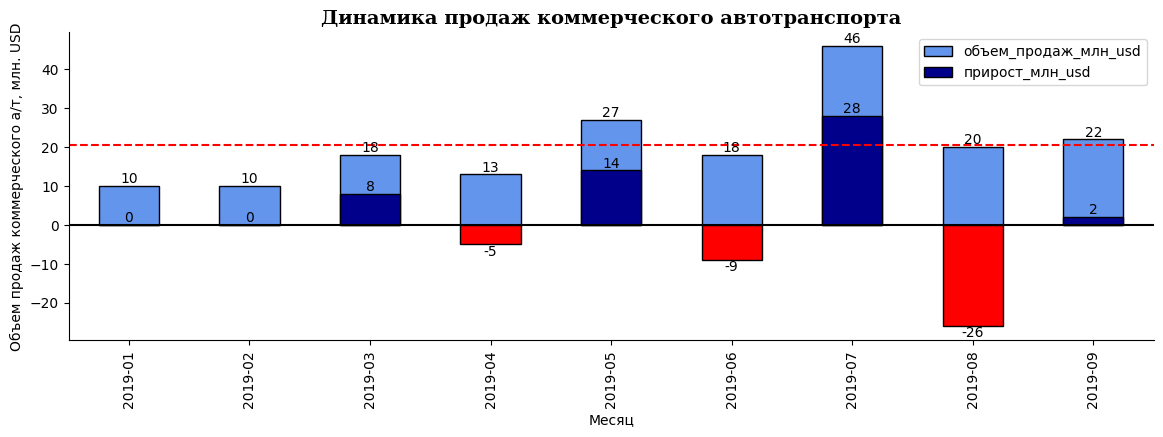

In [28]:
# Визуализируем дикамику продаж коммерческого автотранспорта
fig, ax = plt.subplots()
com_sale.plot(x='год_месяц',
               y='объем_продаж_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color='#6495ED',
               ax=ax)
color = ['r' if i<0 else 'darkblue' for i in com_sale['прирост_млн_usd'].to_list()]
com_sale.plot(x='год_месяц',
               y='прирост_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color=color,
               ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.axhline(y = com_sale['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'black')
plt.title('Динамика продаж коммерческого автотранспорта', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Месяц')
plt.ylabel('Объем продаж коммерческого а/т, млн. USD')
ax = plt.gca ()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

________
________
**Промежуточный вывод:**

Объем продаж коммерческого а/т на рынке Казахстана:

- объем продаж не имеет четко выраженной динамики по месяцам;
- средняя продажа за месяц - 20.44 млн. USD;
- медианная продажа за месяц - 18 млн. USD;
- колебания вокруг среднемесячной продажи +- 10 млн.USD (50%).

Полагаю, что показатели сильно зависят от отдельных сделок, цикл продажи больше, чем у некоммерческого а/т.
__________
__________

#### **4.5.2. Анализ динамики продаж в некоммерческом а/т**

In [29]:
# Создадим датафрейм non_com_sale для анализа динамики продаж некоммерческого автотранспорта
non_com_sale = df[df['коммерческий автотранспорт']==False].pivot_table(index='год_месяц',
                                                                  values='общая_стоимость_заказа(usd)',
                                                                  aggfunc='sum').reset_index()
non_com_sale.columns = ['год_месяц', 'объем_продаж_млн_usd']
non_com_sale['объем_продаж_млн_usd'] = round(non_com_sale['объем_продаж_млн_usd']/1000000)
non_com_sale['прирост_млн_usd'] = non_com_sale['объем_продаж_млн_usd'] - non_com_sale['объем_продаж_млн_usd'].shift()
non_com_sale['темп_прироста_%'] = non_com_sale['объем_продаж_млн_usd'].pct_change()*100
non_com_sale['объем_продаж_млн_usd_снг'] = non_com_sale['объем_продаж_млн_usd'].cumsum()
(
    non_com_sale
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

In [30]:
# Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_млн_usd'
non_com_sale['объем_продаж_млн_usd'].describe()

count     9.00
mean    129.22
std      19.96
min     100.00
25%     110.00
50%     137.00
75%     140.00
max     157.00
Name: объем_продаж_млн_usd, dtype: float64

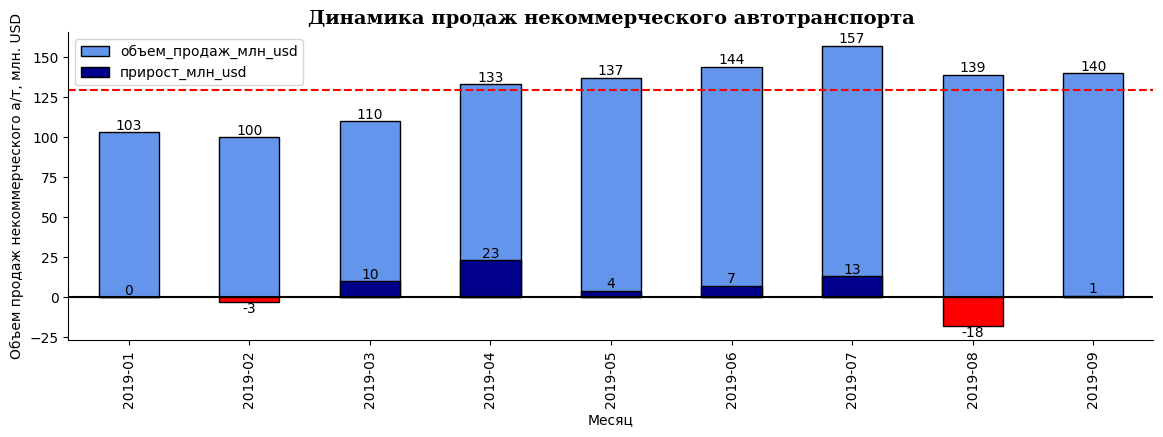

In [31]:
# Визуализируем дикамику продаж некоммерческого автотранспорта
fig, ax = plt.subplots()
non_com_sale.plot(x='год_месяц',
               y='объем_продаж_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color='#6495ED',
               ax=ax)
color = ['r' if i<0 else 'darkblue' for i in non_com_sale['прирост_млн_usd'].to_list()]
non_com_sale.plot(x='год_месяц',
               y='прирост_млн_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color=color,
               ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.axhline(y = non_com_sale['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'black')
plt.title('Динамика продаж некоммерческого автотранспорта', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Месяц')
plt.ylabel('Объем продаж некоммерческого а/т, млн. USD')
ax = plt.gca ()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

________
________
**Промежуточный вывод:**

Объем продаж некоммерческого а/т на рынке Казахстана:

- объем продаж имеет сезонный характер: I квартал- снижение, IV квартал - рост;
- средняя продажа за месяц - 129 млн. USD;
- медианная продажа за месяц - 137 млн. USD;
- колебания вокруг среднемесячной продажи +- 30-50 млн.USD (10%-20%).

Полагаю, что показатели не зависят от отдельных сделок, цикл продажи короче, чем у коммерческого а/т.
__________
__________

#### **4.5.3. Анализ динамики продаж в некоммерческом а/т в разрезе сегментов**

In [32]:
set(df[df['коммерческий автотранспорт']==False]['сегментация_2013'].to_list())

{'Внедорожники', 'Легковые автомобили', 'Минивэны', 'Пикапы'}


Таблица объемы продаж некоммерческого а/т в разрезе сегментов - Пикапы




Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_тыс_usd' - Пикапы



count       9.00
mean    3,224.67
std       969.51
min     1,959.00
25%     2,585.00
50%     3,060.00
75%     3,636.00
max     4,904.00
Name: объем_продаж_тыс_usd, dtype: float64


Визуализируем дикамику продаж некоммерческого автотранспорта - Пикапы



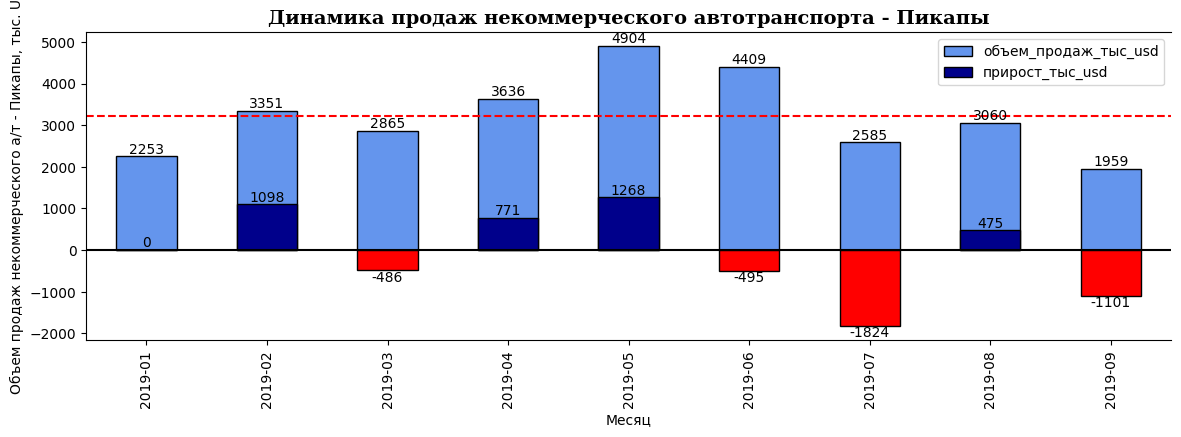


Таблица объемы продаж некоммерческого а/т в разрезе сегментов - Легковые автомобили




Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_тыс_usd' - Легковые автомобили



count        9.00
mean    49,730.00
std      9,504.22
min     32,907.00
25%     45,747.00
50%     51,004.00
75%     55,353.00
max     63,305.00
Name: объем_продаж_тыс_usd, dtype: float64


Визуализируем дикамику продаж некоммерческого автотранспорта - Легковые автомобили



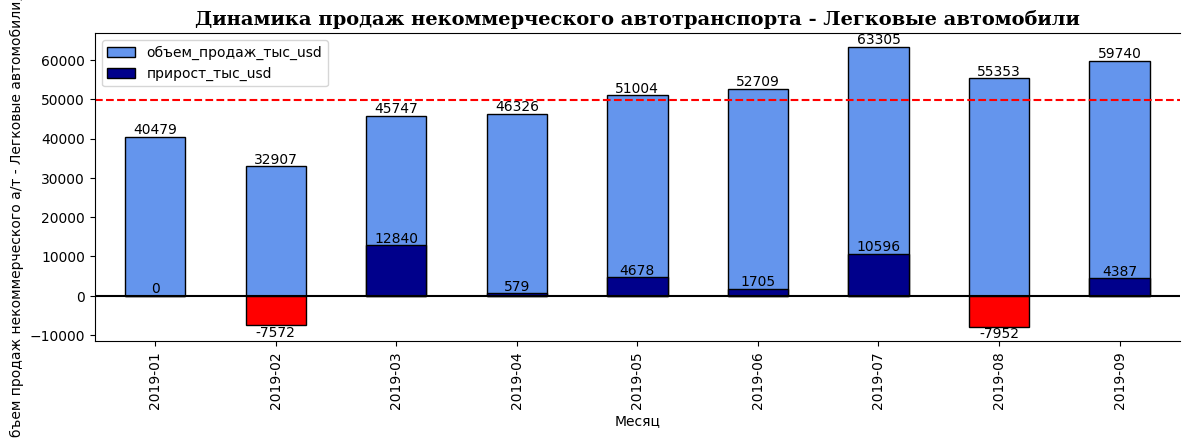


Таблица объемы продаж некоммерческого а/т в разрезе сегментов - Минивэны




Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_тыс_usd' - Минивэны



count       9.00
mean    2,529.44
std       579.27
min     1,760.00
25%     2,017.00
50%     2,888.00
75%     2,934.00
max     3,272.00
Name: объем_продаж_тыс_usd, dtype: float64


Визуализируем дикамику продаж некоммерческого автотранспорта - Минивэны



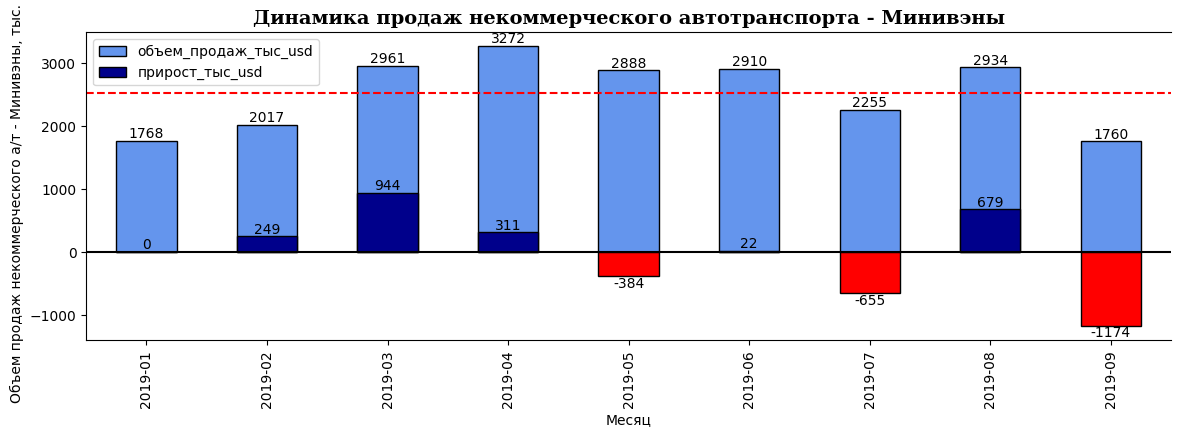


Таблица объемы продаж некоммерческого а/т в разрезе сегментов - Внедорожники




Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_тыс_usd' - Внедорожники



count        9.00
mean    73,776.78
std     11,326.32
min     58,112.00
25%     61,832.00
50%     77,332.00
75%     79,620.00
max     88,978.00
Name: объем_продаж_тыс_usd, dtype: float64


Визуализируем дикамику продаж некоммерческого автотранспорта - Внедорожники



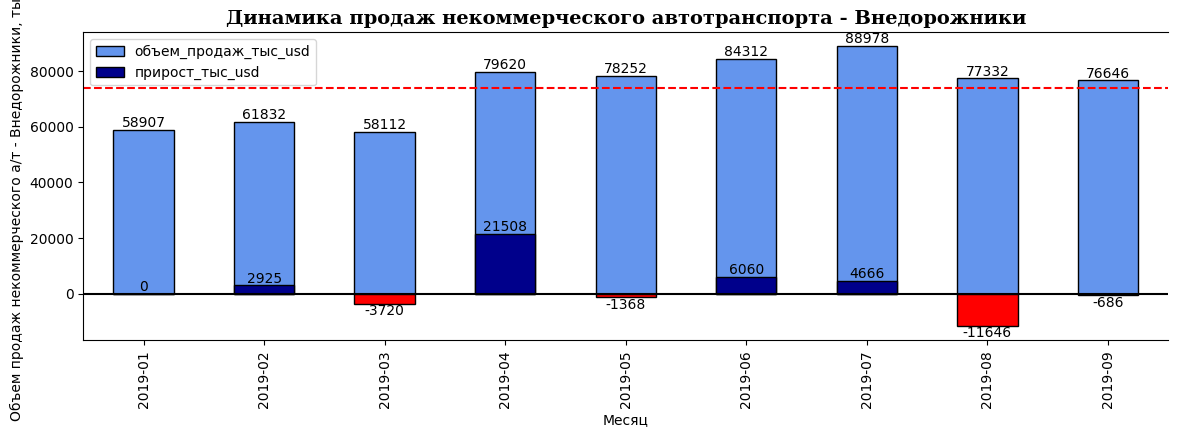

In [33]:
# Создадим датафрейм non_com_sale2 для анализа динамики продаж некоммерческого автотранспорта
for i in set(df[df['коммерческий автотранспорт']==False]['сегментация_2013'].to_list()):
    print()
    print(f'Таблица объемы продаж некоммерческого а/т в разрезе сегментов - {i}')
    print()
    non_com_sale2 = df[(df['коммерческий автотранспорт']==False)&(df['сегментация_2013']==i)].pivot_table(index='год_месяц', values='общая_стоимость_заказа(usd)',aggfunc='sum').reset_index()
    non_com_sale2.columns = ['год_месяц', 'объем_продаж_тыс_usd']
    non_com_sale2['объем_продаж_тыс_usd'] = round(non_com_sale2['объем_продаж_тыс_usd']/1000)
    non_com_sale2['прирост_тыс_usd'] = non_com_sale2['объем_продаж_тыс_usd'] - non_com_sale2['объем_продаж_тыс_usd'].shift()
    non_com_sale2['темп_прироста_%'] = non_com_sale2['объем_продаж_тыс_usd'].pct_change()*100
    non_com_sale2['объем_продаж_тыс_usd_снг'] = non_com_sale2['объем_продаж_тыс_usd'].cumsum()
    display(non_com_sale2.style.background_gradient(cmap='GnBu', axis=0))
    print()
    print(f"Посмотрим на описательную статистику месячных продаж - столбец 'объем_продаж_тыс_usd' - {i}")
    print()
    display(non_com_sale2['объем_продаж_тыс_usd'].describe())
    print()
    print(f"Визуализируем дикамику продаж некоммерческого автотранспорта - {i}")
    print()
    fig, ax = plt.subplots()
    non_com_sale2.plot(x='год_месяц',
               y='объем_продаж_тыс_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color='#6495ED',
               ax=ax)
    color = ['r' if i<0 else 'darkblue' for i in non_com_sale2['прирост_тыс_usd'].to_list()]
    non_com_sale2.plot(x='год_месяц',
               y='прирост_тыс_usd',
               kind = 'bar',
               figsize=(14, 4),
               edgecolor = 'black',
               color=color,
               ax=ax)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.axhline(y = non_com_sale2['объем_продаж_тыс_usd'].mean(), color = 'r', linestyle = '--')
    plt.axhline(y = 0, color = 'black')
    plt.title(f'Динамика продаж некоммерческого автотранспорта - {i}', font={'weight':'bold', 'size': '14', 'family':'serif'})
    plt.xlabel('Месяц')
    plt.ylabel(f'Объем продаж некоммерческого а/т - {i}, тыс. USD')
    ax = plt.gca ()
    ax.spines['right'].set_visible(False)
    plt.show()


________
________
**Промежуточный вывод:**

Объем продаж некоммерческого а/т на рынке Казахстана в разрезе сегментов а/т:

у каждого сегмента свои объемные показатели, но общая картина та же, что у некоммерческого а/т в целом:

- сезонность: I квартал - снижение продаж, IV - ожидаемый рост;
- слабая зависимость от отдельной сделки;
- короткий цикл продаж.
__________
__________

#### **4.5.4. Альтернативный вариант анализа динамики продаж в а/т в общем и в разрезе сегментов**

______________
Можно все сделать проще, но менее наглядно.

Красивую визуализацию быстрее и интерактивнее построить в Datalens.
________________

In [34]:
# Создадим таблицу общий объем продаж, без учета сегментов
all_sales = df.pivot_table(index='год_месяц',
                          values = 'общая_стоимость_заказа(usd)',
                          aggfunc='sum').reset_index()
all_sales.columns = ['год_месяц', 'объем_продаж_млн_usd']
all_sales['объем_продаж_млн_usd'] = round(all_sales['объем_продаж_млн_usd']/1000000, 3)
all_sales['прирост_млн_usd'] = all_sales['объем_продаж_млн_usd'] - all_sales['объем_продаж_млн_usd'].shift()
all_sales['темп_прироста_%'] = all_sales['объем_продаж_млн_usd'].pct_change()*100
all_sales['объем_продаж_млн_usd_снг'] = all_sales['объем_продаж_млн_usd'].cumsum()
all_sales.style.background_gradient(cmap='GnBu', axis=0)

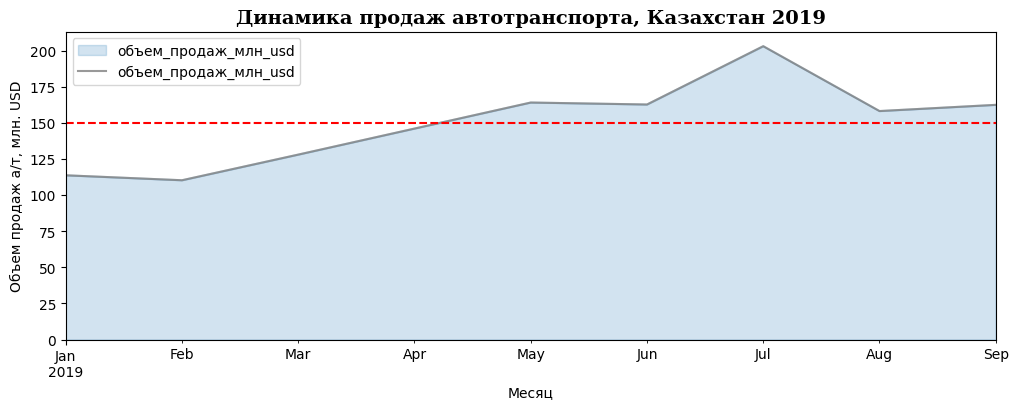

In [35]:
# Построим график динамики общих продаж без учета сегментов
fig, ax = plt.subplots()
all_sales.plot(x='год_месяц',
               y='объем_продаж_млн_usd',
               kind = 'area',
               alpha = 0.2,
               figsize=(12, 4),
               ax = ax)
all_sales.plot(x='год_месяц',
               y='объем_продаж_млн_usd',
               color = 'grey',
               alpha = 0.8,
               figsize=(12, 4),
               ax=ax)
plt.axhline(y = all_sales['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
plt.title('Динамика продаж автотранспорта, Казахстан 2019', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Месяц')
plt.ylabel('Объем продаж а/т, млн. USD')
plt.show()

In [36]:
# Создадим таблицу объем продаж в разрезе сегментов
segments_sales = df.pivot_table(index=['год_месяц', 'сегментация_2013'],
                                       values = 'общая_стоимость_заказа(usd)',
                                       aggfunc='sum').reset_index()
segments_sales.columns = ['год_месяц', 'сегмент', 'объем_продаж_млн_usd']
segments_sales['объем_продаж_млн_usd'] = round(segments_sales['объем_продаж_млн_usd']/1000000, 2)
segments_sales['прирост_млн_usd'] = segments_sales['объем_продаж_млн_usd'] - segments_sales['объем_продаж_млн_usd'].shift()
segments_sales['темп_прироста_%'] = segments_sales['объем_продаж_млн_usd'].pct_change()*100
segments_sales['объем_продаж_млн_usd_снг'] = segments_sales['объем_продаж_млн_usd'].cumsum()
segments_sales.set_index('год_месяц', inplace= True)
segments_sales.head()

сегмент  объем_продаж_млн_usd  прирост_млн_usd  \
год_месяц                                                                   
2019-01               Внедорожники                 58.91              NaN   
2019-01    Коммерческие автомобили                 10.34           -48.57   
2019-01        Легковые автомобили                 40.48            30.14   
2019-01                   Минивэны                  1.77           -38.71   
2019-01                     Пикапы                  2.25             0.48   

           темп_прироста_%  объем_продаж_млн_usd_снг  
год_месяц                                             
2019-01                NaN                     58.91  
2019-01             -82.45                     69.25  
2019-01             291.49                    109.73  
2019-01             -95.63                    111.50  
2019-01              27.12                    113.75

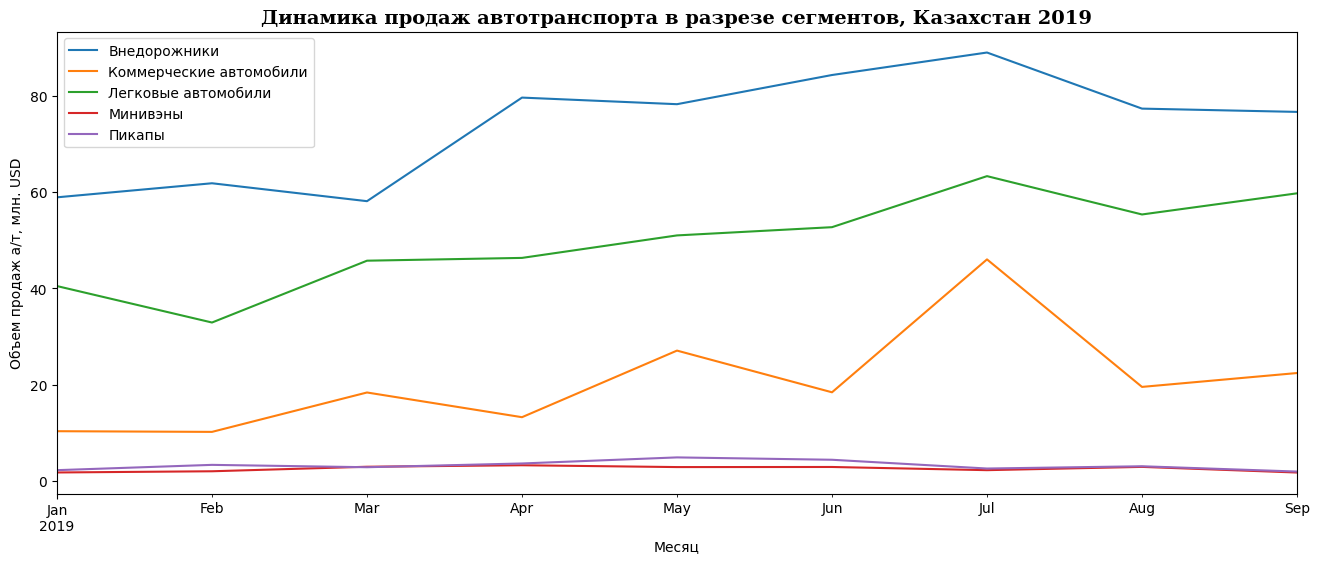

In [37]:
# Построим график динамики продаж в разрезе сегментов
segments_sales.groupby('сегмент')['объем_продаж_млн_usd'].plot(legend = True,
                                                              figsize=(16, 6))
plt.title('Динамика продаж автотранспорта в разрезе сегментов, Казахстан 2019', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Месяц')
plt.ylabel('Объем продаж а/т, млн. USD')
plt.show()

### **4.6.  Анализ продаж в разрезе бренд/сегмент**

In [38]:
# Вспомним названия сегментов
df['сегментация_2013'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [39]:
# Объявим функцию analysys, которая анализирует объем продаж а/м в разрезе бренд/сегмент
def analysys(i):
    print()
    print(f"Создадим таблицу объем продаж в разрезе брендов - сегиент{i}")
    print()

    sales = df[df['сегментация_2013']==i].pivot_table(index=['год_месяц', 'бренд'],
                                                      values = 'общая_стоимость_заказа(usd)',
                                                      aggfunc='sum').reset_index()
    sales.columns = ['год_месяц', 'бренд', 'объем_продаж_млн_usd']
    sales['объем_продаж_млн_usd'] = round(sales['объем_продаж_млн_usd']/1000000, 2)
    display(sales.head())

    print()
    print(f"Узнаем топ-5 брендов по количеству проданных а/м - сегмент {i}")
    print()
    top_brends = sales.groupby('бренд').agg({'объем_продаж_млн_usd':'sum'}).reset_index().sort_values(by='объем_продаж_млн_usd', ascending=False)
    top_brends.head()

    print()
    print(f"Построим график динамики продаж в разрезе брендов - сегмент {i}")
    print()
    for j in set(sales['бренд'].to_list()):
        print()
        print(j)
        print()
        sales[sales['бренд']==j].plot(x = 'год_месяц',
                                      y = 'объем_продаж_млн_usd',
                                      kind = 'bar',
                                      legend = True,
                                      figsize=(10, 4))
        plt.axhline(y = sales[sales['бренд']==j]['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
        plt.title(f'Динамика продаж автотранспорта - сегмент {i} бренд {j}, Казахстан 2019', font={'weight':'bold', 'size': '14', 'family':'serif'})
        plt.xlabel('Месяц')
        plt.ylabel('Объем продаж а/т, млн. USD')
        plt.show()

#### **4.6.1.  Анализ продаж в разрезе брендов - сегмент 'Легковые автомобили'**


Создадим таблицу объем продаж в разрезе брендов - сегиентЛегковые автомобили



год_месяц      бренд  объем_продаж_млн_usd
0   2019-01       Audi                  0.13
1   2019-01        BMW                  0.18
2   2019-01  Chevrolet                  0.01
3   2019-01       Ford                  0.01
4   2019-01    Hyundai                  6.09


Узнаем топ-5 брендов по количеству проданных а/м - сегмент Легковые автомобили


Построим график динамики продаж в разрезе брендов - сегмент Легковые автомобили


Mazda



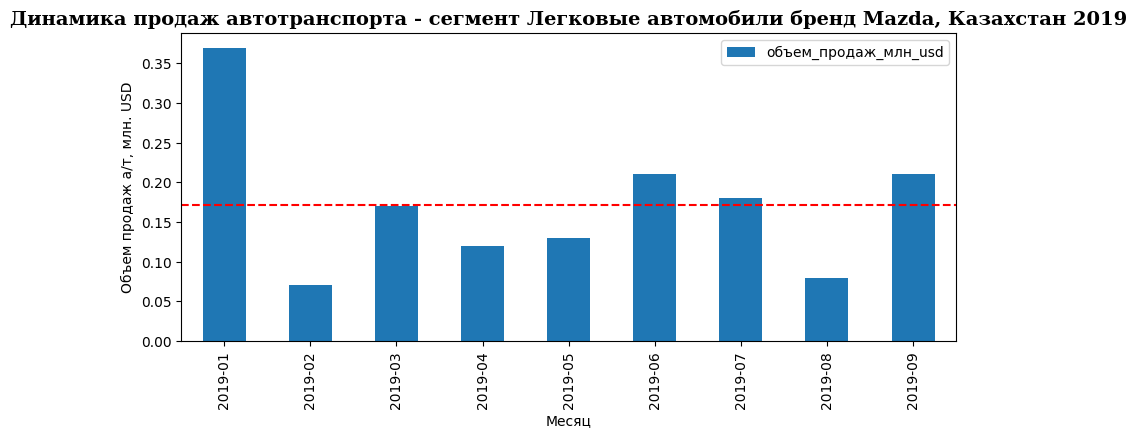


Jac



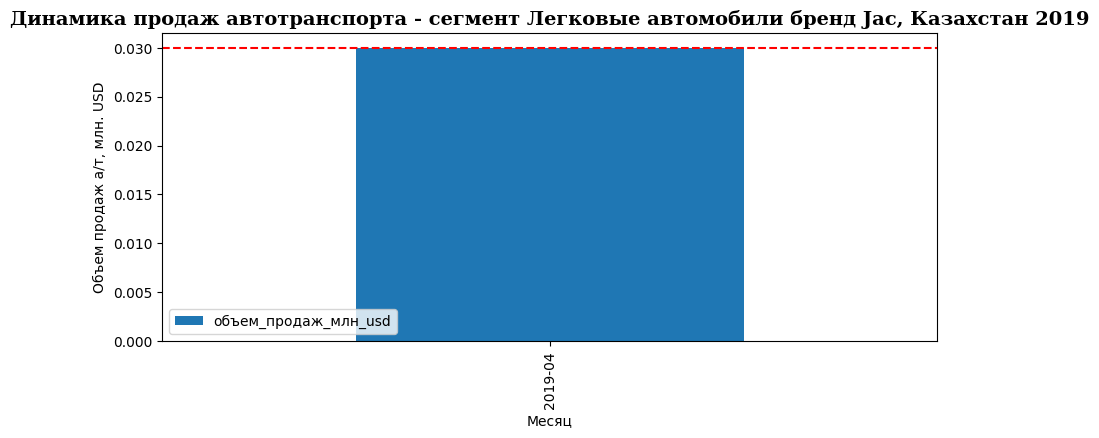


Kia



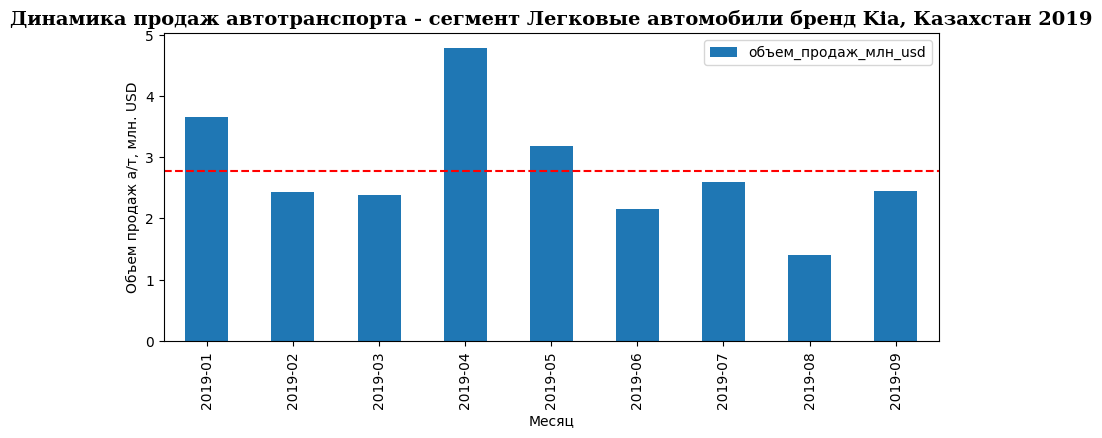


Nissan



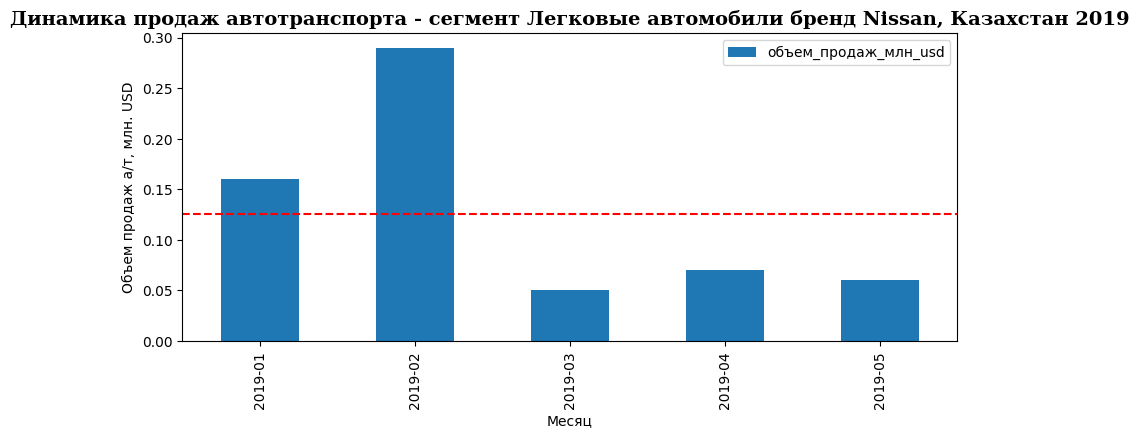


Renault



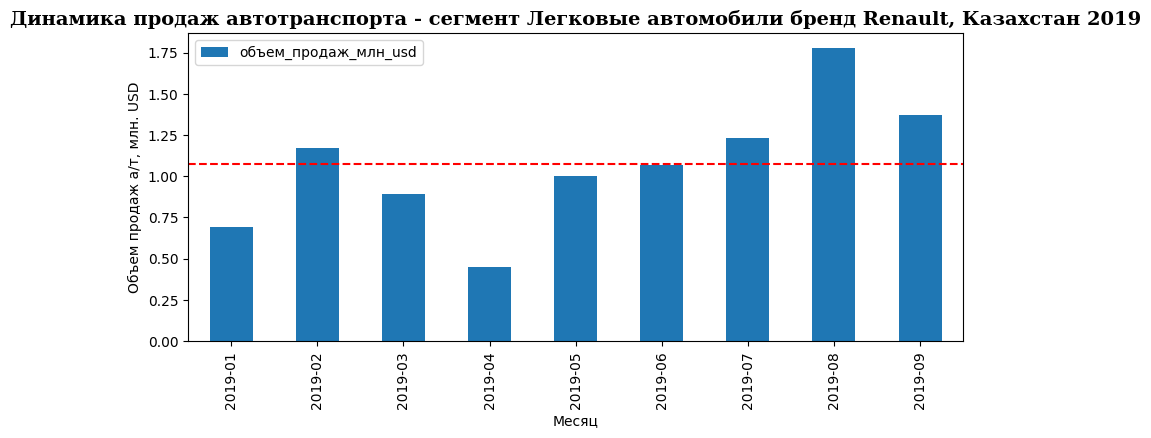


Lada



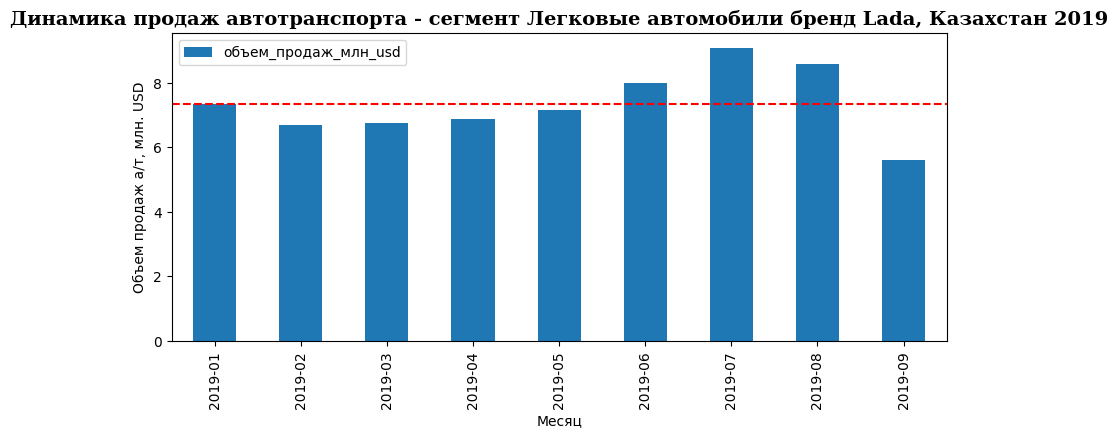


Lexus



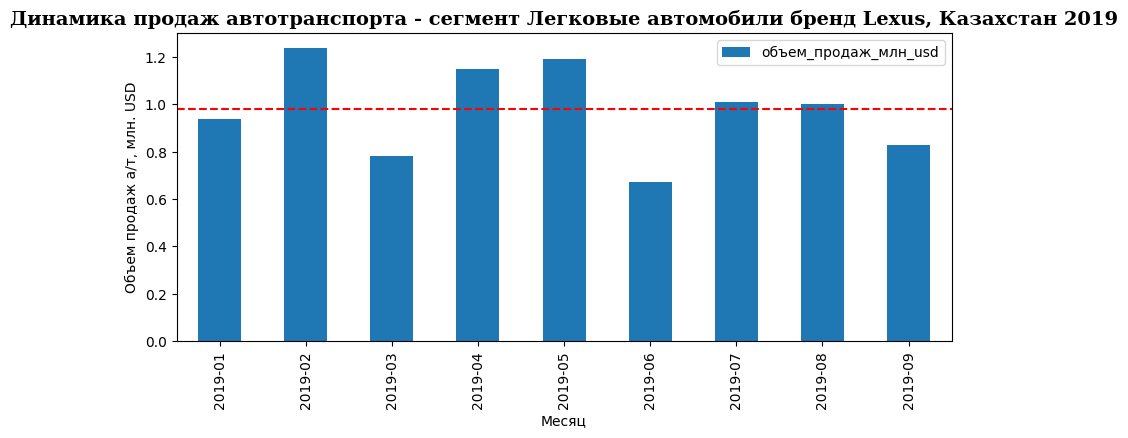


Lifan



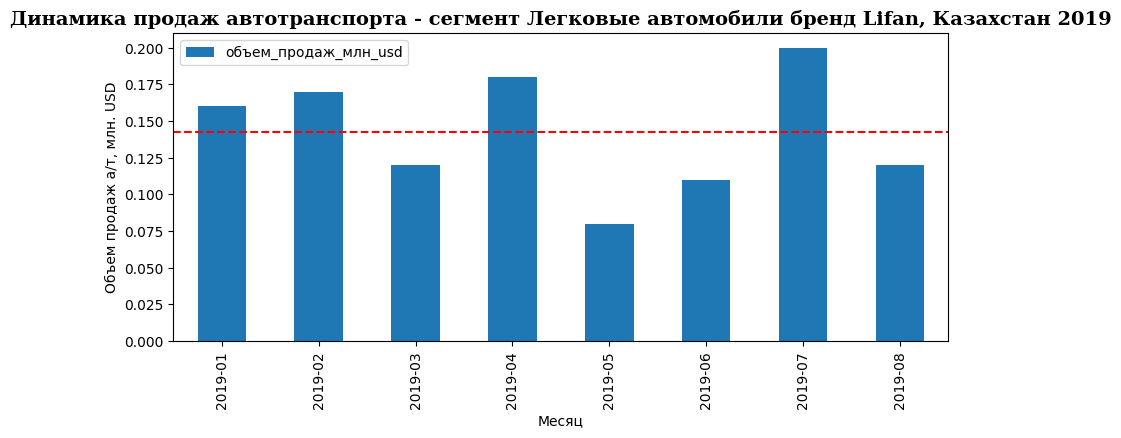


Chevrolet



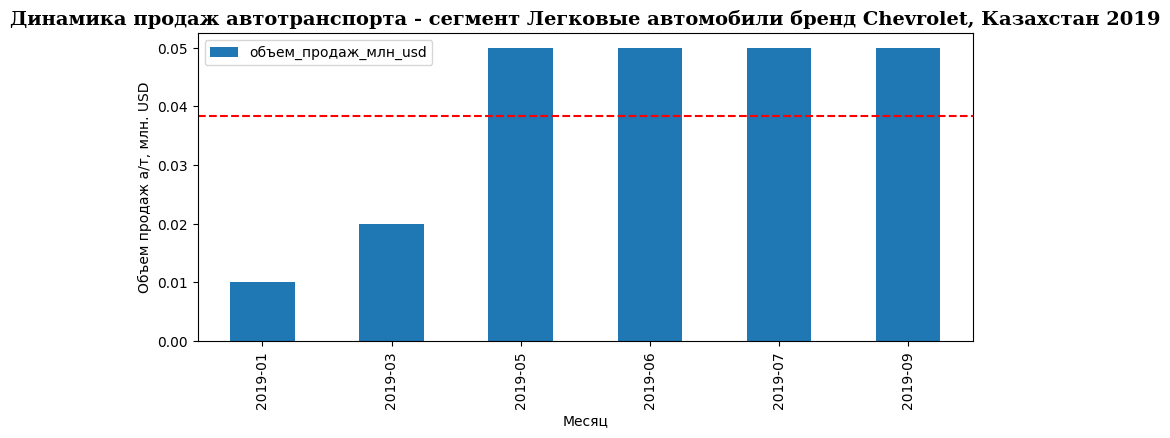


Hyundai



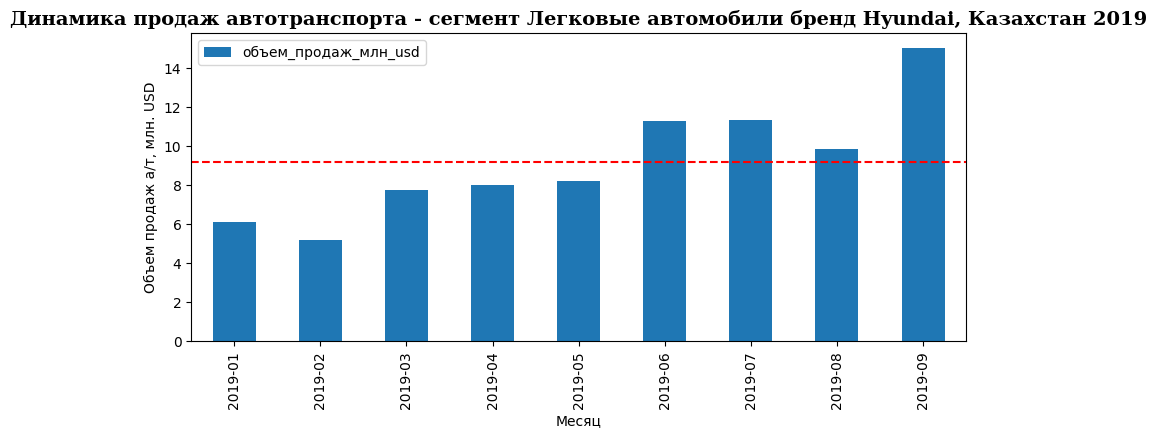


BMW



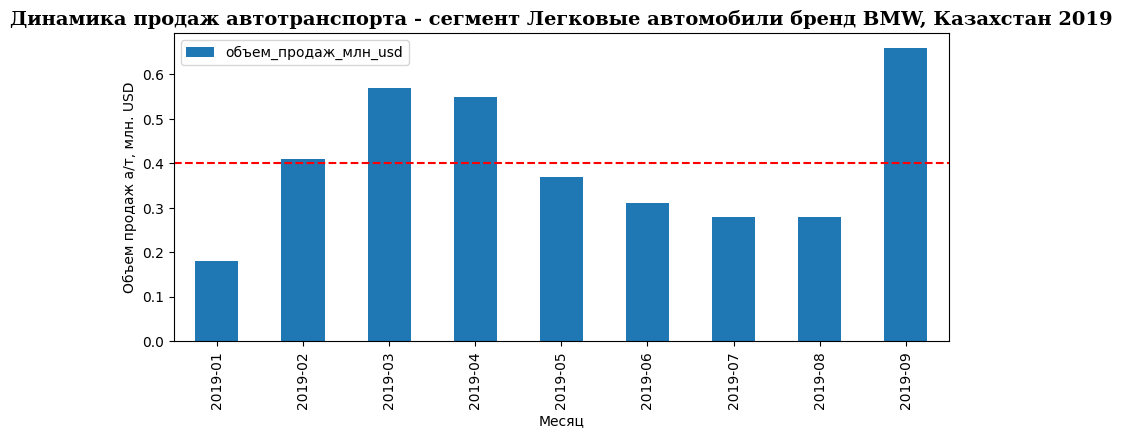


Jaguar



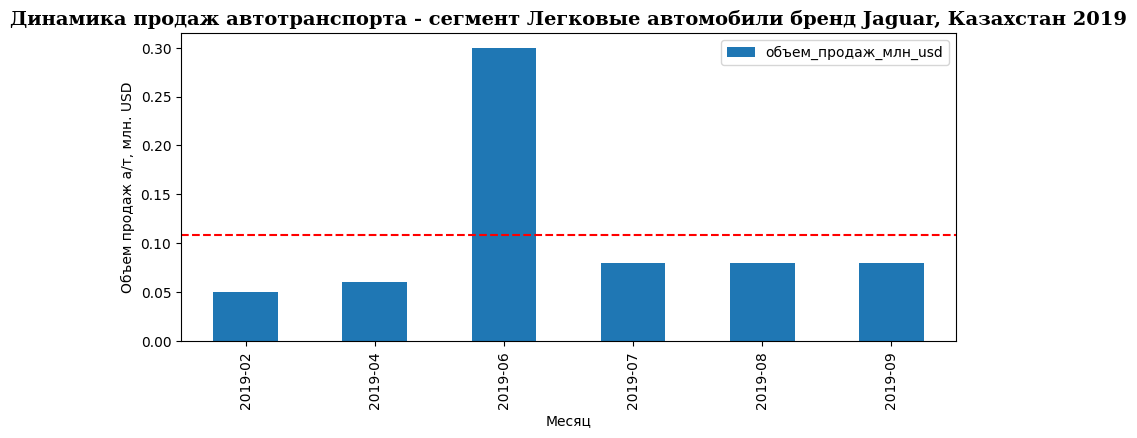


Porsche



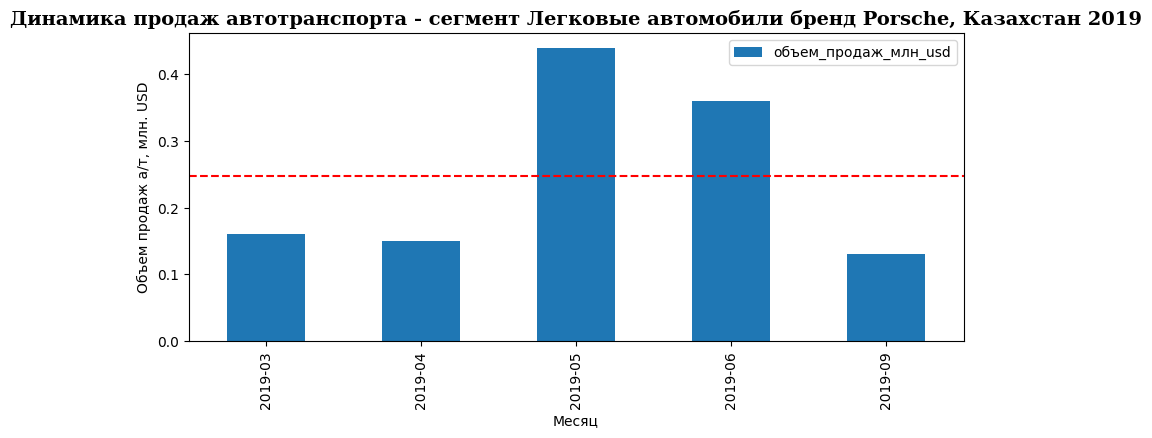


Mercedes-Benz



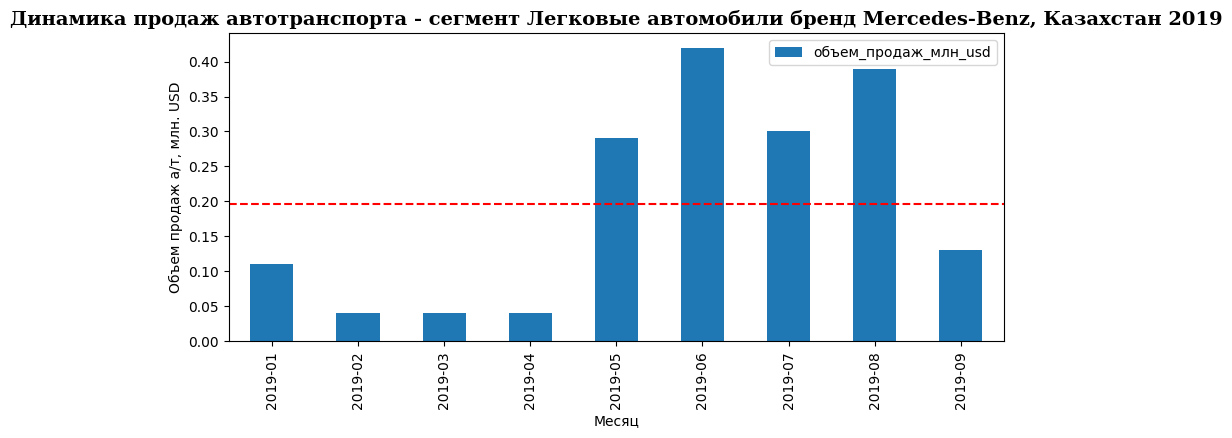


Skoda



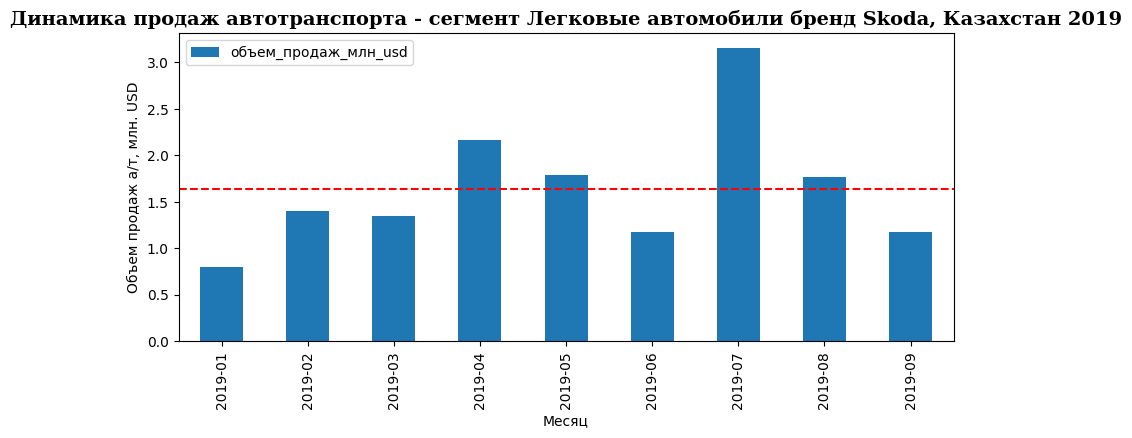


Infiniti



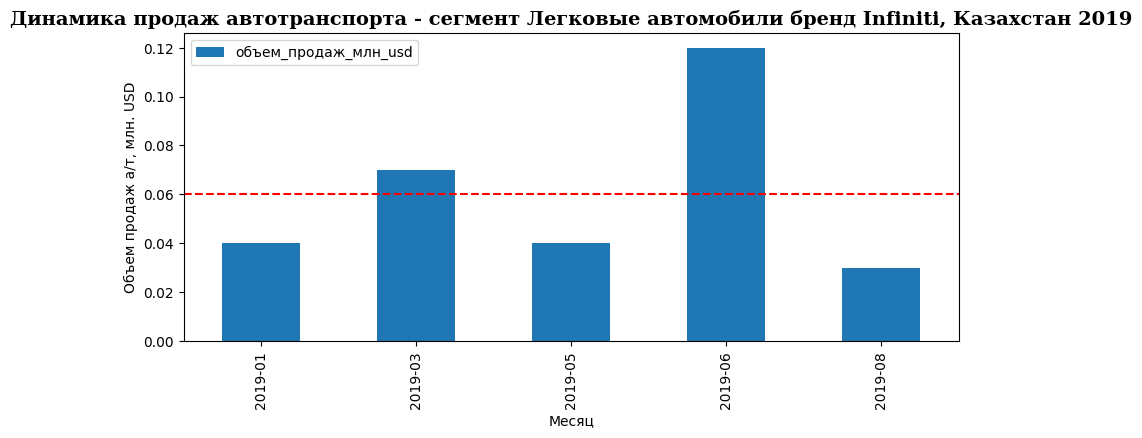


Volkswagen



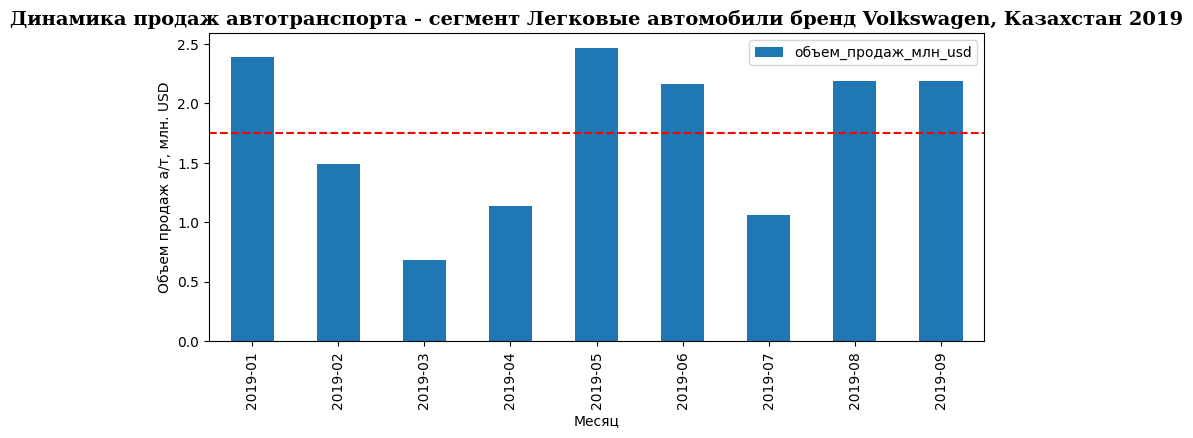


Audi



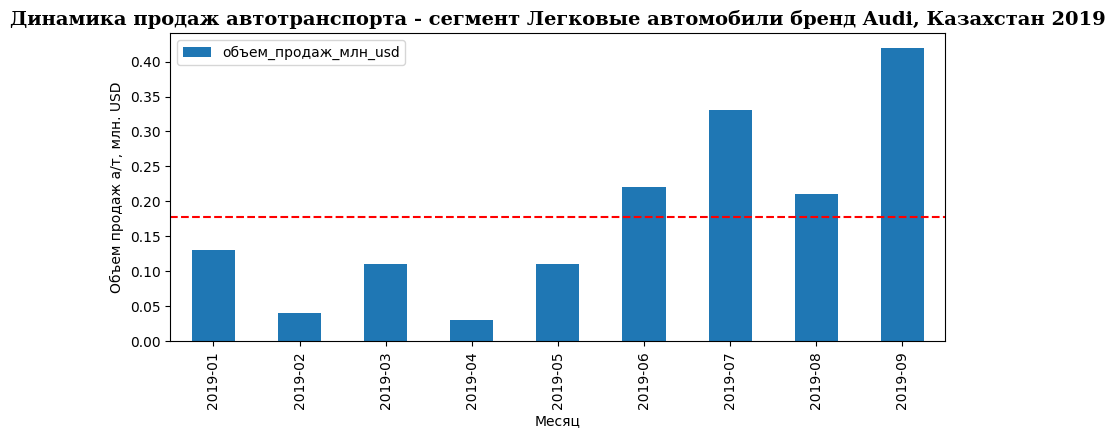


Ford



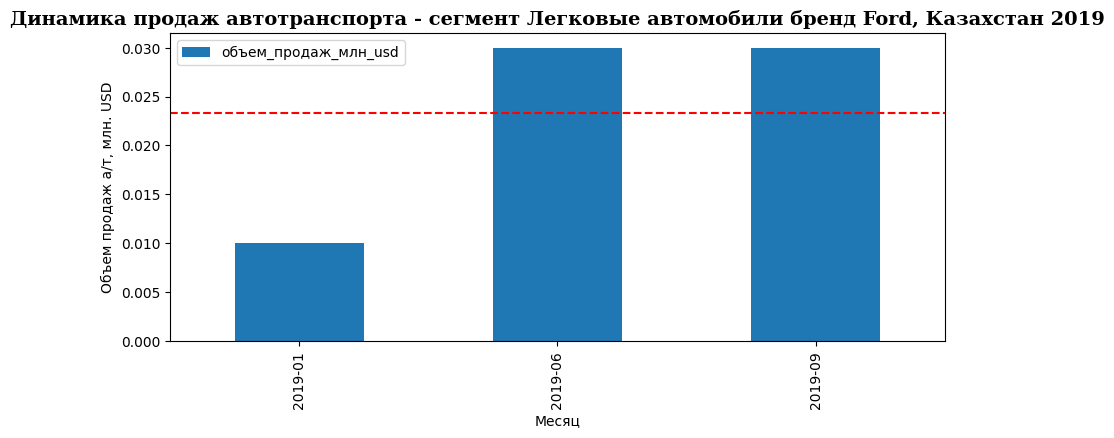


Peugeot



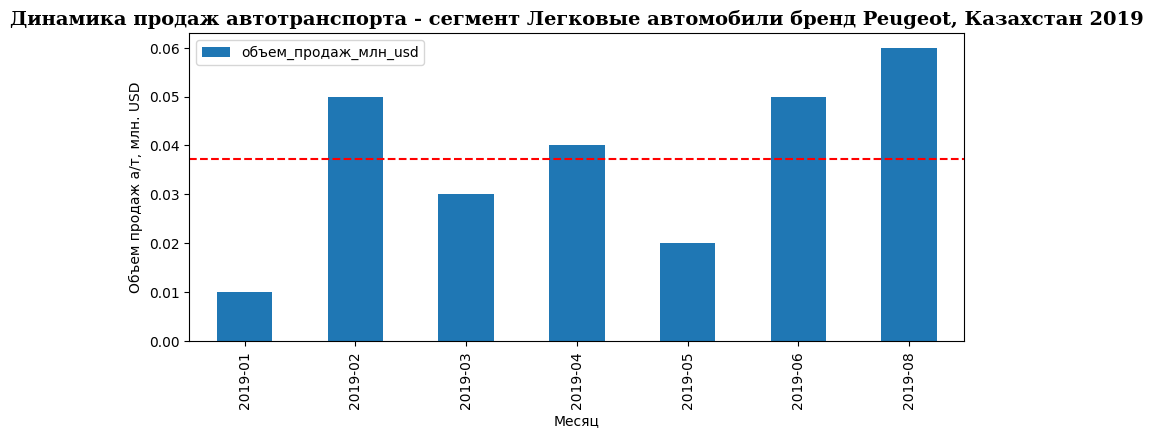


Volvo



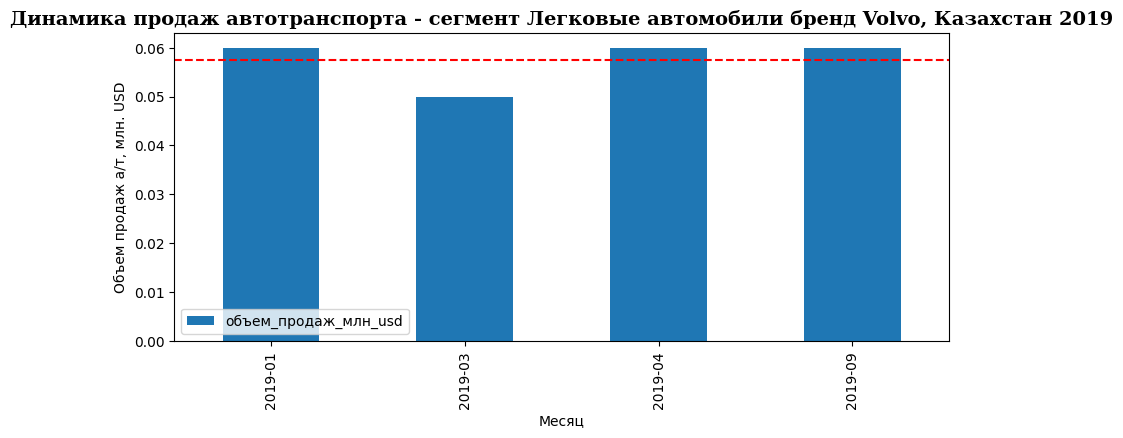


Subaru



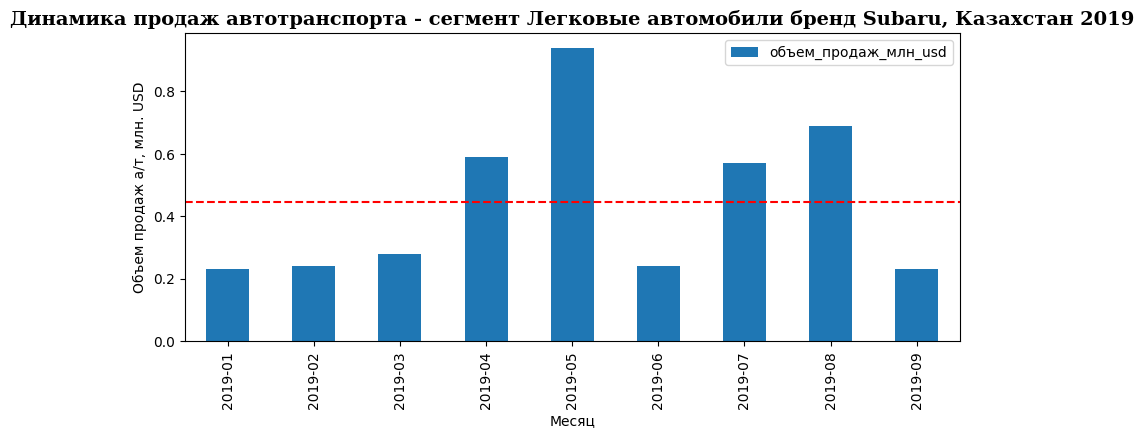


Toyota



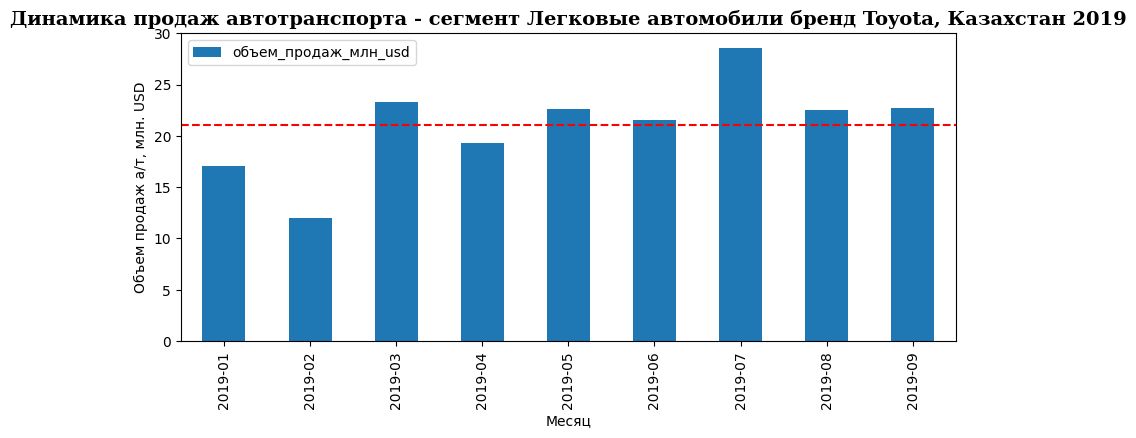


Ravon



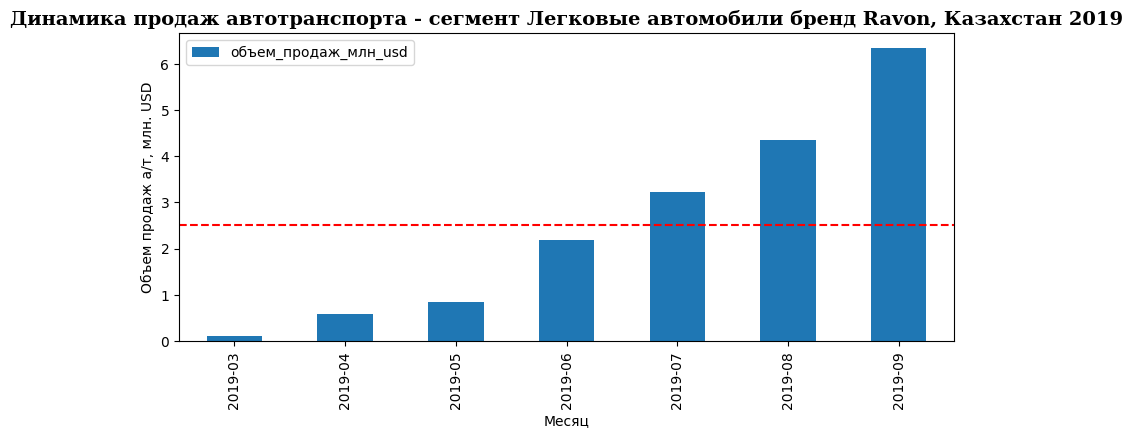


Mini



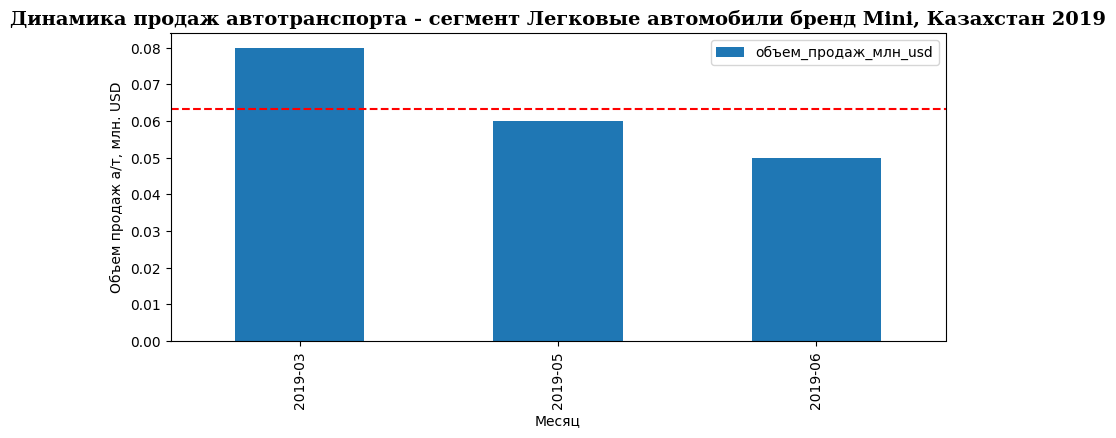

In [40]:
# Запустим функцию analysys для сегмента 'Легковые автомобили'
analysys('Легковые автомобили')

#### **4.6.2.  Анализ продаж в разрезе брендов - сегмент 'Внедорожники'**


Создадим таблицу объем продаж в разрезе брендов - сегиентВнедорожники



год_месяц      бренд  объем_продаж_млн_usd
0   2019-01       Audi                  0.05
1   2019-01        BMW                  1.90
2   2019-01   Cadillac                  0.64
3   2019-01  Chevrolet                  0.99
4   2019-01    Hyundai                 11.19


Узнаем топ-5 брендов по количеству проданных а/м - сегмент Внедорожники


Построим график динамики продаж в разрезе брендов - сегмент Внедорожники


Mitsubishi



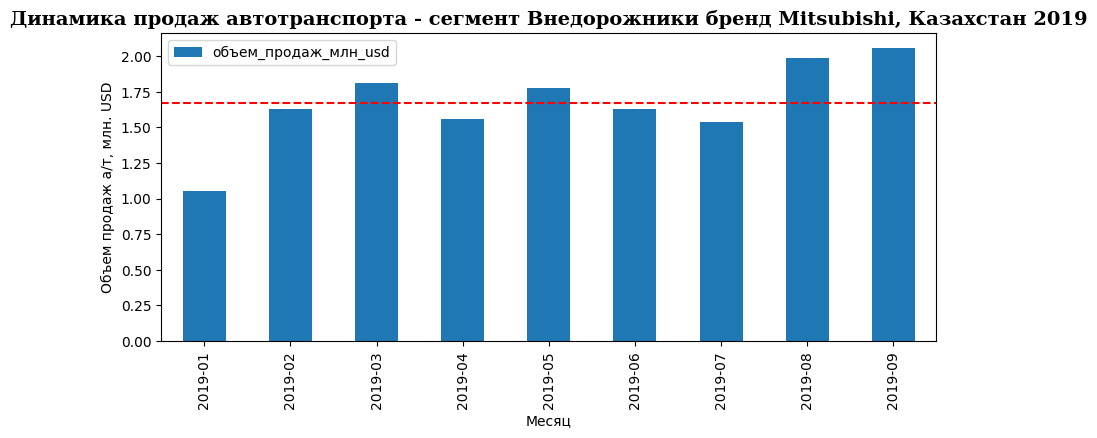


Jac



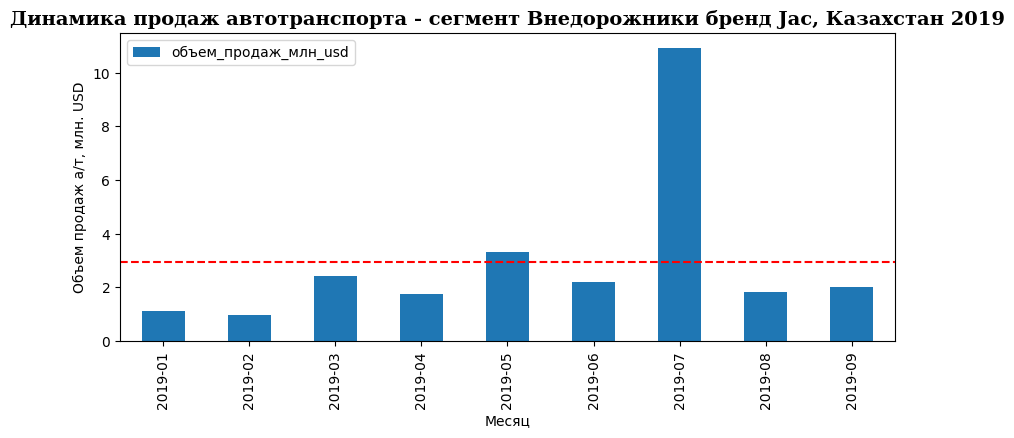


Mazda



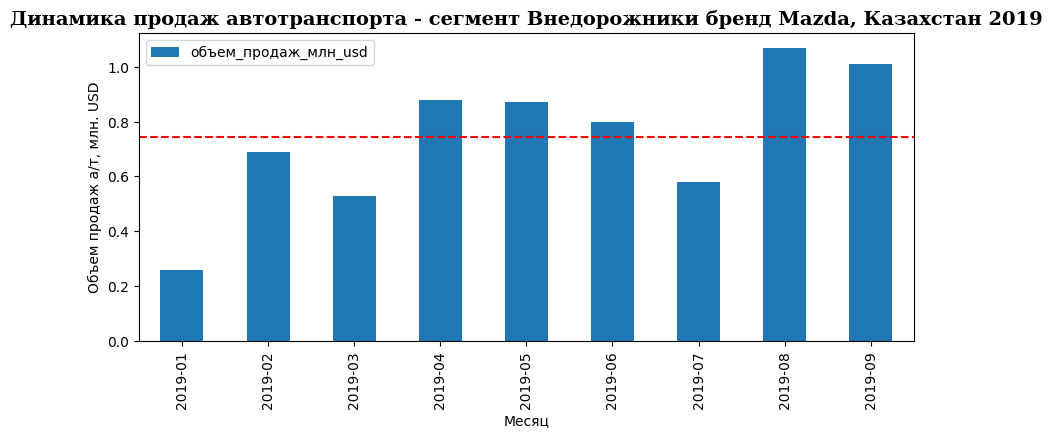


Kia



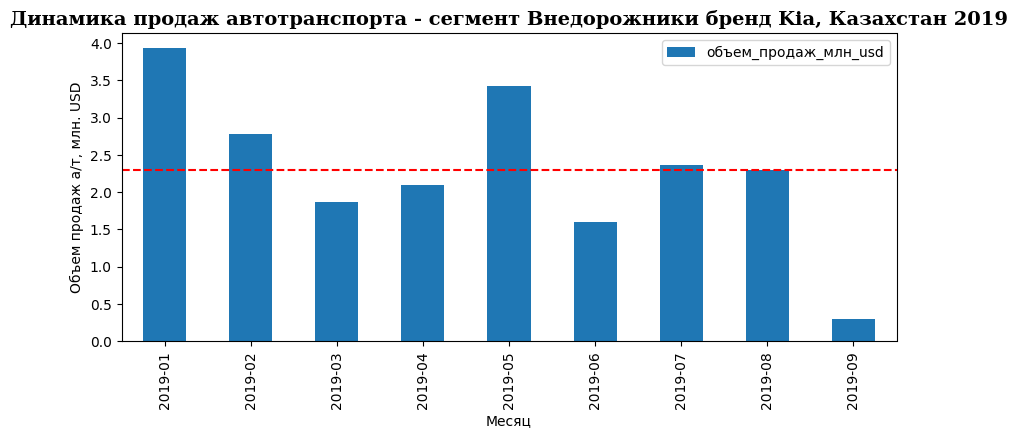


Nissan



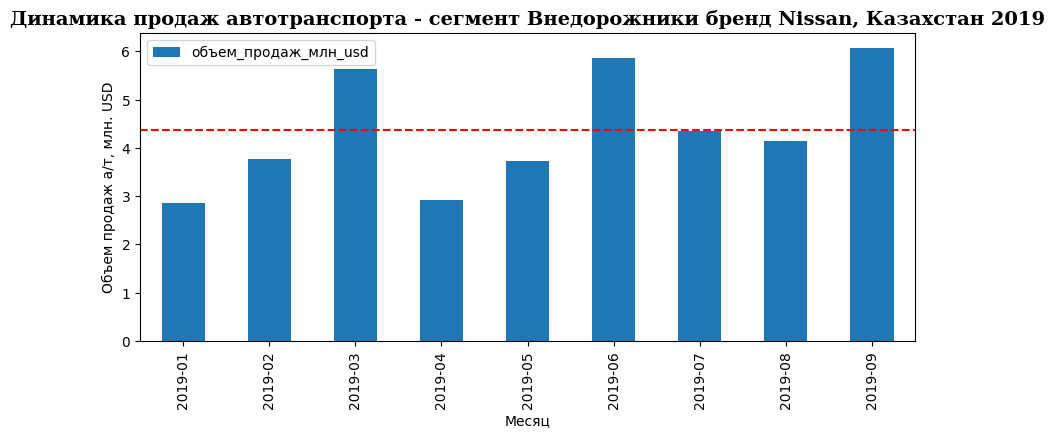


UAZ



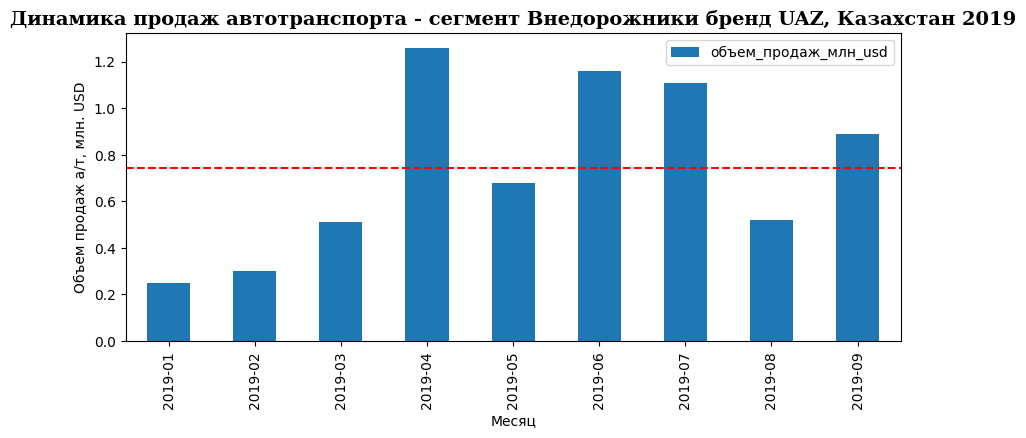


Renault



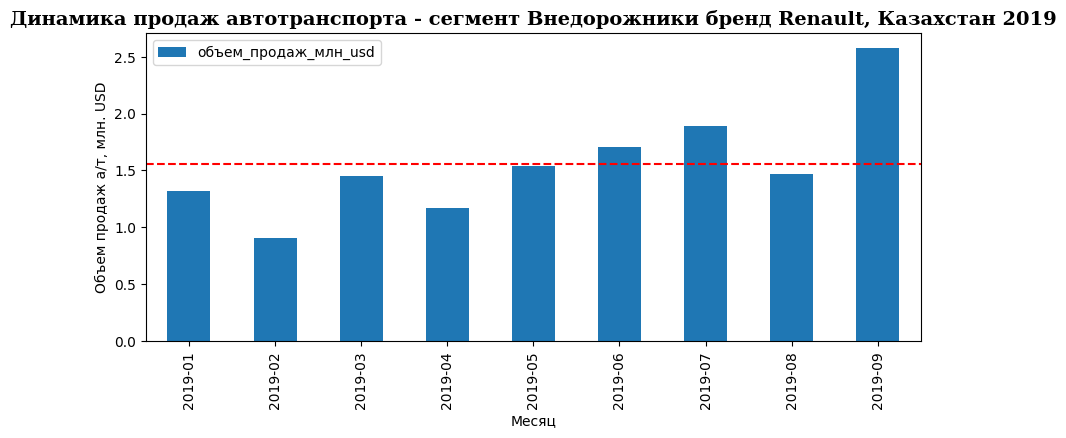


Lada



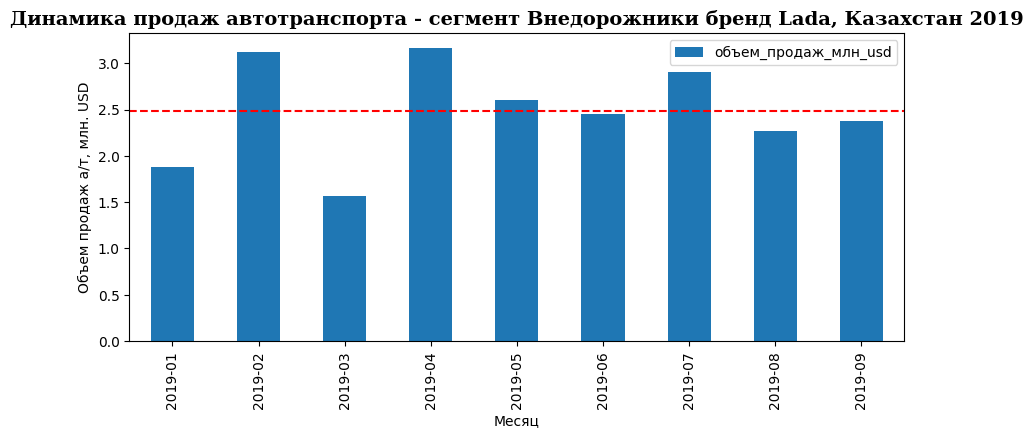


Lexus



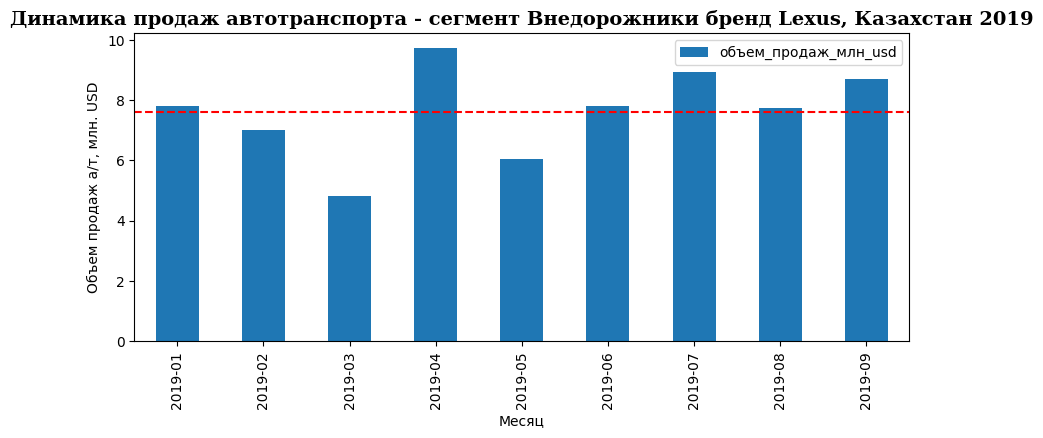


Lifan



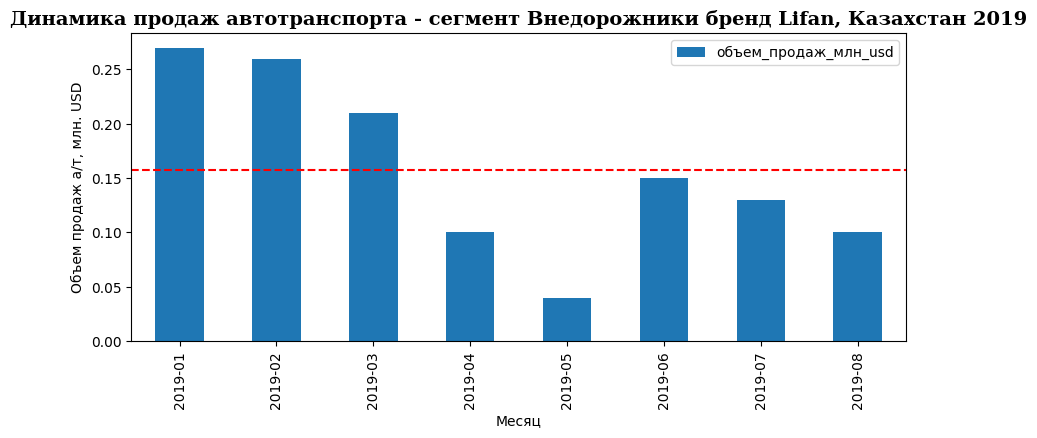


Cadillac



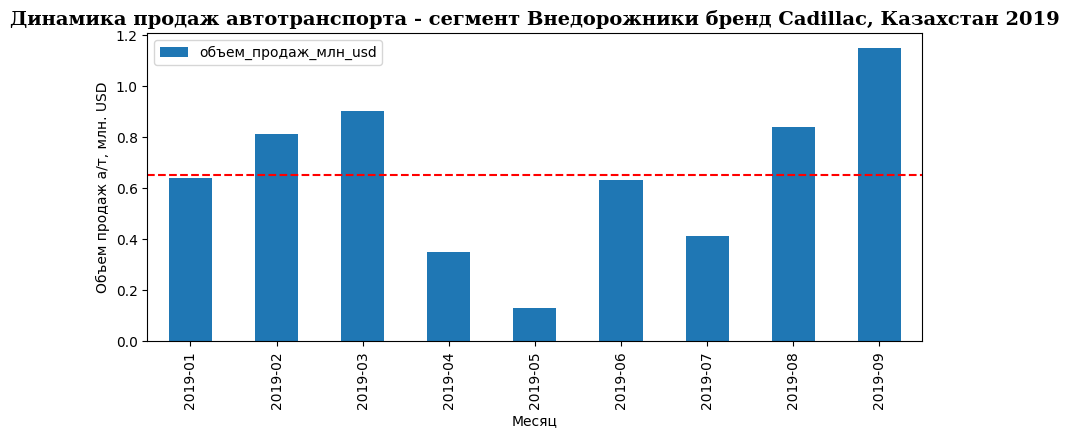


Chevrolet



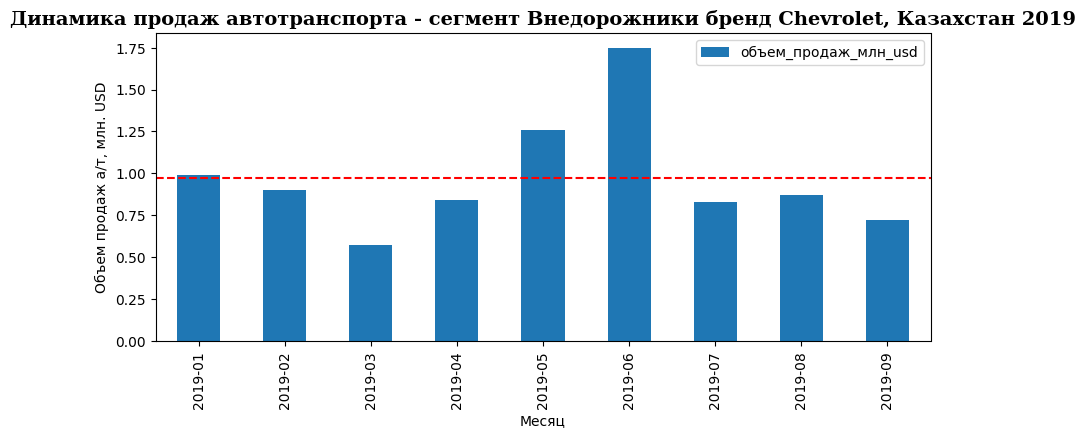


Hyundai



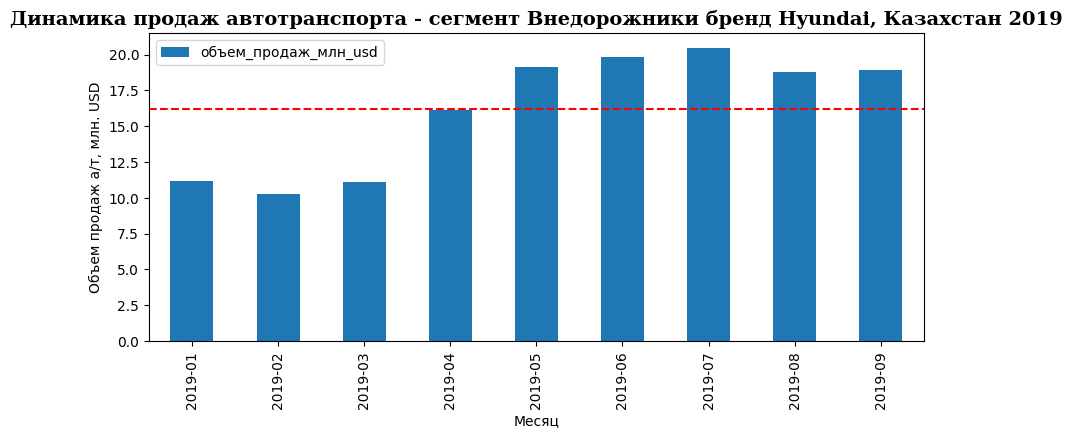


BMW



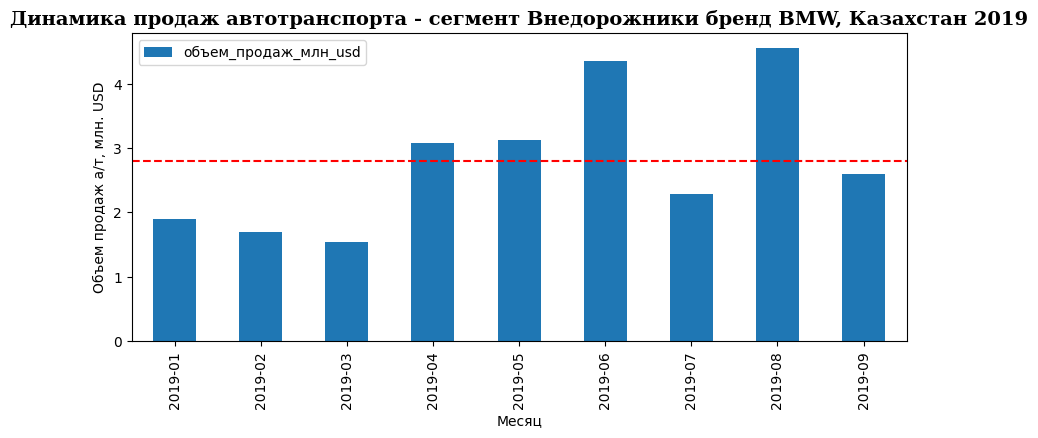


Jaguar



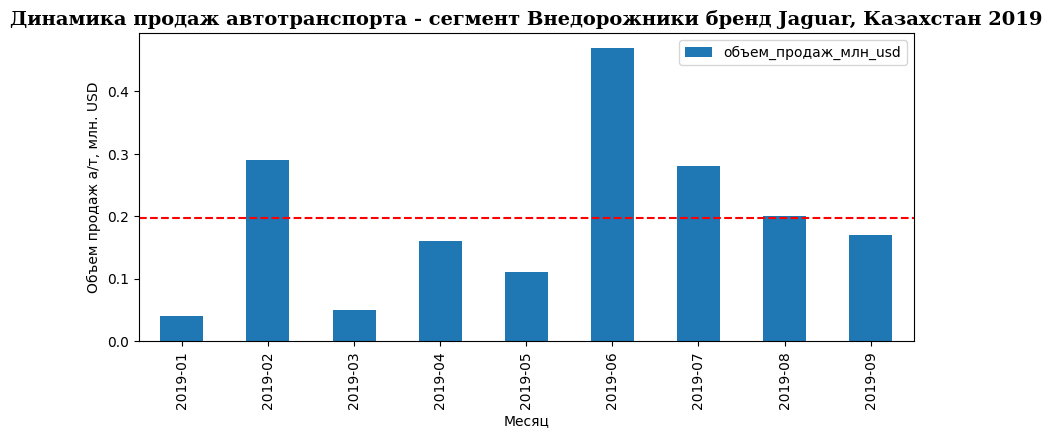


Porsche



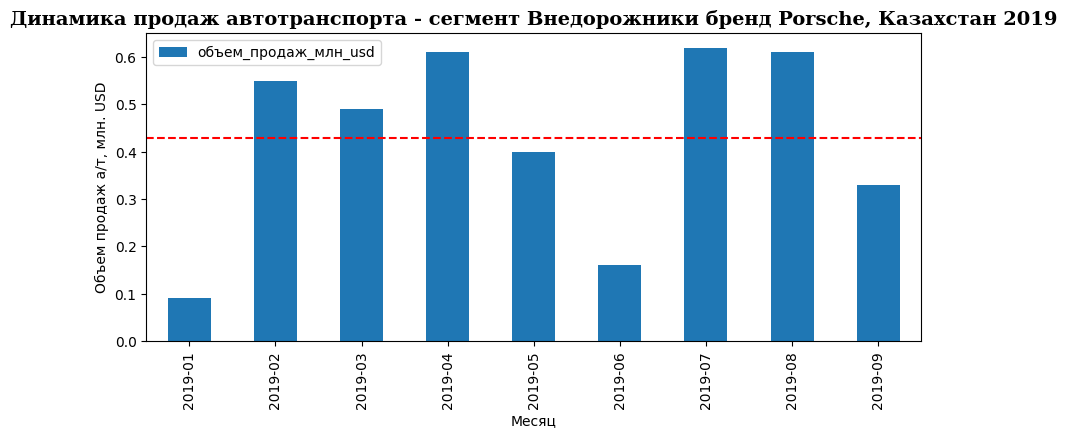


Mercedes-Benz



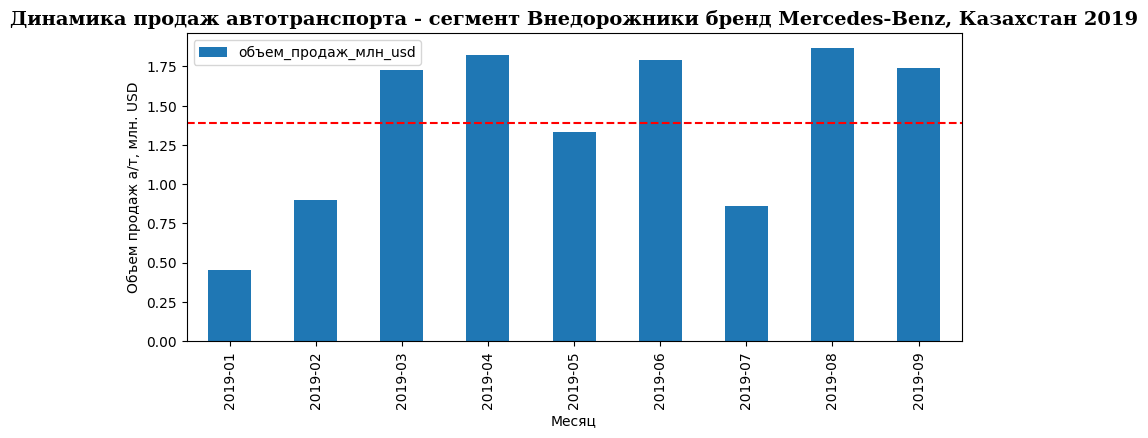


Skoda



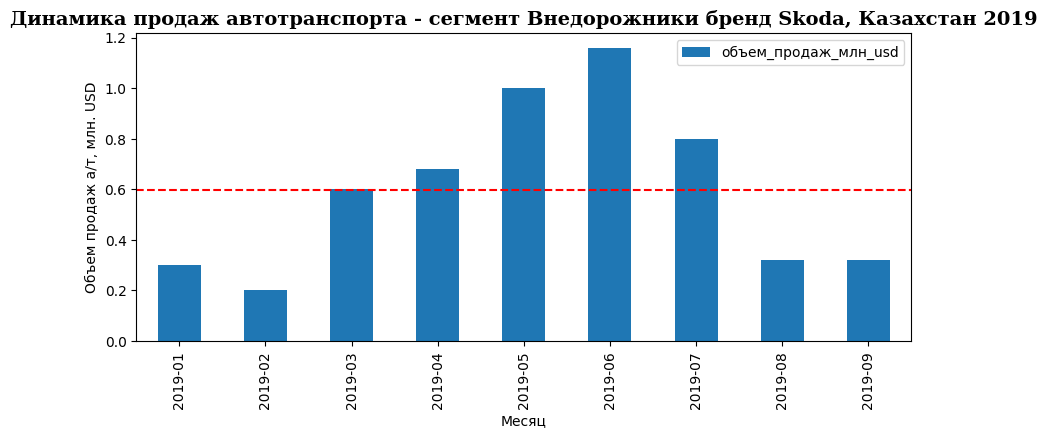


Infiniti



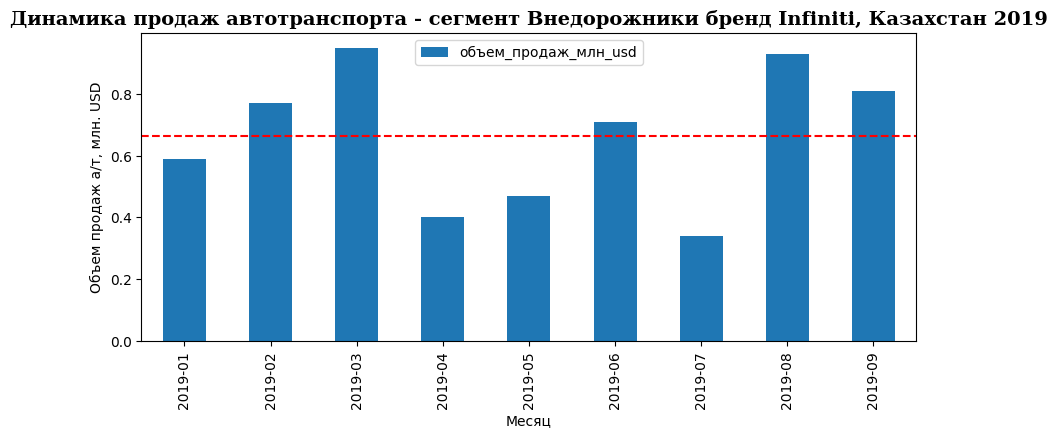


Audi



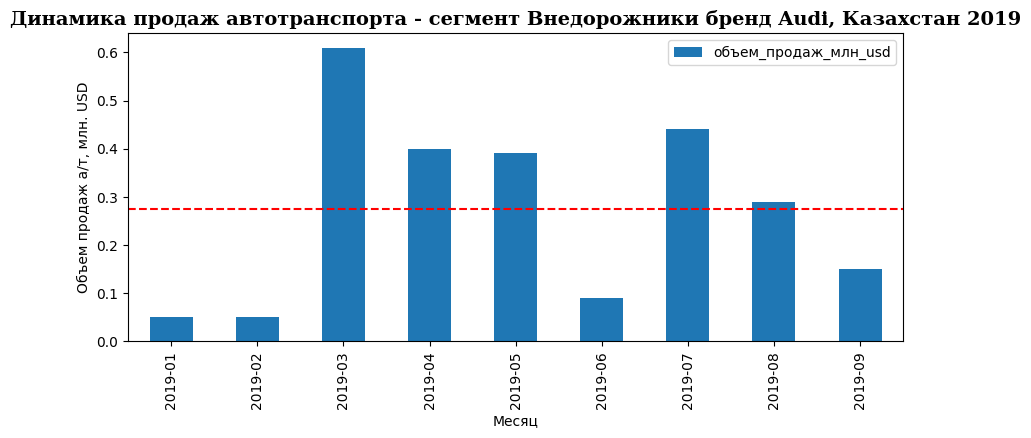


Volkswagen



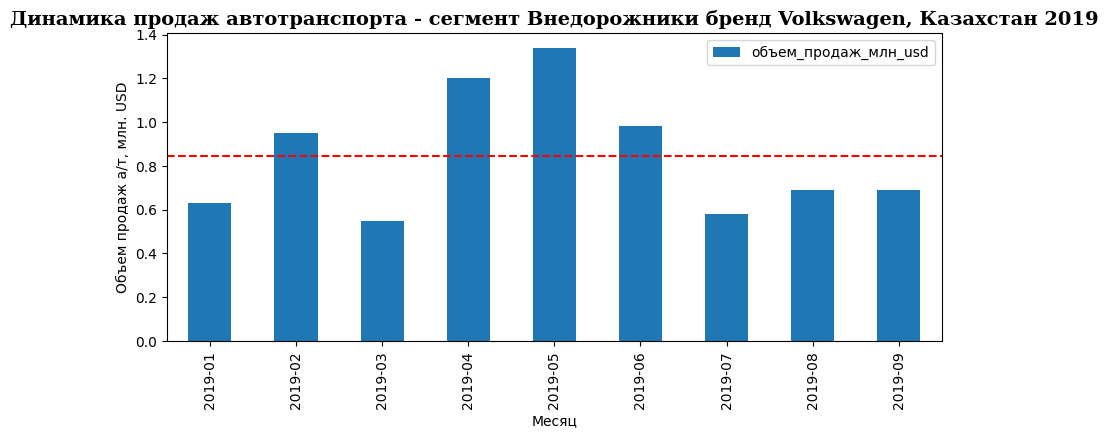


Volvo



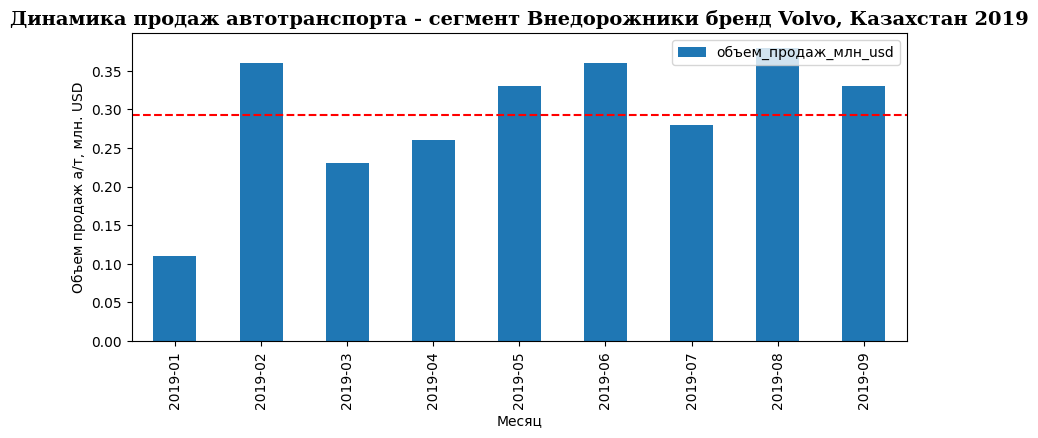


Land Rover



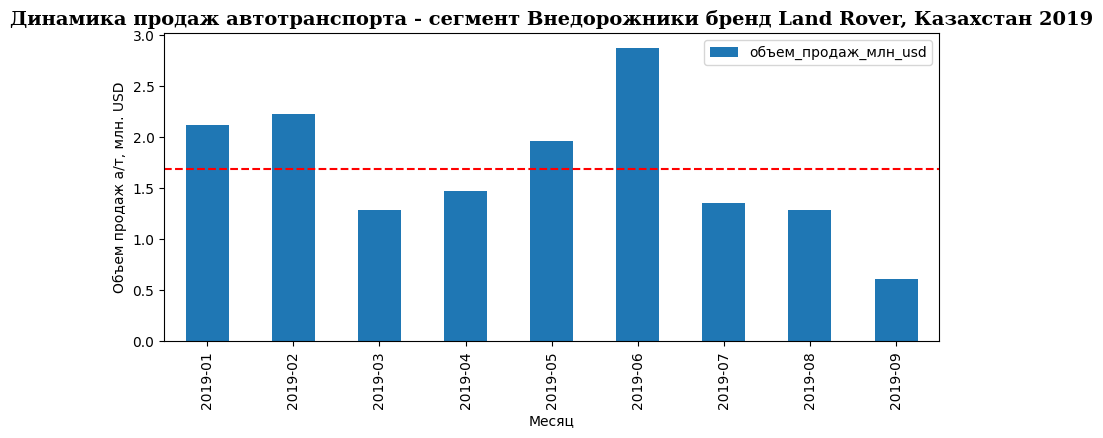


Subaru



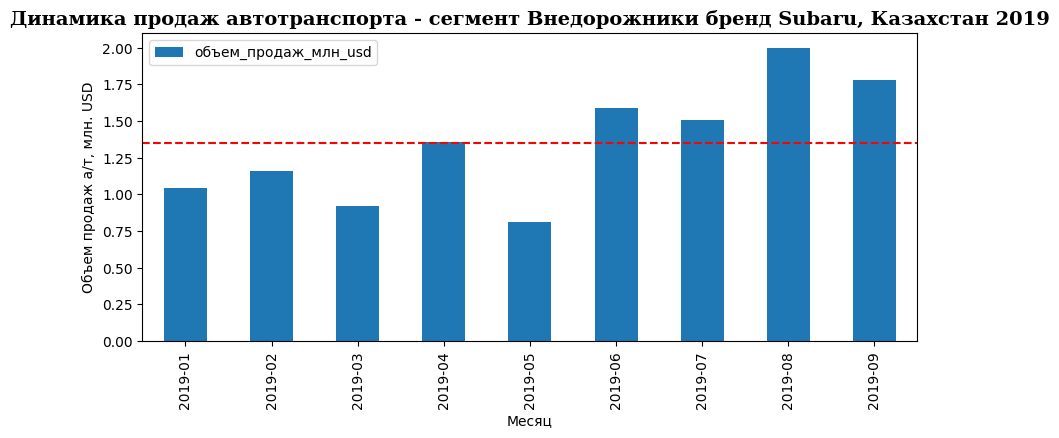


Toyota



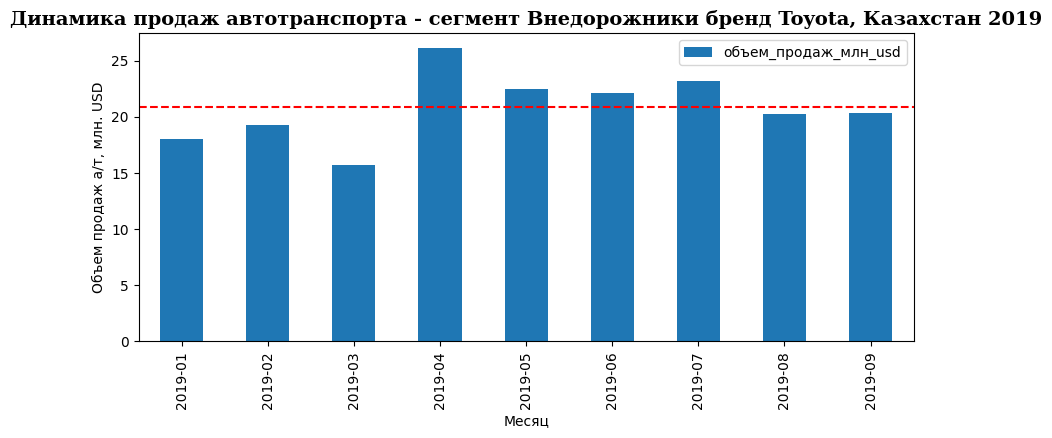


Mini



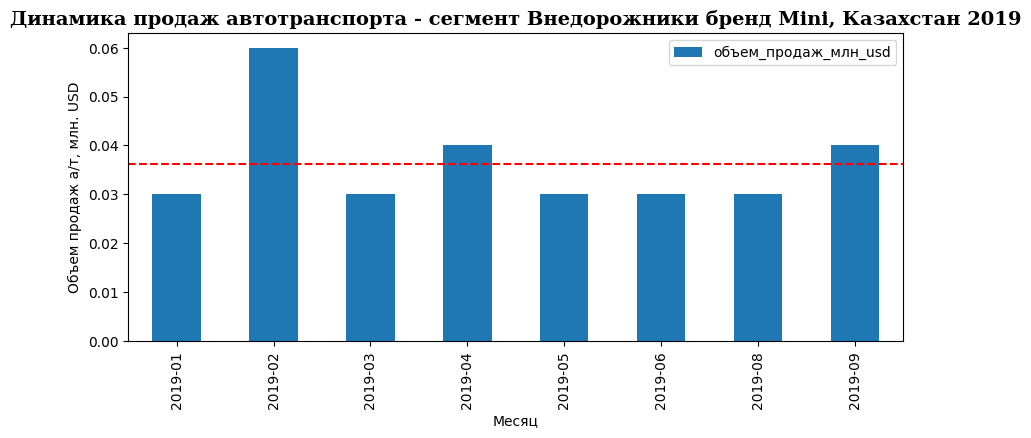

In [41]:
# Запустим функцию analysys для сегмента 'Внедорожники'
analysys('Внедорожники')

#### **4.6.3.  Анализ продаж в разрезе брендов - сегмент 'Коммерческие автомобили'**


Создадим таблицу объем продаж в разрезе брендов - сегиентКоммерческие автомобили



год_месяц      бренд  объем_продаж_млн_usd
0   2019-01     Daewoo                  0.94
1   2019-01  Dong Feng                  0.77
2   2019-01      Foton                  0.04
3   2019-01        GAZ                  2.52
4   2019-01       Hino                  0.36


Узнаем топ-5 брендов по количеству проданных а/м - сегмент Коммерческие автомобили


Построим график динамики продаж в разрезе брендов - сегмент Коммерческие автомобили


Jac



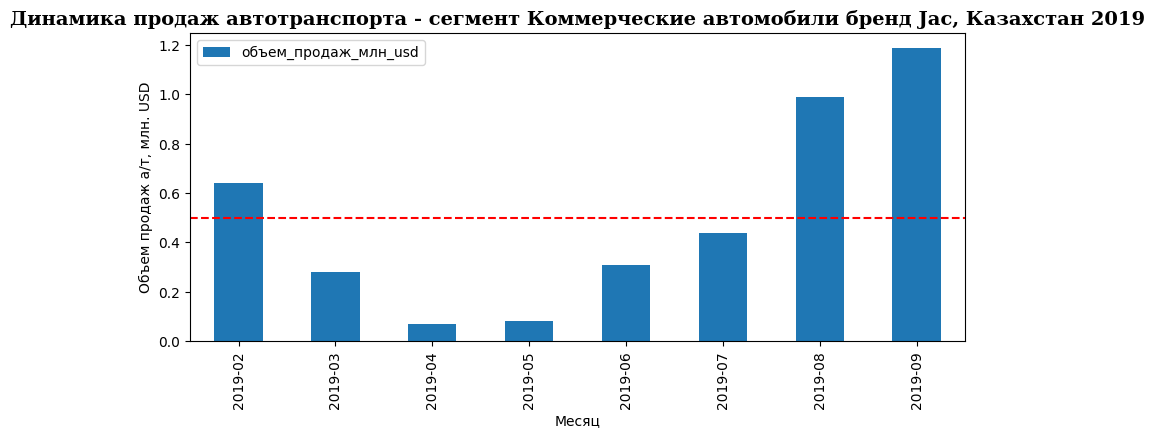


ANKAI



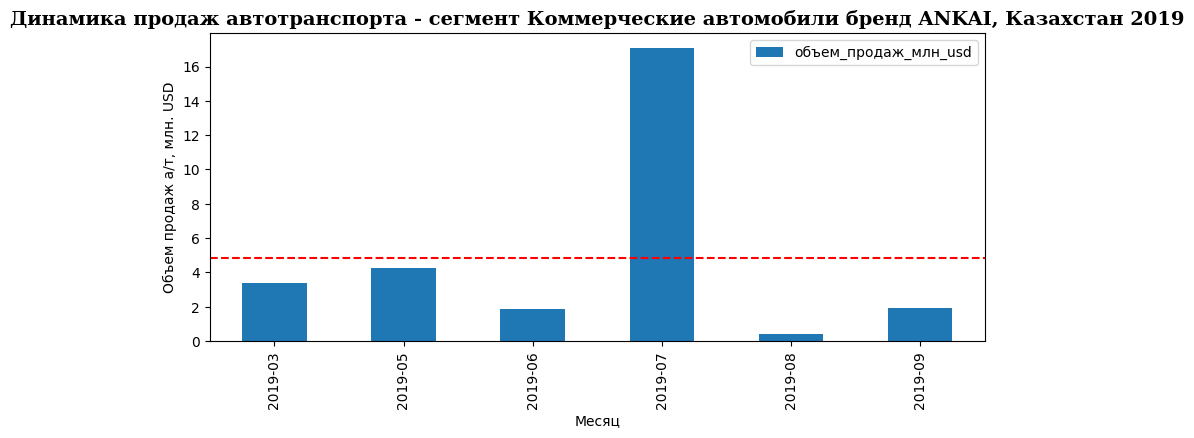


MAN



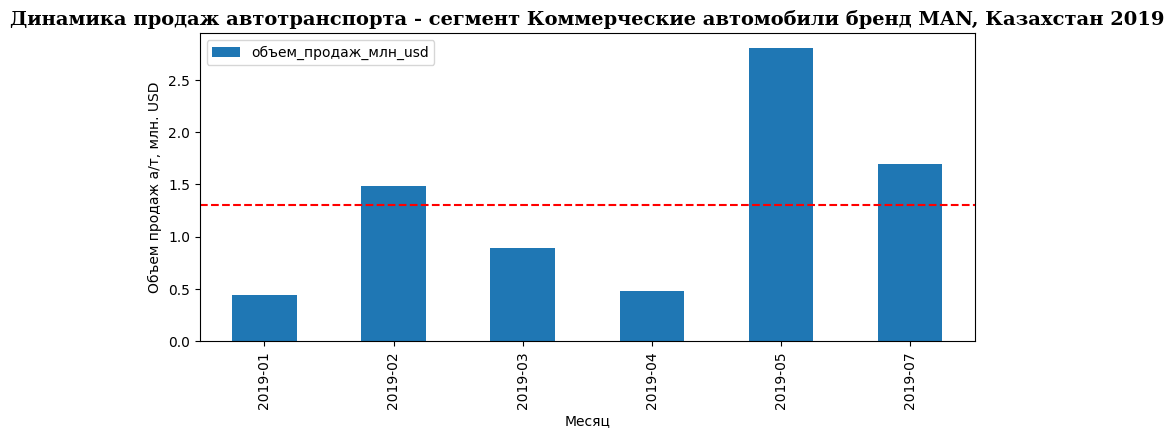


UAZ



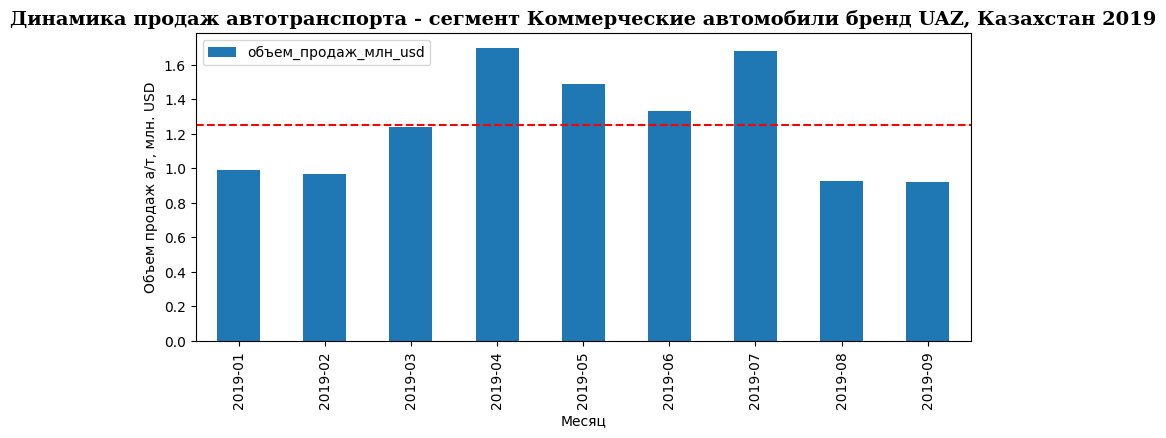


Dong Feng



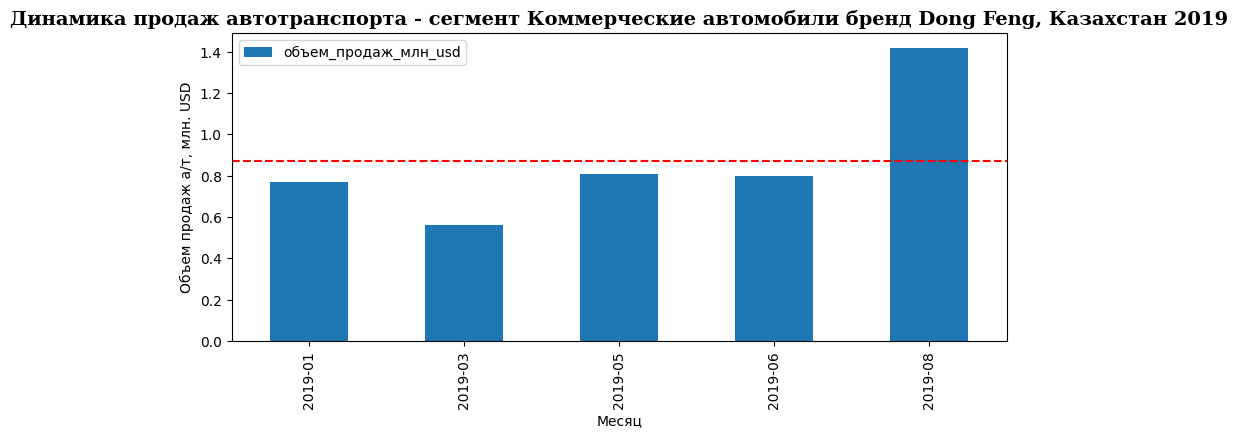


Scania



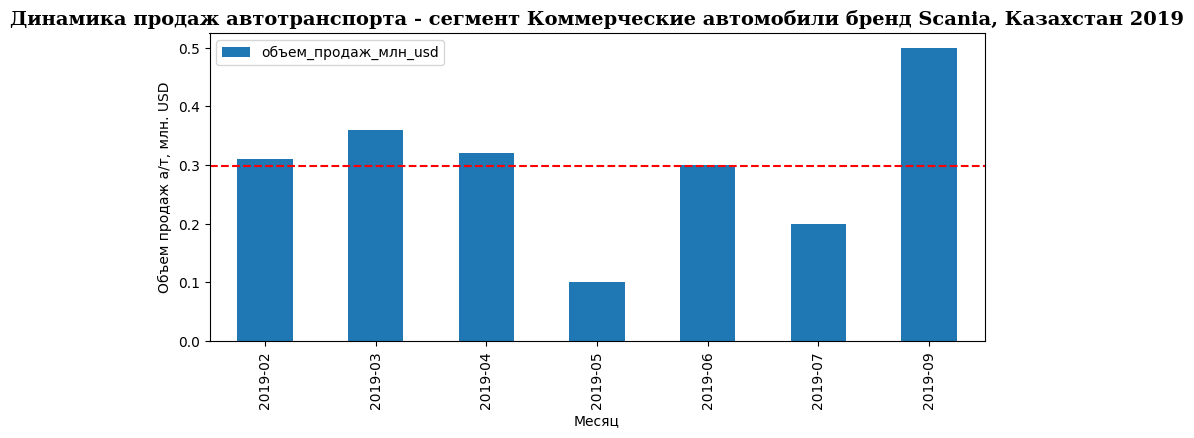


Урал



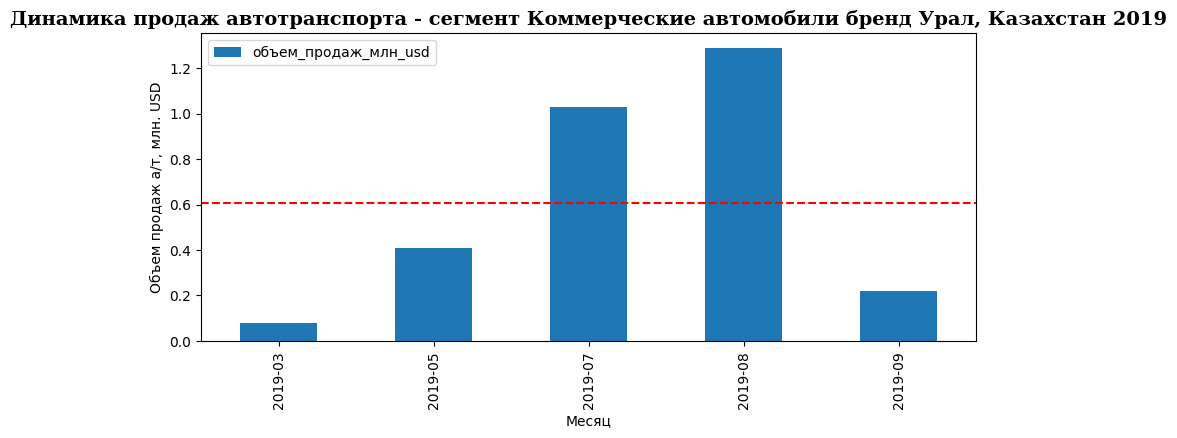


GAZ



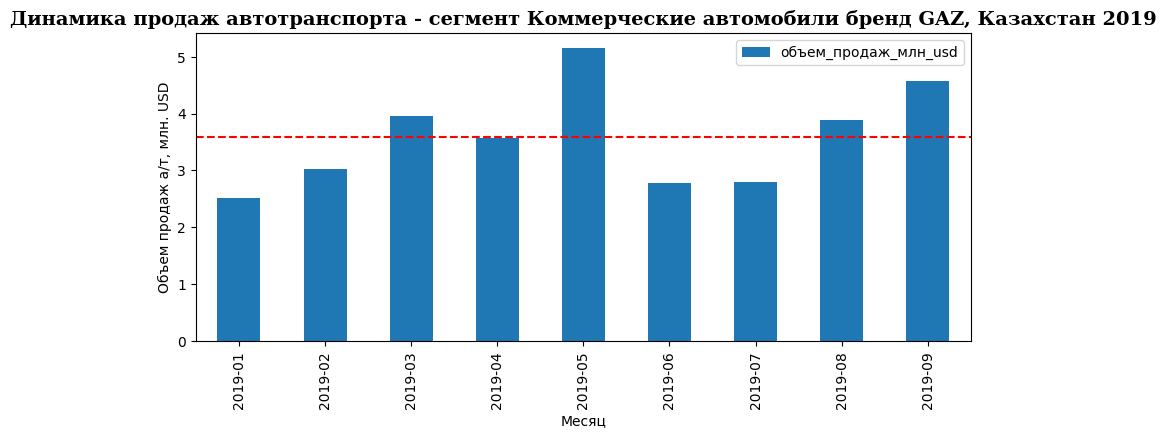


Foton



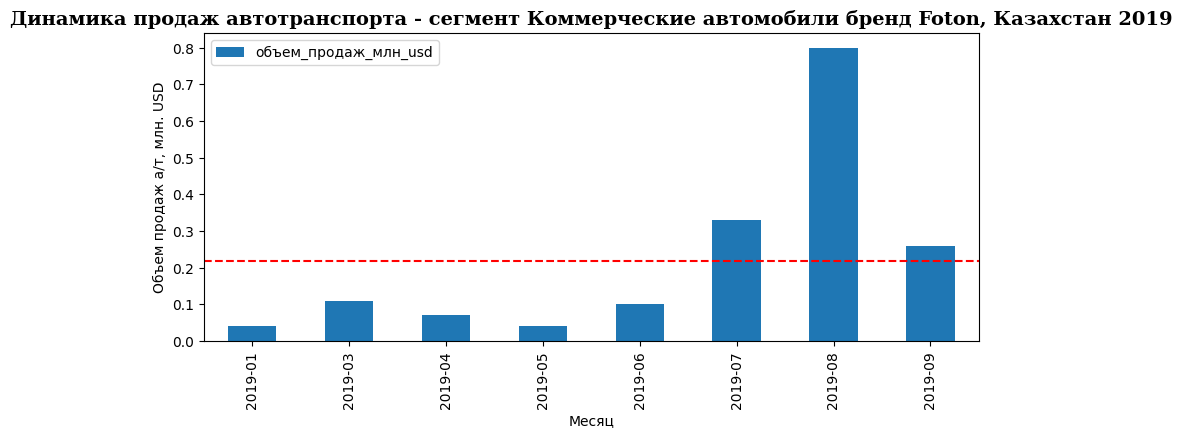


Hyundai



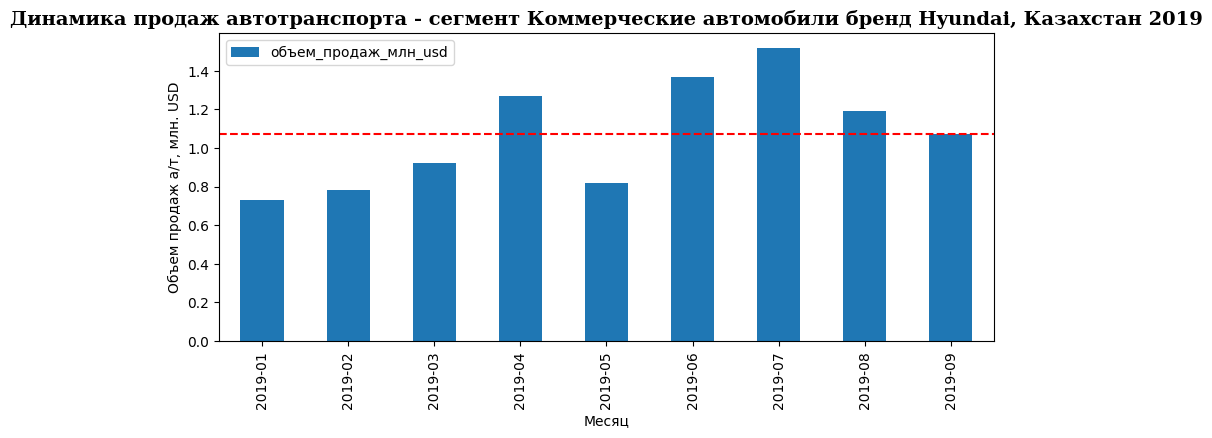


Mercedes-Benz



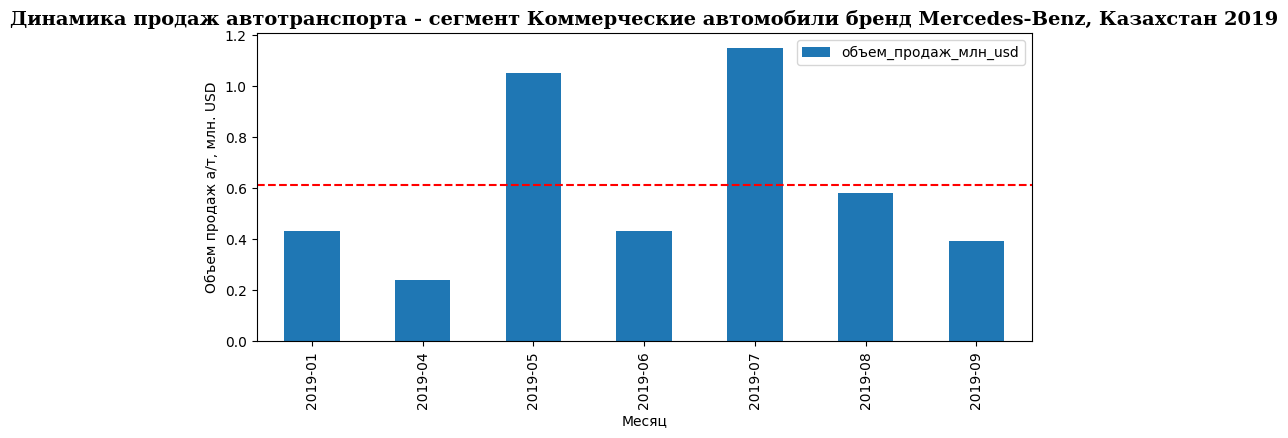


Isuzu



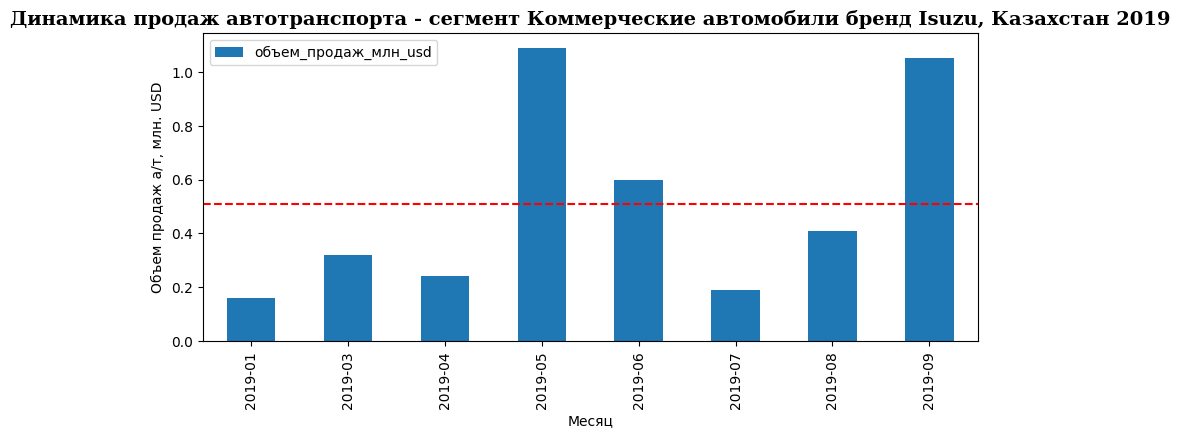


KAMAZ



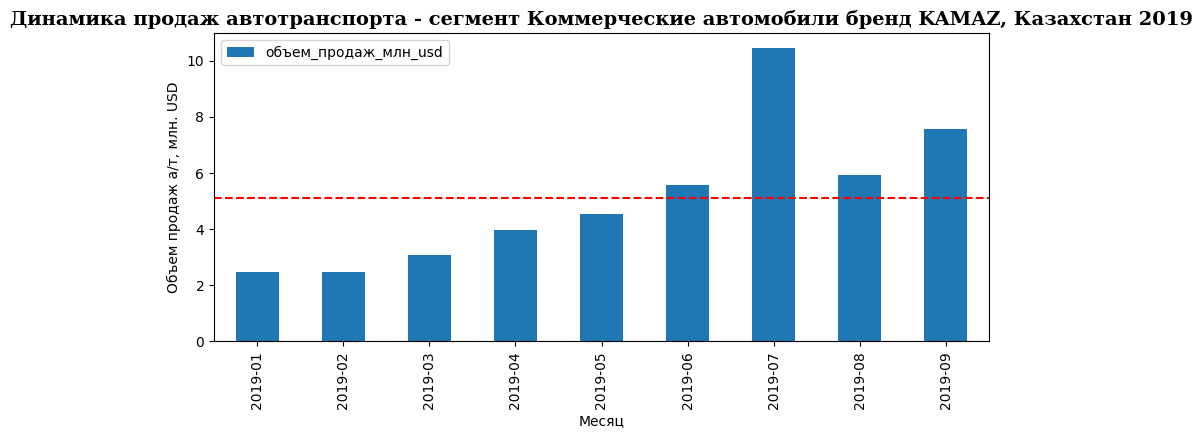


Shacman



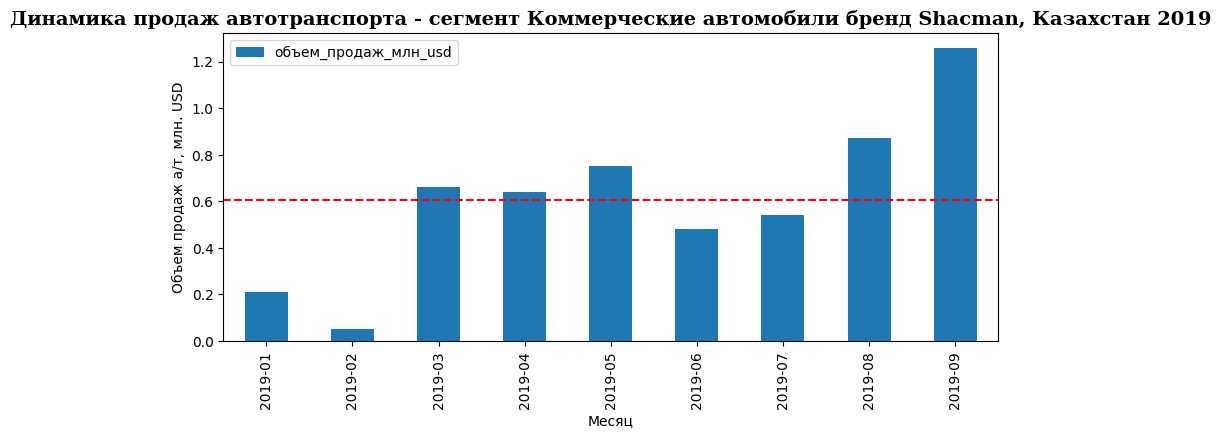


Iveco



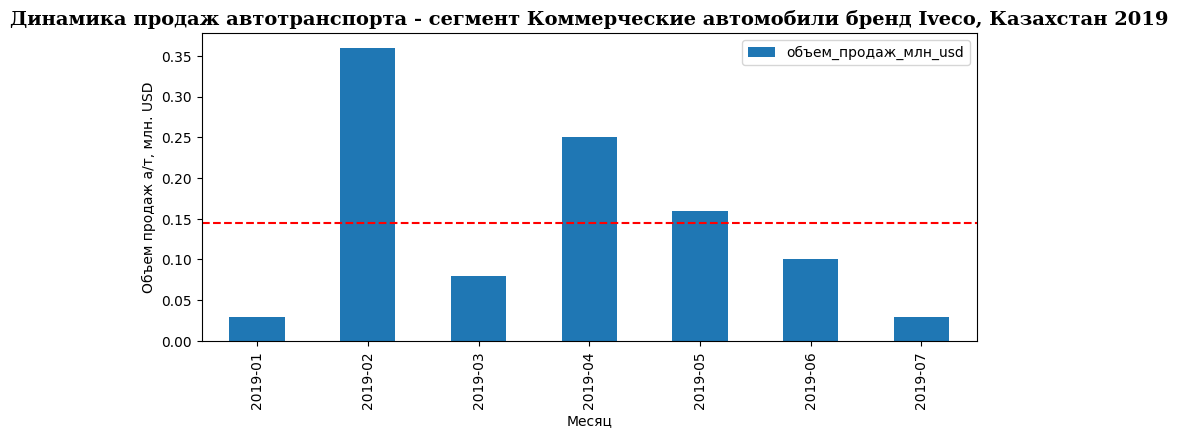


Volkswagen



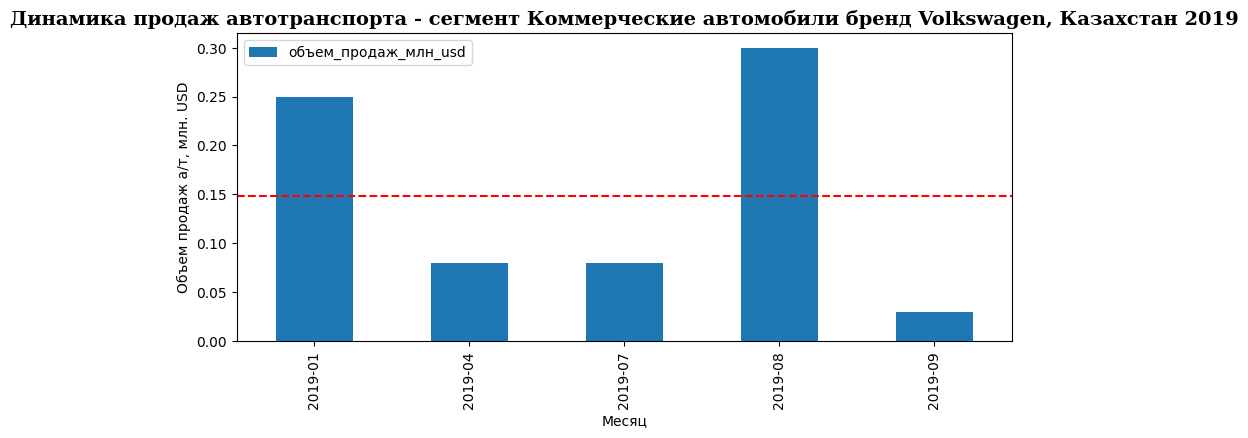


Hino



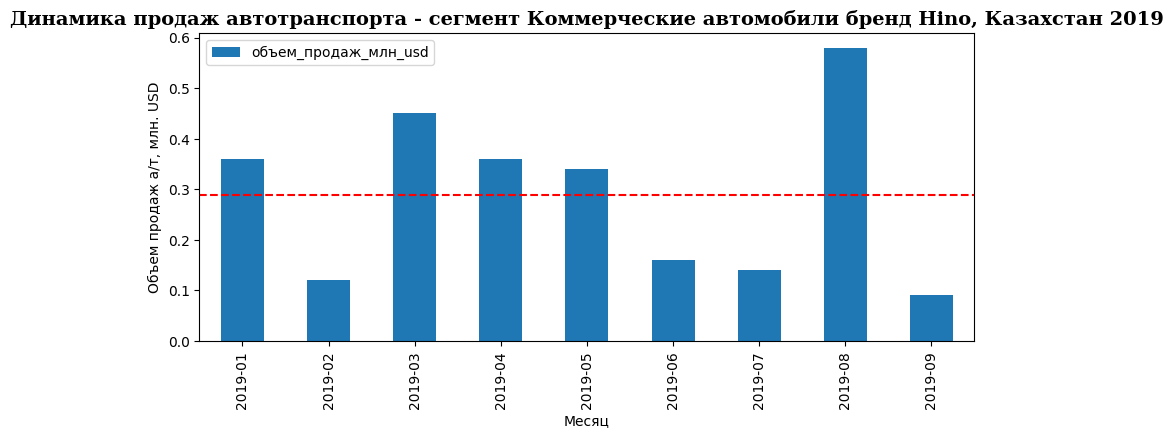


Yutong



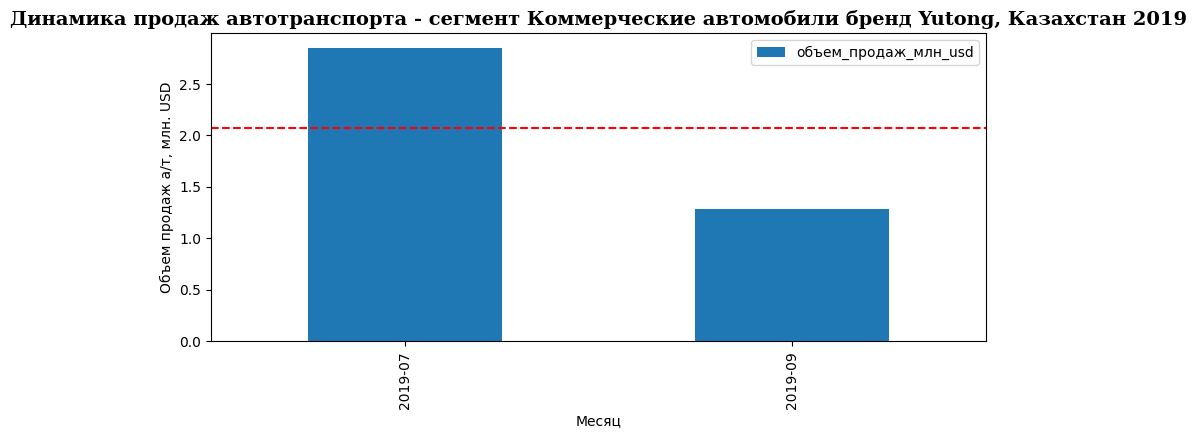


Daewoo



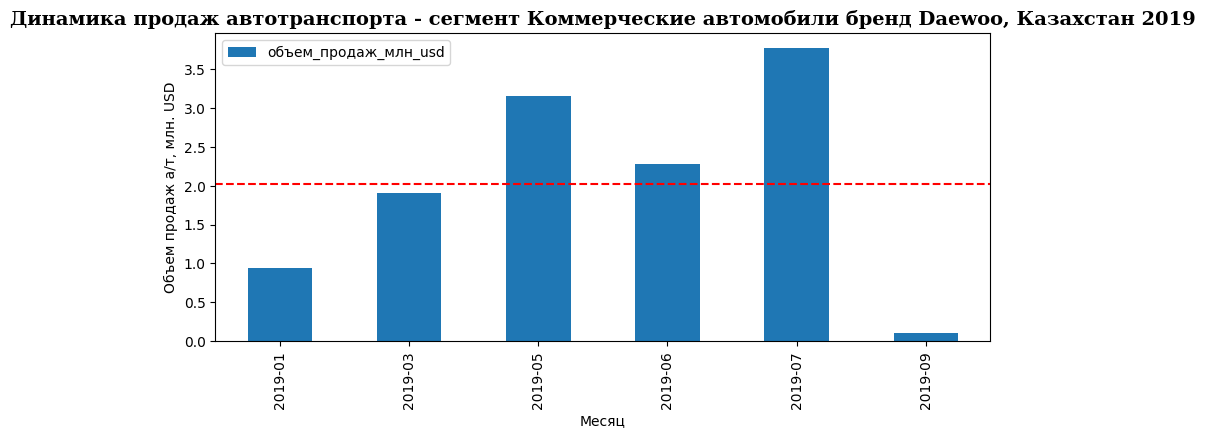


Nefaz



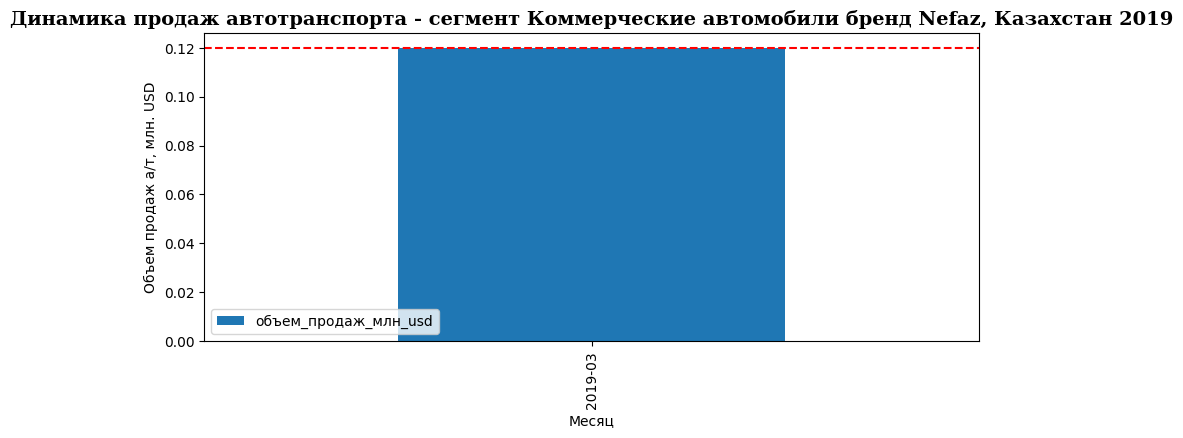

In [42]:
# Запустим функцию analysys для сегмента  'Коммерческие автомобили'
analysys( 'Коммерческие автомобили')

#### **4.6.4.  Анализ продаж в разрезе брендов - сегмент 'Минивэны'**


Создадим таблицу объем продаж в разрезе брендов - сегиентМинивэны



год_месяц       бренд  объем_продаж_млн_usd
0   2019-01     Hyundai                  0.05
1   2019-01        Lada                  1.48
2   2019-01       Lifan                  0.16
3   2019-01     Peugeot                  0.02
4   2019-01  Volkswagen                  0.07


Узнаем топ-5 брендов по количеству проданных а/м - сегмент Минивэны


Построим график динамики продаж в разрезе брендов - сегмент Минивэны


Lifan



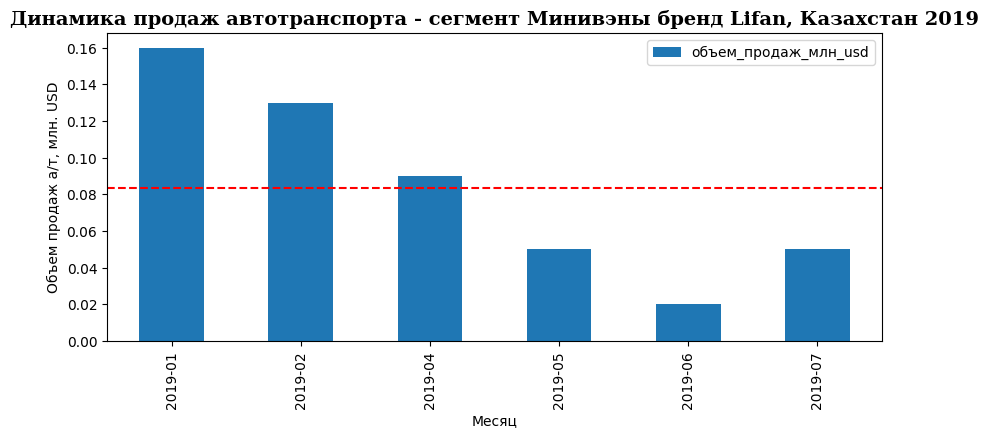


Peugeot



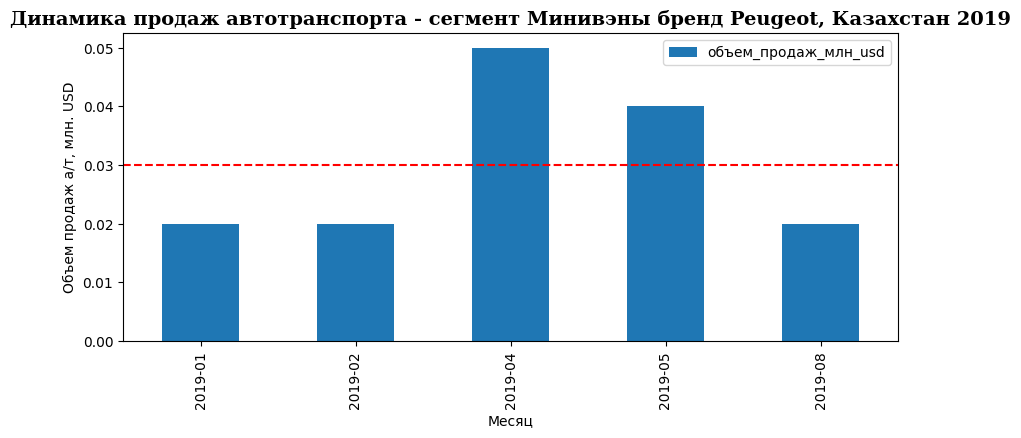


Hyundai



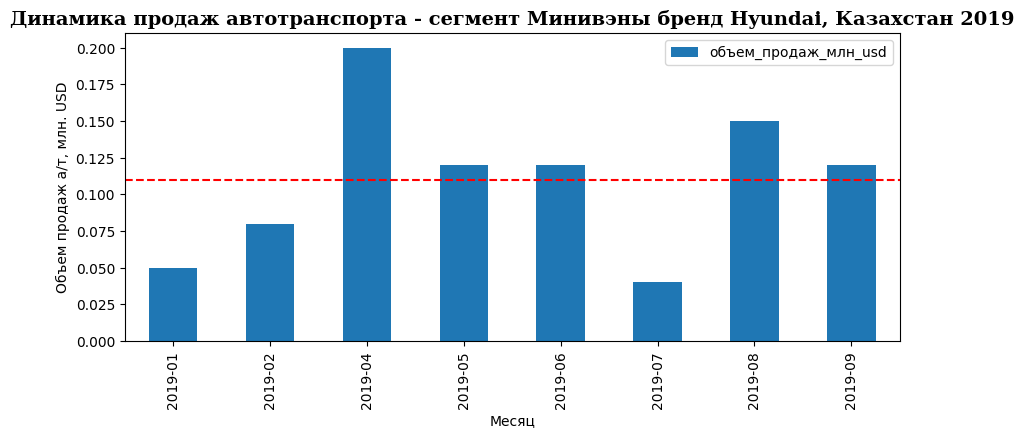


Renault



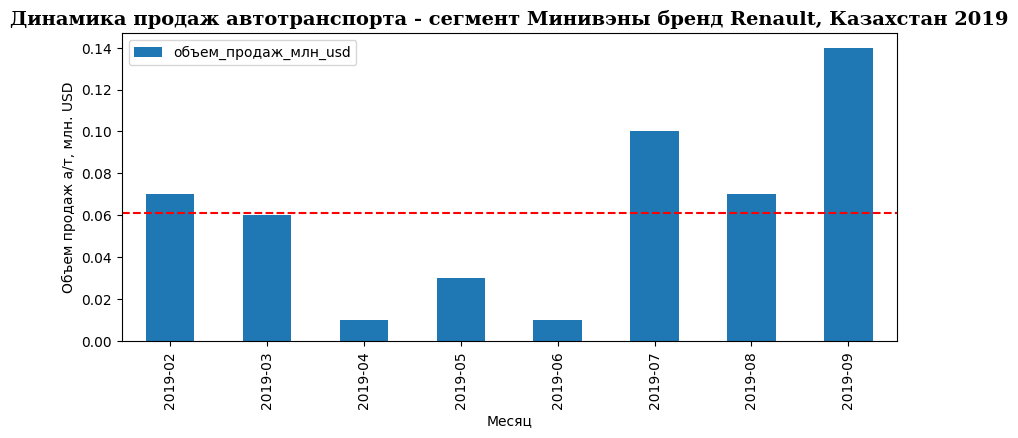


Lada



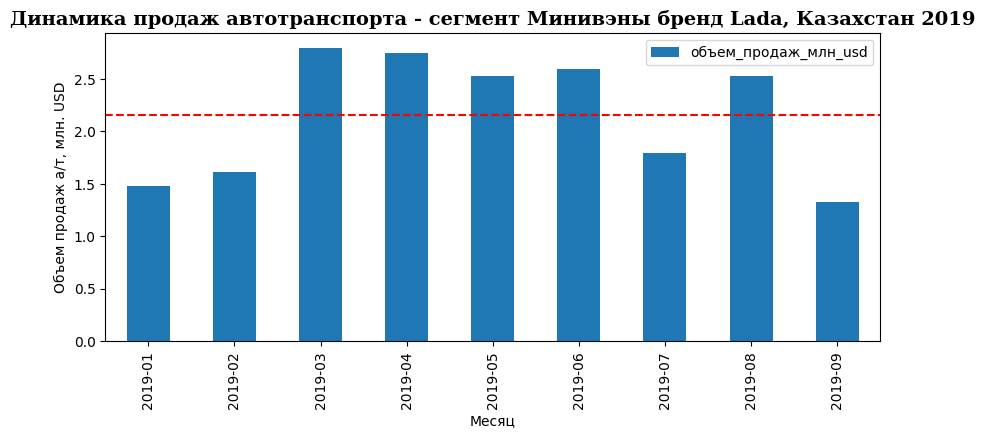


Volkswagen



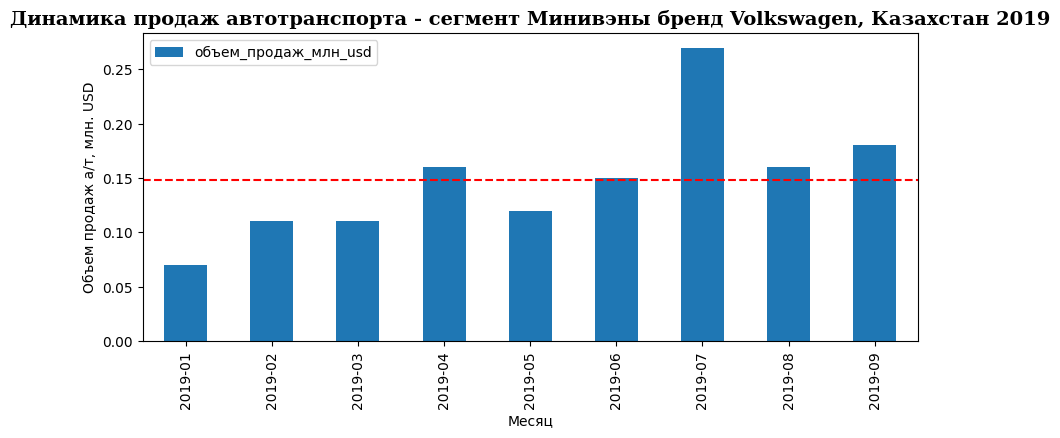

In [43]:
# Запустим функцию analysys для сегмента  'Минивэны'
analysys('Минивэны')

#### **4.6.5.  Анализ продаж в разрезе брендов - сегмент 'Пикапы'**


Создадим таблицу объем продаж в разрезе брендов - сегиентПикапы



год_месяц   бренд  объем_продаж_млн_usd
0   2019-01  Toyota                  2.23
1   2019-01     UAZ                  0.02
2   2019-02   Isuzu                  0.13
3   2019-02  Toyota                  3.13
4   2019-02     UAZ                  0.01


Узнаем топ-5 брендов по количеству проданных а/м - сегмент Пикапы


Построим график динамики продаж в разрезе брендов - сегмент Пикапы


Toyota



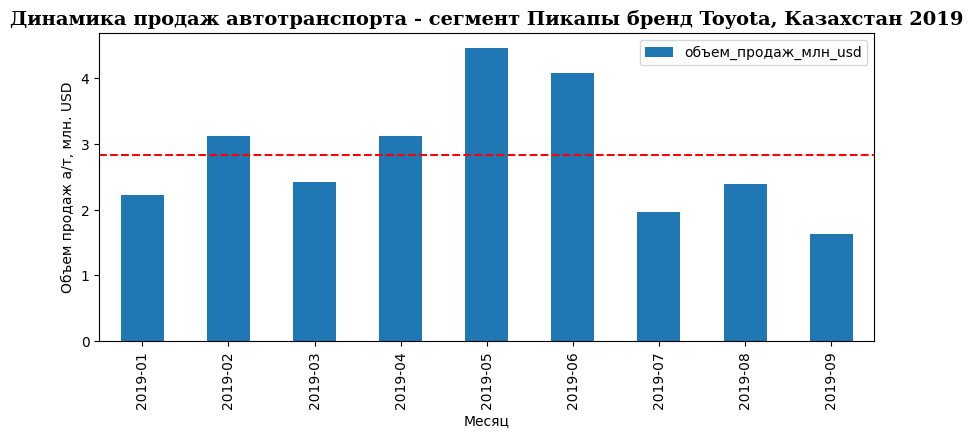


Volkswagen



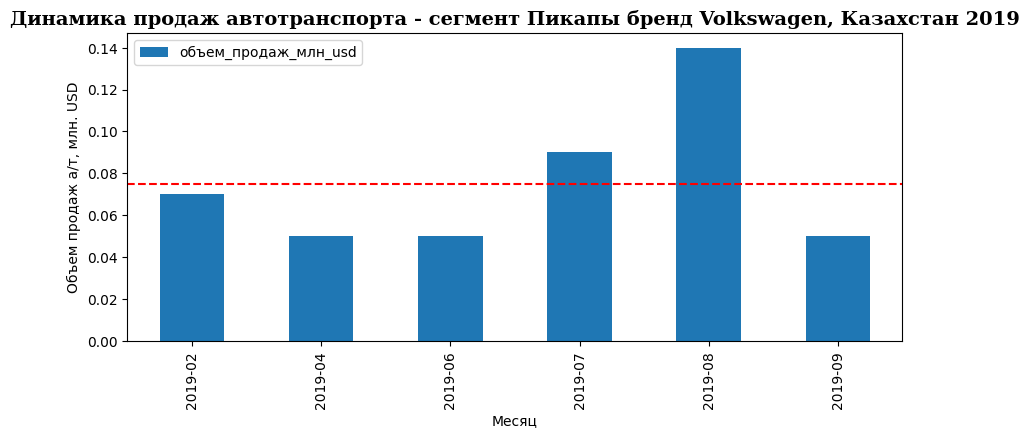


UAZ



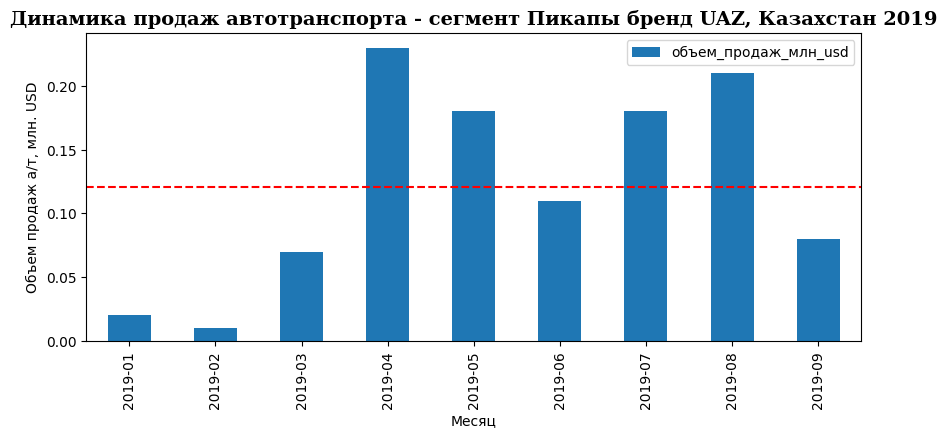


Isuzu



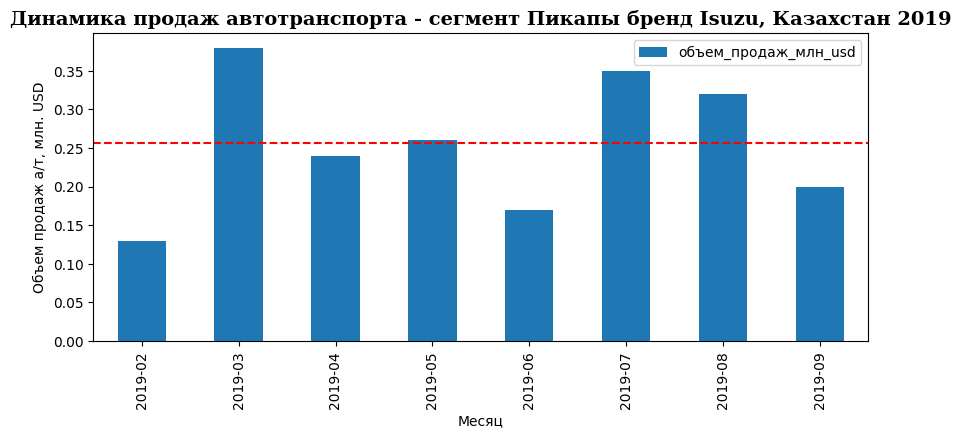

In [44]:
# Запустим функцию analysys для сегмента  'Пикапы'
analysys('Пикапы')

### **4.7.  Анализ продаж автомобилей по маркам**

In [45]:
# Создадим таблицу объем продаж в разрезе брендов
brend_sales = df.pivot_table(index=['год_месяц', 'бренд'],
                                     values = 'общая_стоимость_заказа(usd)',
                                     aggfunc='sum').reset_index()
brend_sales.columns = ['год_месяц', 'бренд', 'объем_продаж_млн_usd']
brend_sales['объем_продаж_млн_usd'] = round(brend_sales['объем_продаж_млн_usd']/1000000, 2)
brend_sales.head()

год_месяц      бренд  объем_продаж_млн_usd
0   2019-01       Audi                  0.18
1   2019-01        BMW                  2.08
2   2019-01   Cadillac                  0.64
3   2019-01  Chevrolet                  1.01
4   2019-01     Daewoo                  0.94

In [46]:
# Узнаем топ-10 брендов по количеству проданных а/м
top_brends = brend_sales.groupby('бренд').agg({'объем_продаж_млн_usd':'sum'}).reset_index().sort_values(by='объем_продаж_млн_usd', ascending=False)
top_brends.head(10)

бренд  объем_продаж_млн_usd
38   Toyota                402.51
11  Hyundai                238.98
19     Lada                107.85
21    Lexus                 77.37
17    KAMAZ                 45.99
18      Kia                 45.67
29   Nissan                 40.02
9       GAZ                 32.26
15      Jac                 30.59
0     ANKAI                 28.91


Mitsubishi



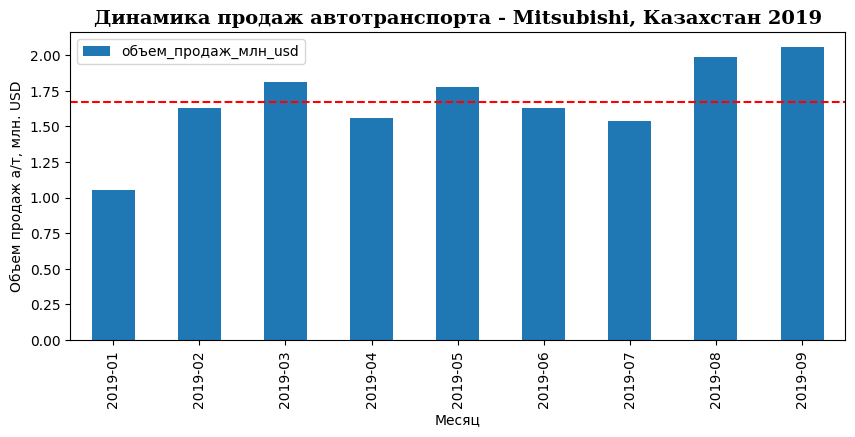


Jac



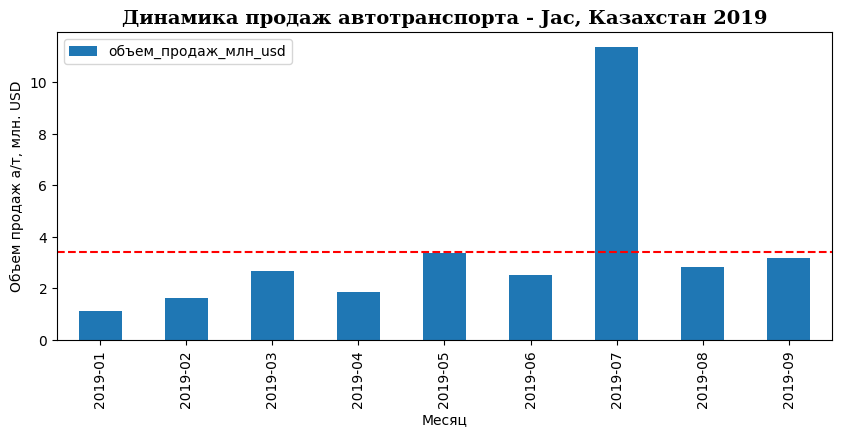


Mazda



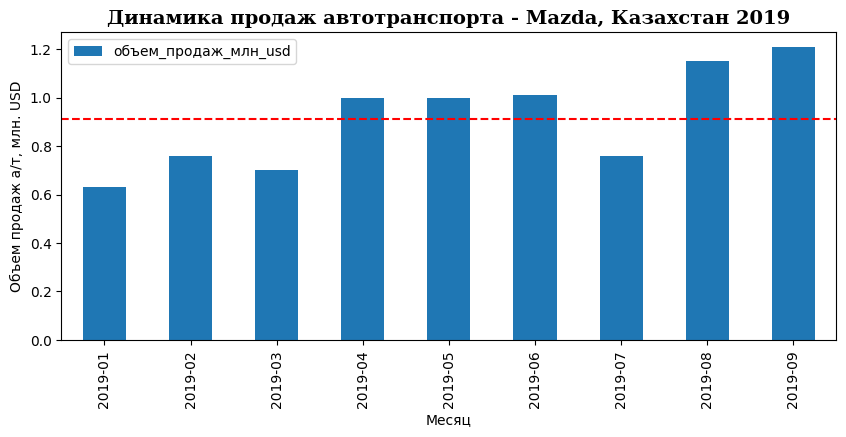


ANKAI



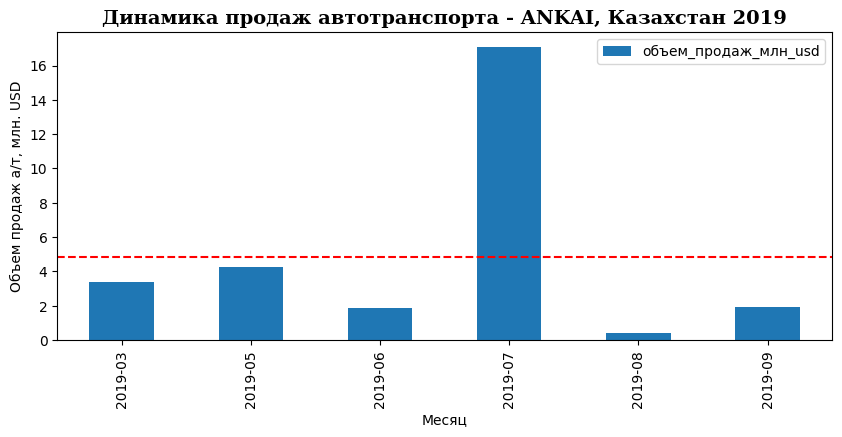


Kia



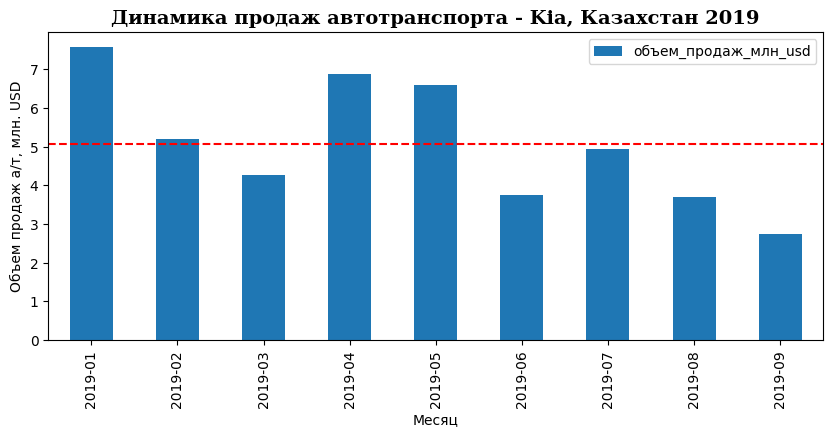


Nissan



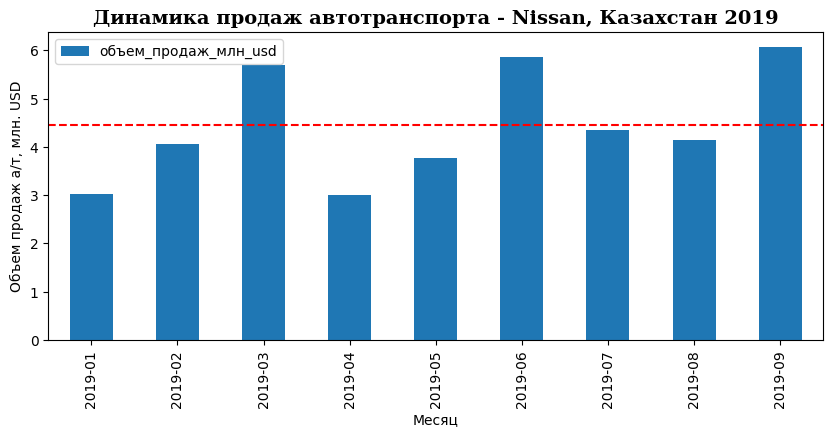


MAN



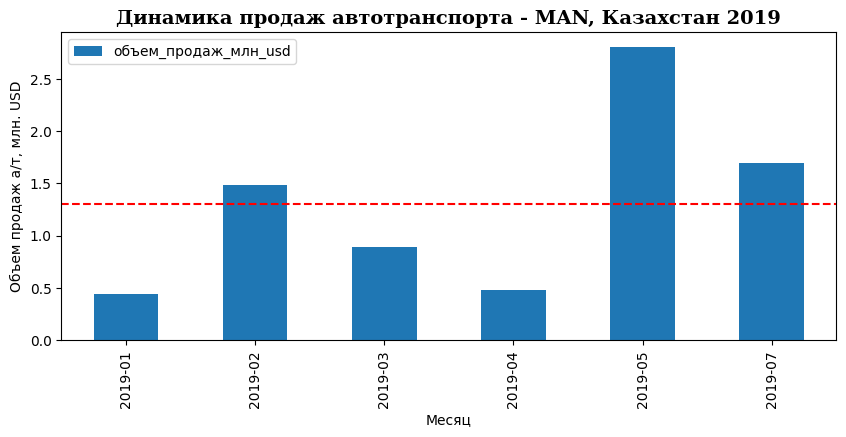


UAZ



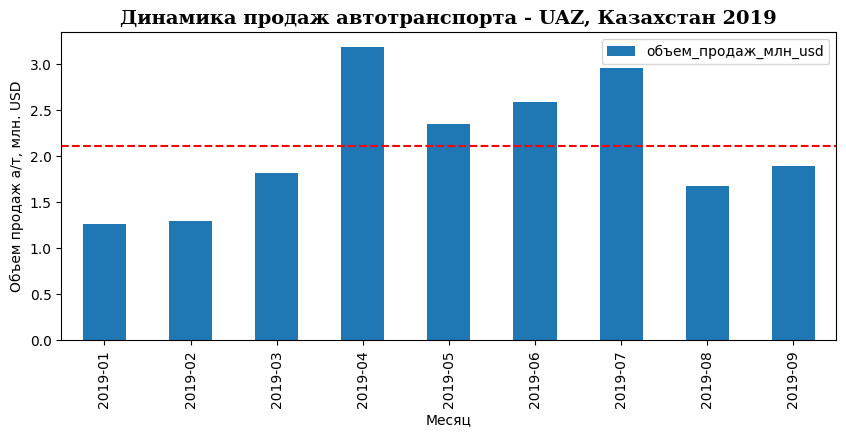


Dong Feng



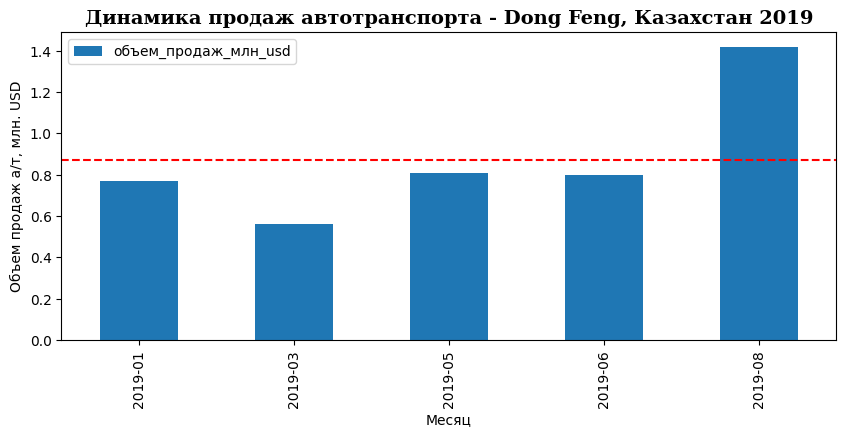


Scania



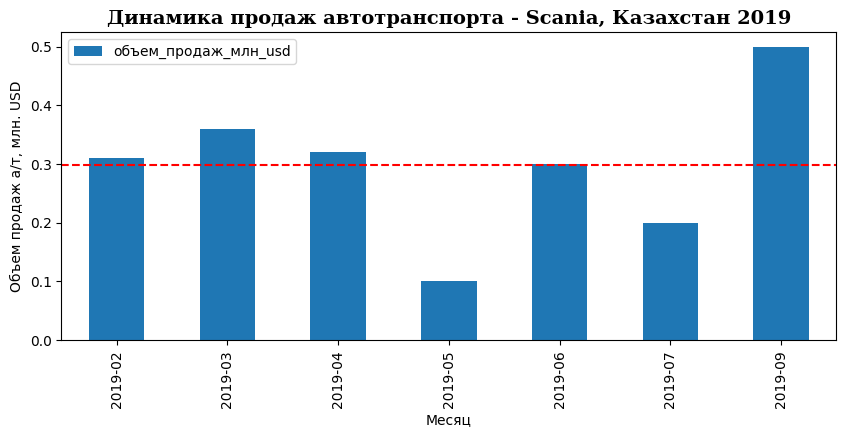


Renault



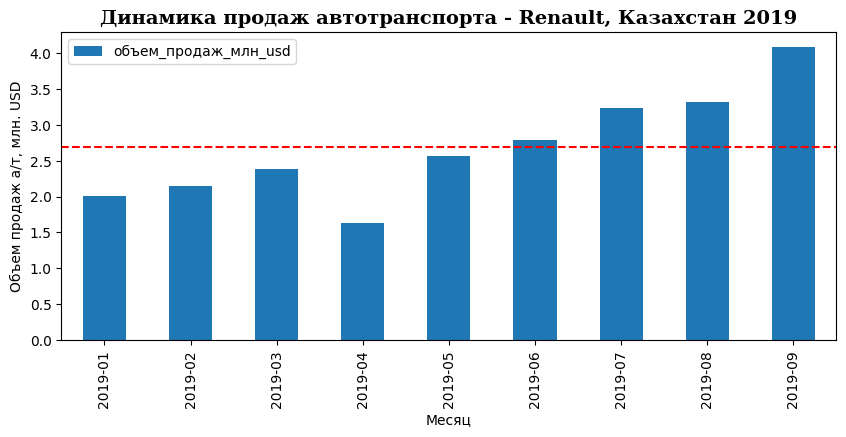


Lada



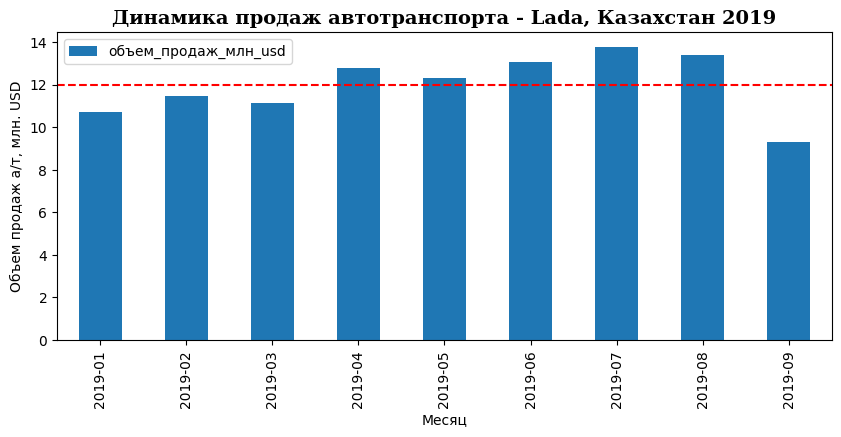


Урал



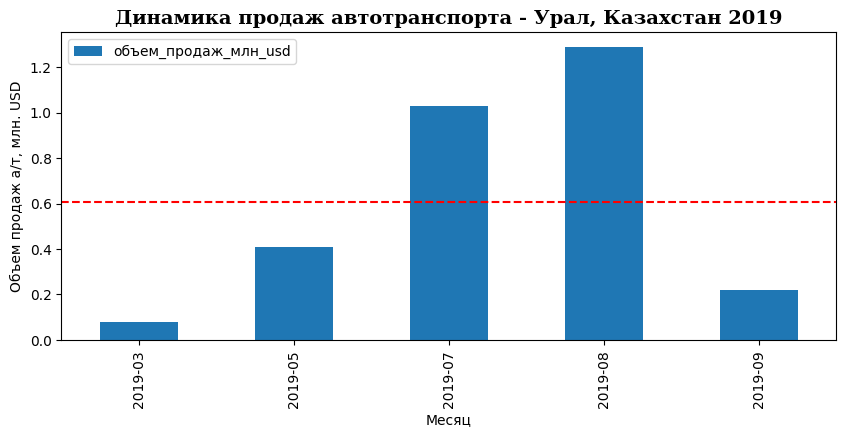


Lexus



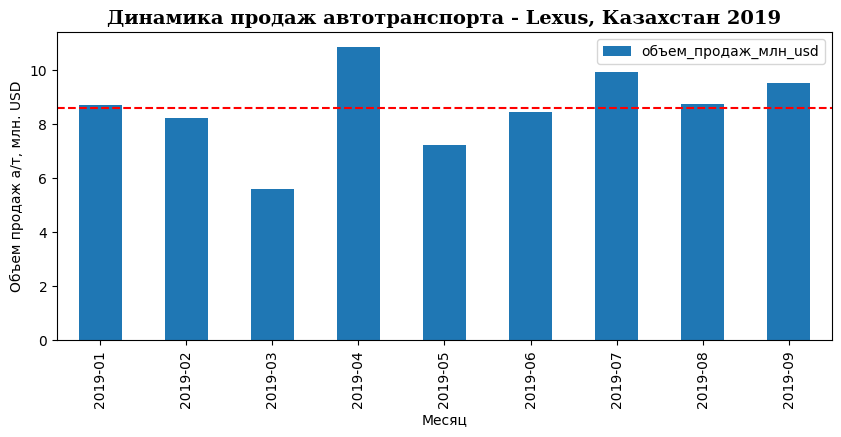


GAZ



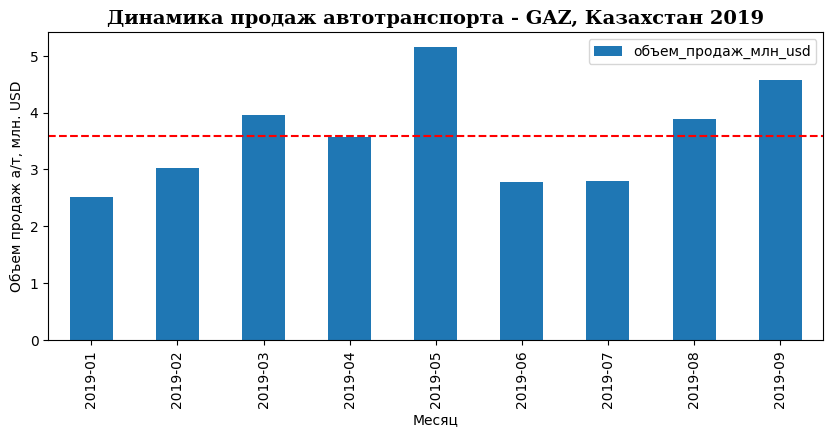


Lifan



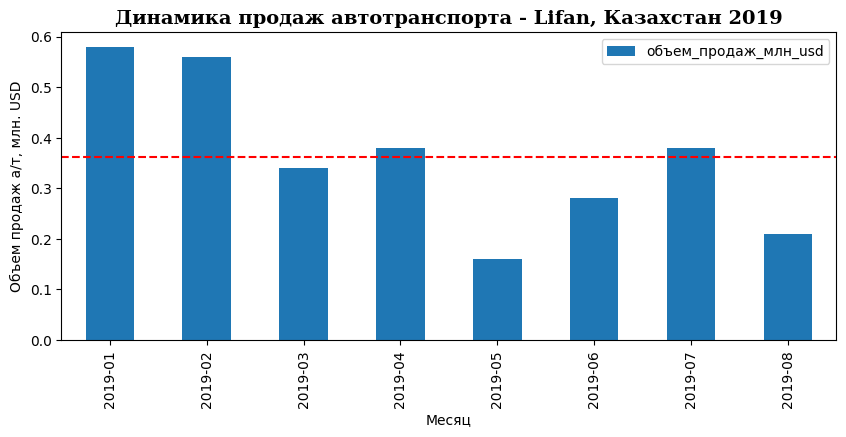


Cadillac



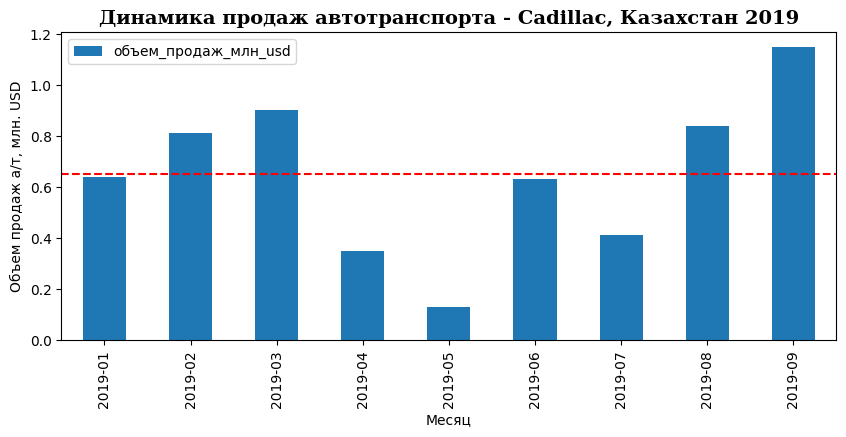


Chevrolet



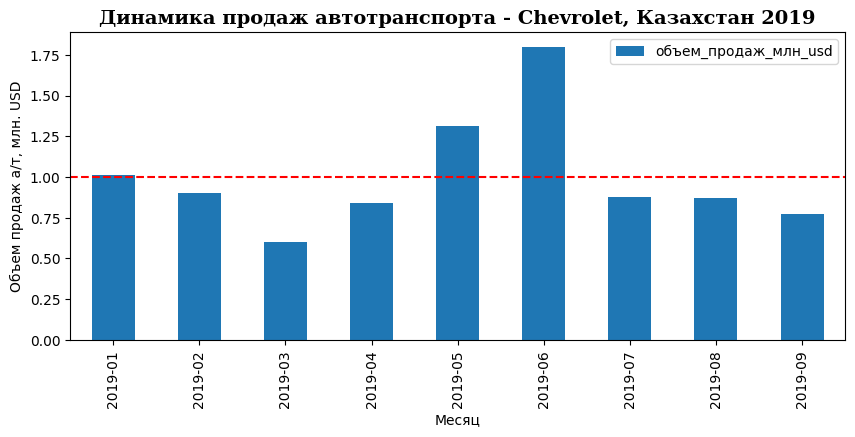


Foton



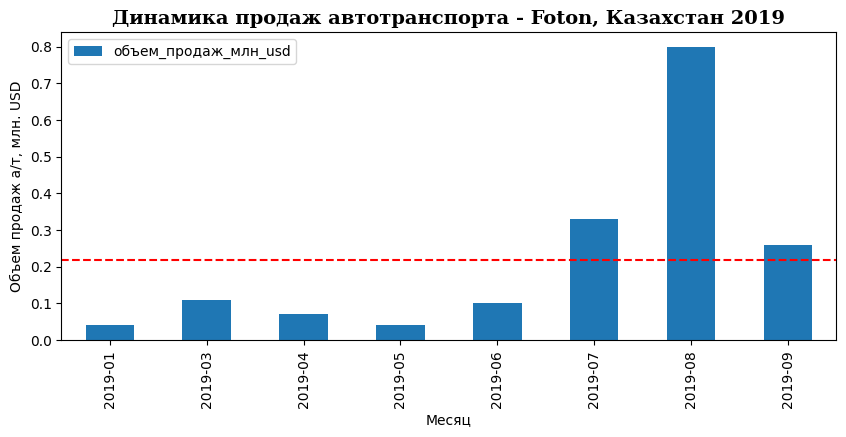


Hyundai



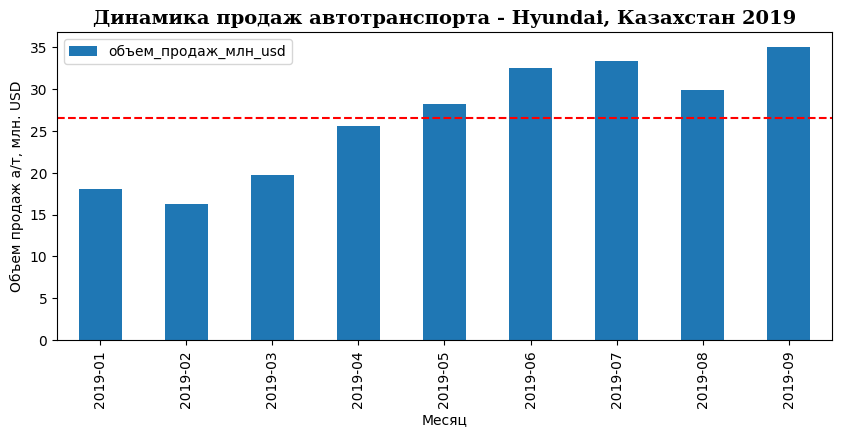


BMW



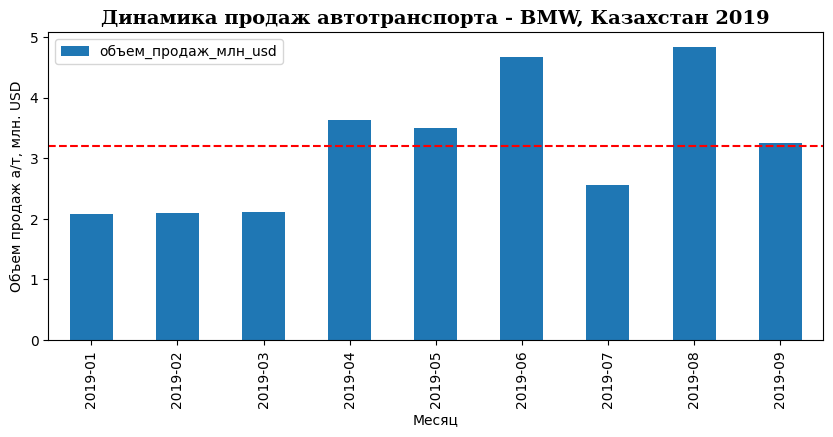


Jaguar



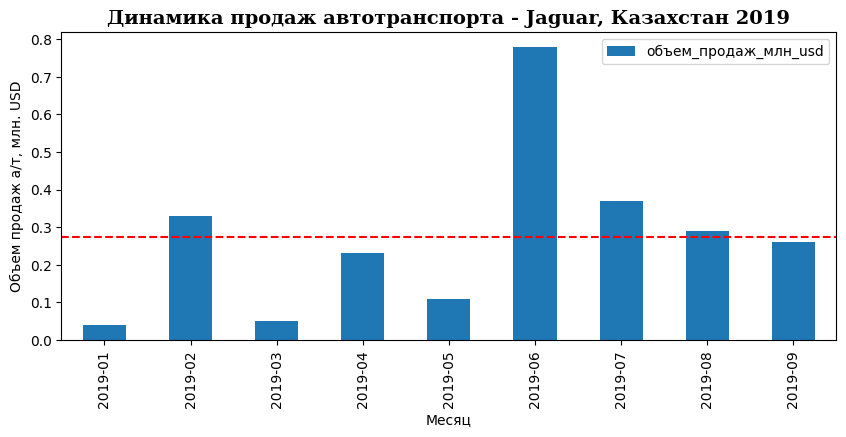


Porsche



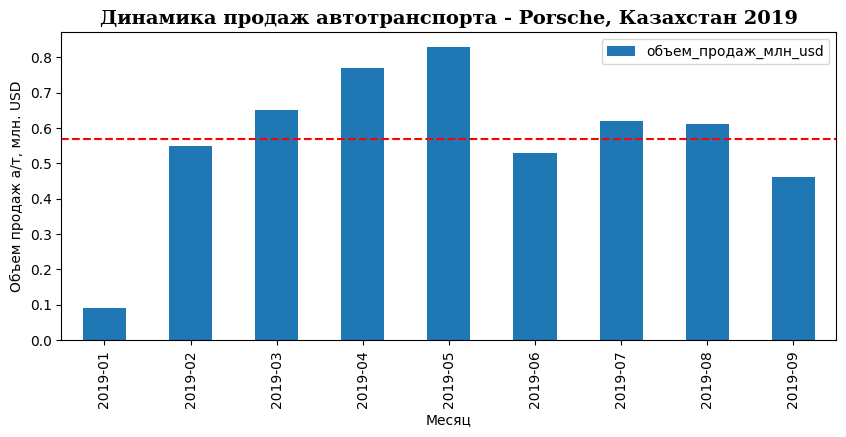


Mercedes-Benz



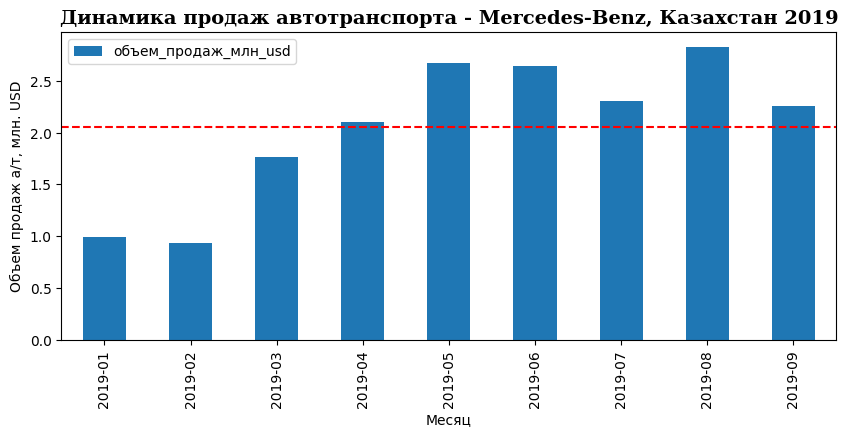


Isuzu



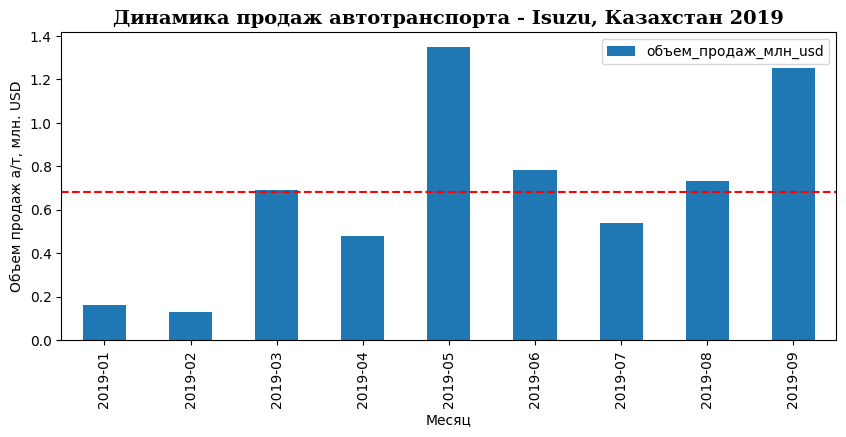


KAMAZ



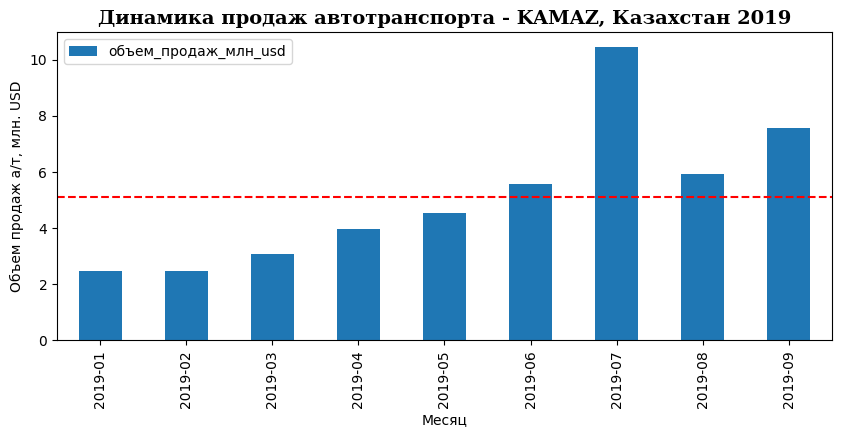


Shacman



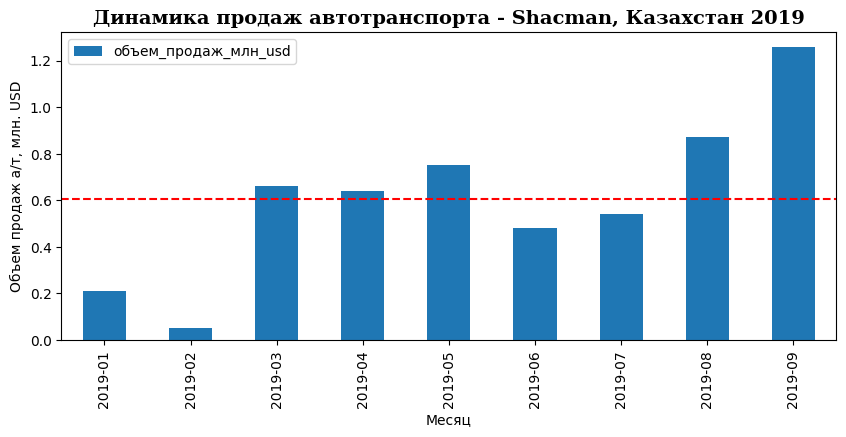


Iveco



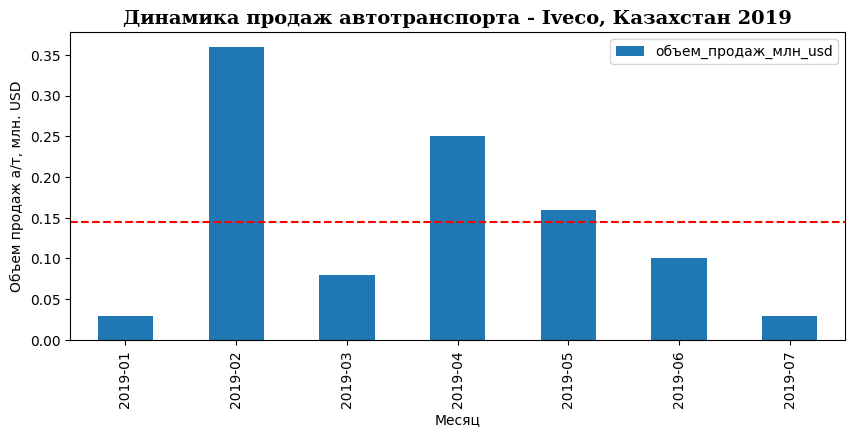


Skoda



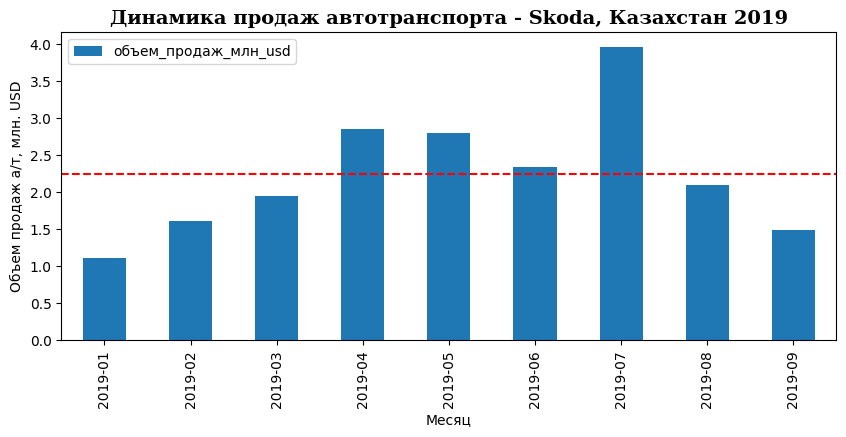


Infiniti



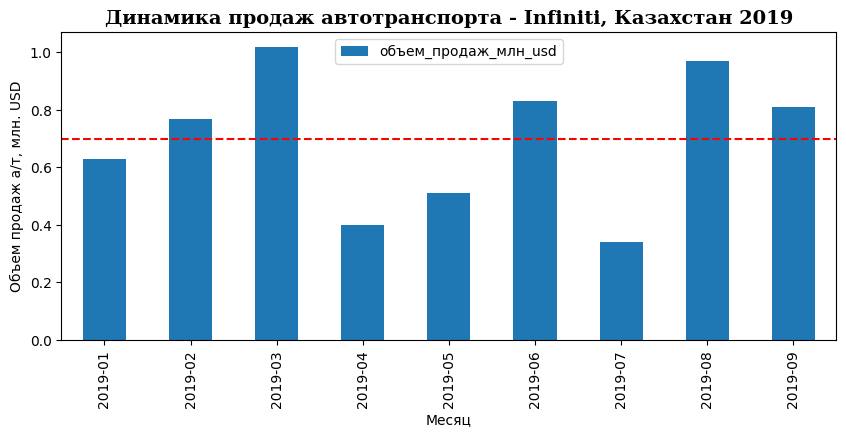


Audi



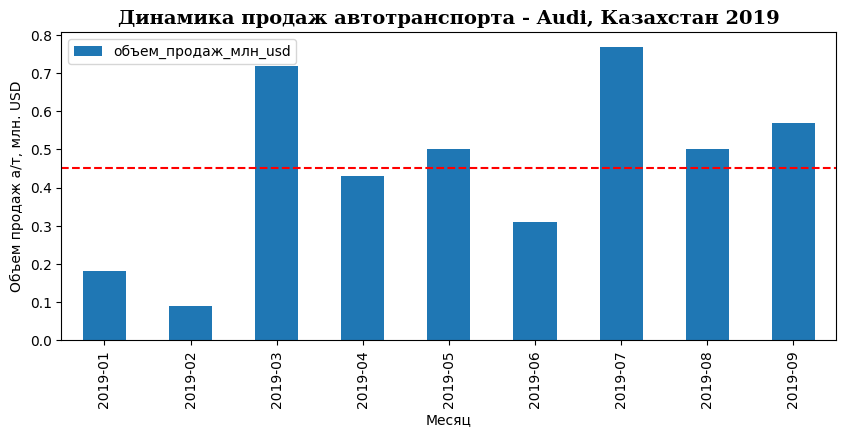


Volkswagen



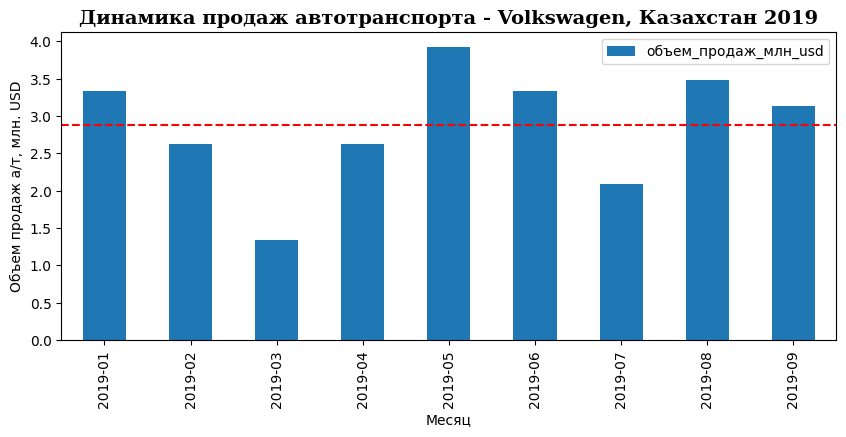


Hino



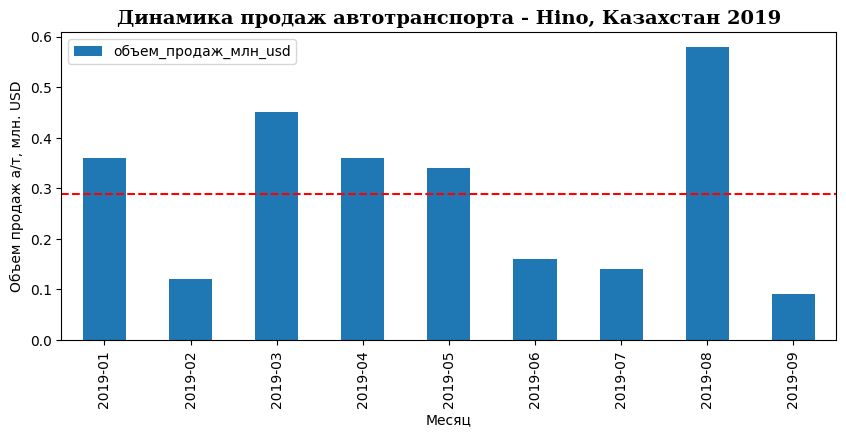


Ford



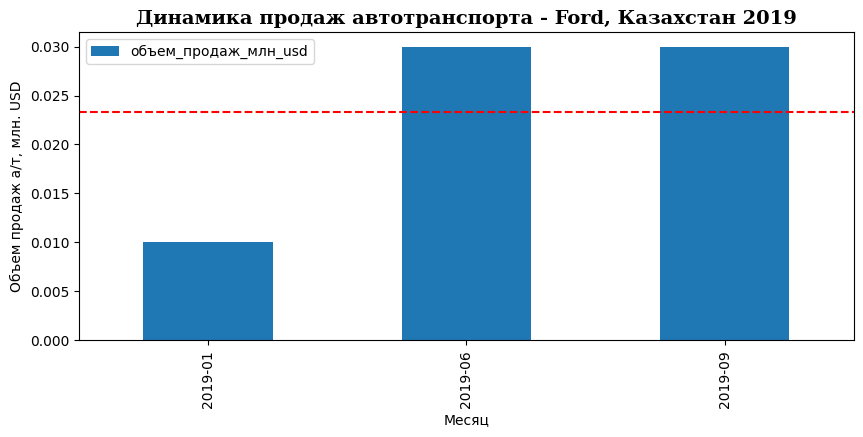


Peugeot



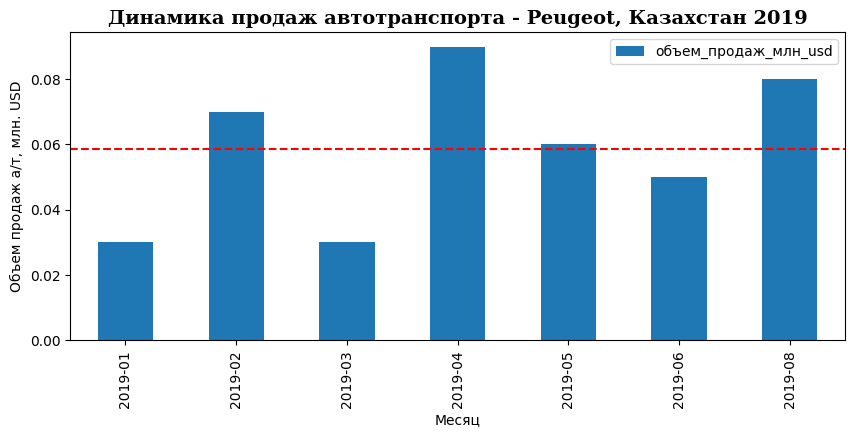


Volvo



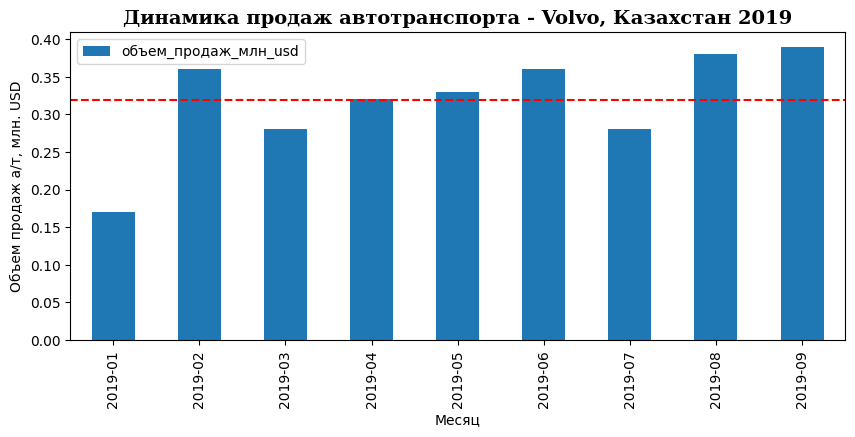


Yutong



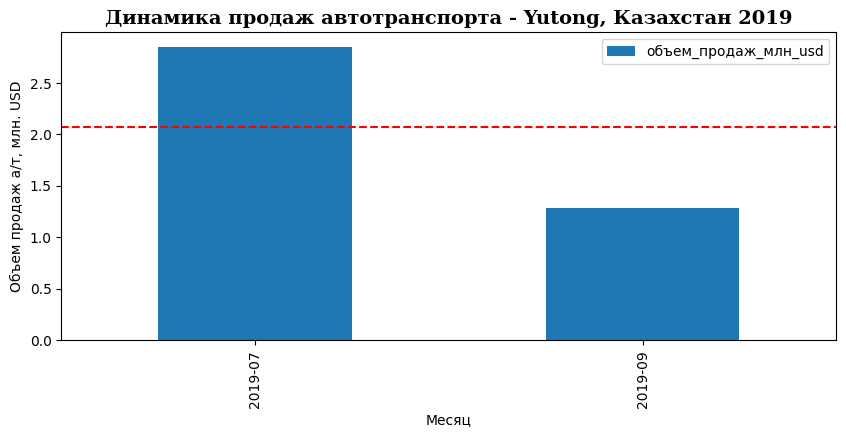


Daewoo



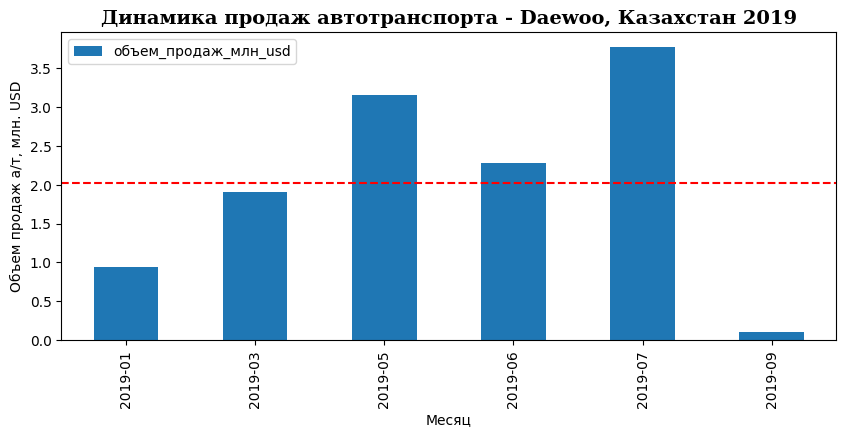


Land Rover



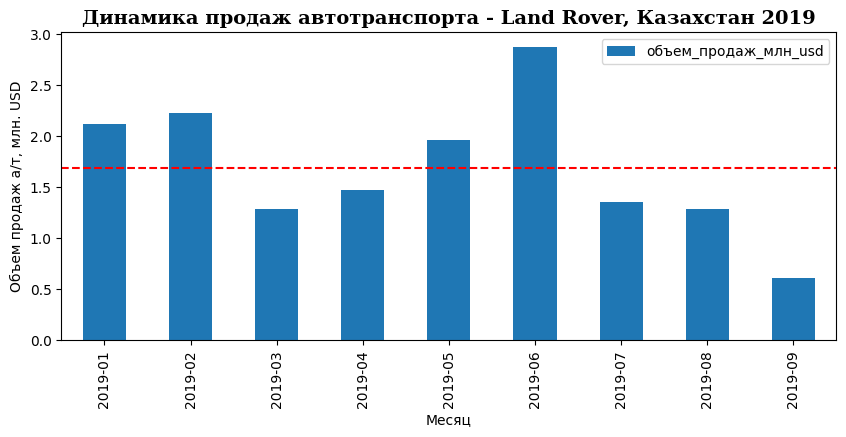


Subaru



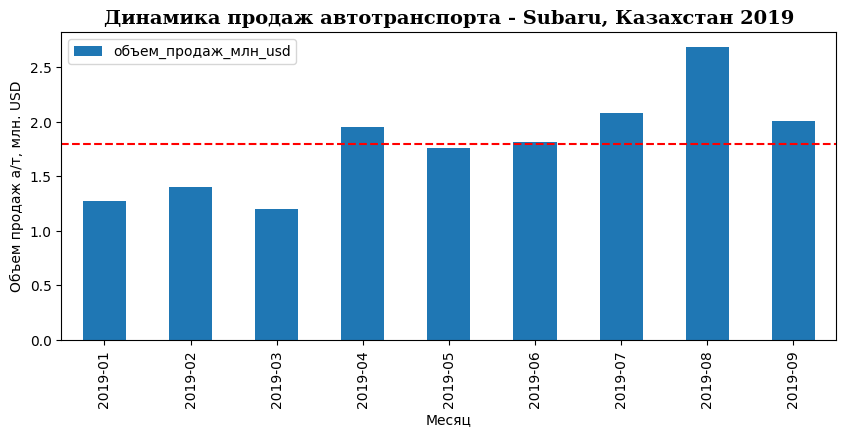


Nefaz



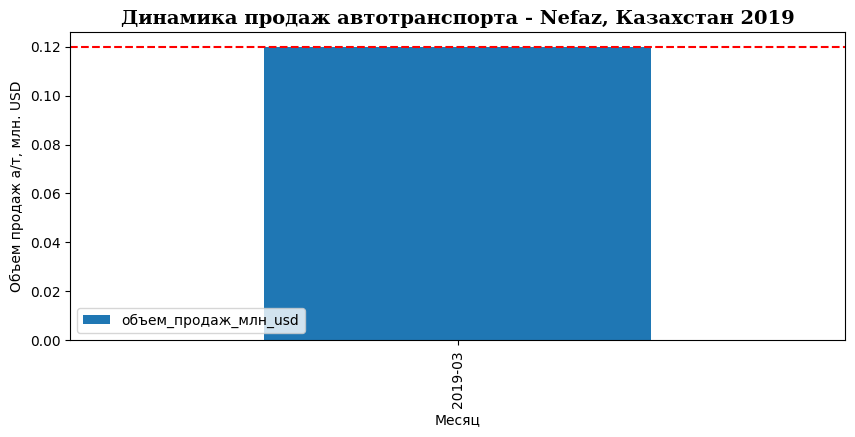


Toyota



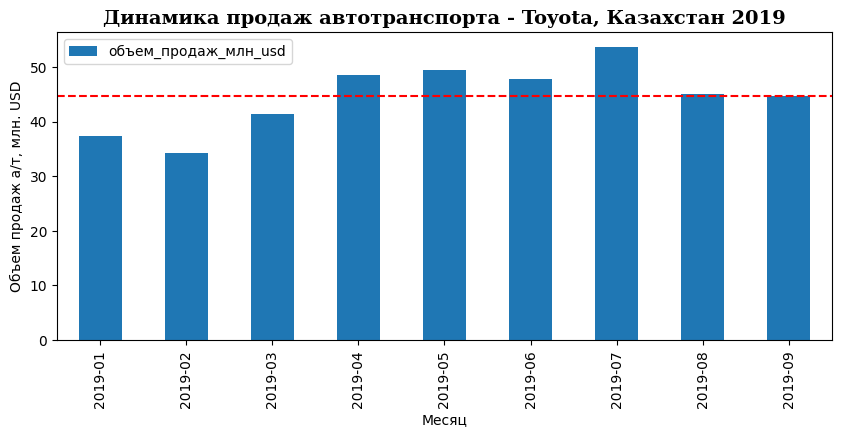


Ravon



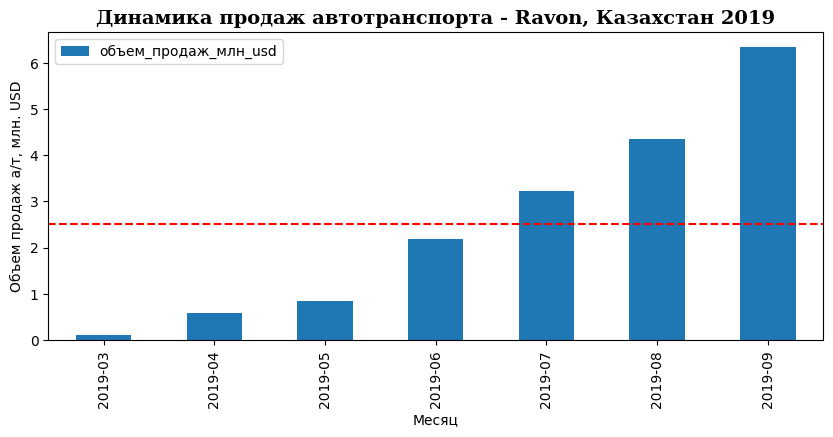


Mini



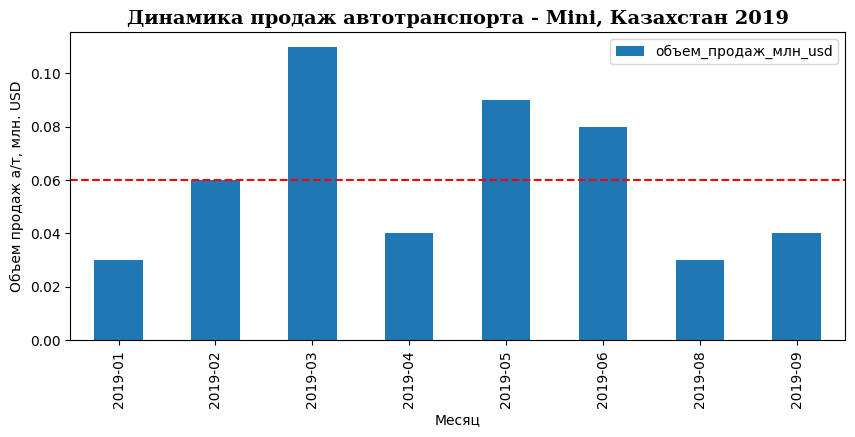

In [47]:
# Построим график динамики продаж в разрезе брендов
for i in set(brend_sales['бренд'].to_list()):
    print()
    print(i)
    print()
    brend_sales[brend_sales['бренд']==i].plot(x = 'год_месяц',
                                                    y = 'объем_продаж_млн_usd',
                                                    kind = 'bar',
                                                    legend = True,
                                                    figsize=(10, 4))
    plt.axhline(y = brend_sales[brend_sales['бренд']==i]['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
    plt.title(f'Динамика продаж автотранспорта - {i}, Казахстан 2019', font={'weight':'bold', 'size': '14', 'family':'serif'})
    plt.xlabel('Месяц')
    plt.ylabel('Объем продаж а/т, млн. USD')
    plt.show()

### **4.8.  Анализ продаж по регионам**

In [48]:
# Создадим таблицу объем продаж в разрезе регионов
regions_sales = df.pivot_table(index=['год_месяц', 'область'],
                                       values = 'общая_стоимость_заказа(usd)',
                                       aggfunc='sum').reset_index()
regions_sales.columns = ['год_месяц', 'область', 'объем_продаж_млн_usd']
regions_sales['объем_продаж_млн_usd'] = round(regions_sales['объем_продаж_млн_usd']/1000000, 2)
regions_sales.head()

год_месяц                         область  объем_продаж_млн_usd
0   2019-01             Акмолинская область                  0.97
1   2019-01             Актюбинская область                  3.87
2   2019-01             Алматинская область                  0.61
3   2019-01              Атырауская область                  7.18
4   2019-01  Восточно-Казахстанская область                  4.11

In [49]:
# Узнаем топ-10 областей по количеству проданных а/м
top_regions = regions_sales.groupby('область').agg({'объем_продаж_млн_usd':'sum'}).reset_index().sort_values(by='объем_продаж_млн_usd', ascending=False)
top_regions['уд_вес_%'] = round(top_regions['объем_продаж_млн_usd']/(top_regions['объем_продаж_млн_usd'].sum()/100), 2)
top_regions.head(10)

область  объем_продаж_млн_usd  уд_вес_%
16                        г.Алматы                426.41     31.61
17                    г.Нур-Султан                292.68     21.70
8             Костанайская область                 88.33      6.55
15      Южно-Казахстанская область                 81.77      6.06
3               Атырауская область                 74.71      5.54
4   Восточно-Казахстанская область                 60.46      4.48
7           Карагандинская область                 59.97      4.45
10           Мангистауская область                 46.72      3.46
6    Западно-Казахстанская область                 45.78      3.39
1              Актюбинская область                 44.22      3.28


Мангистауская область



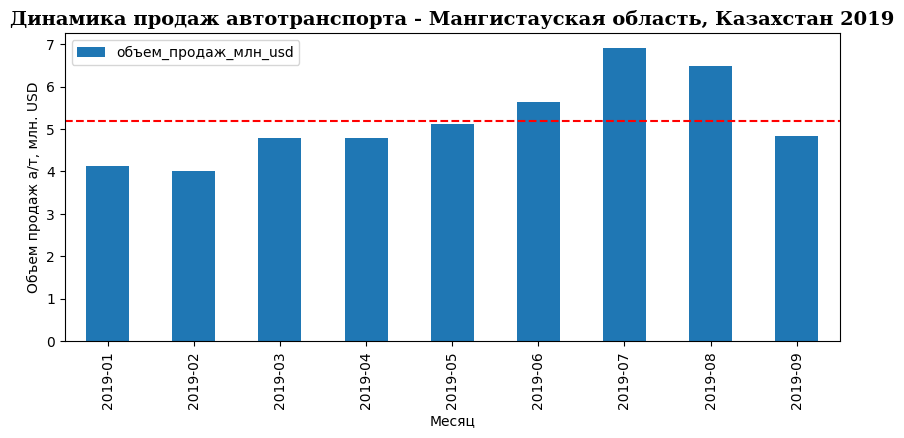


Акмолинская область



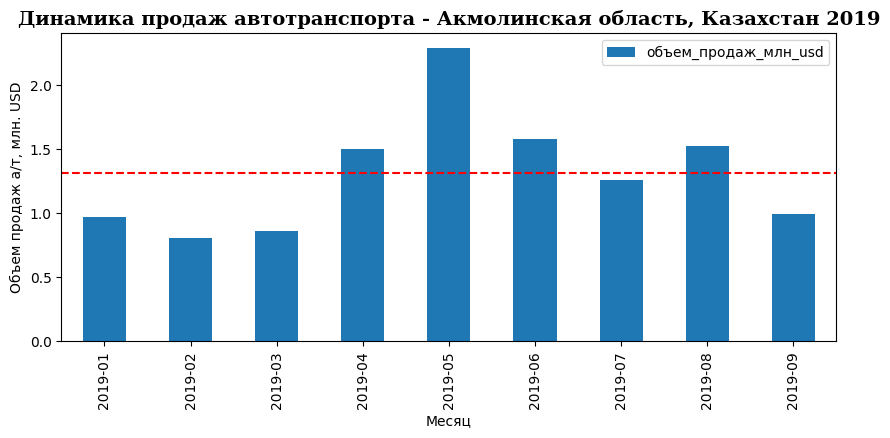


Экспорт область



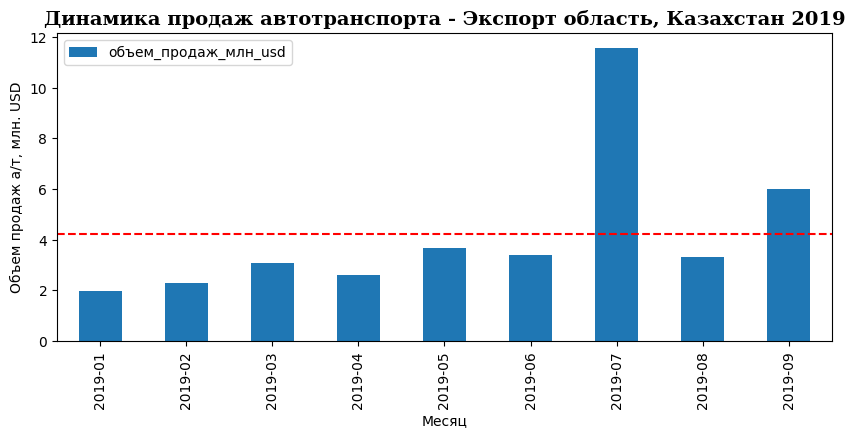


Алматинская область



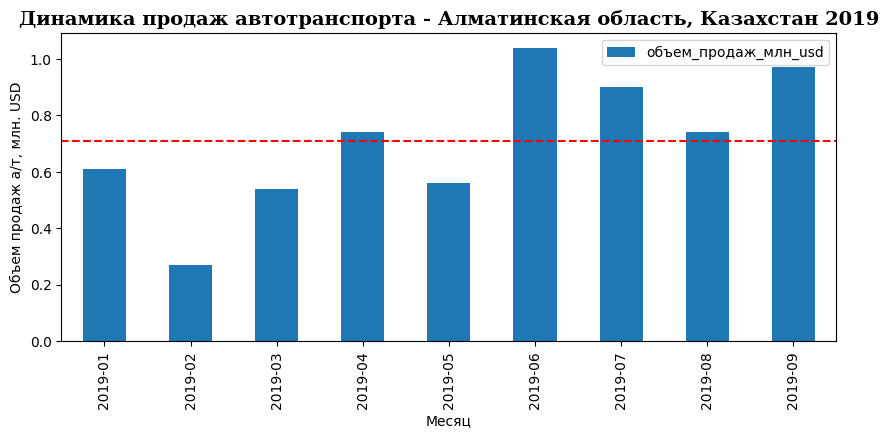


Кызылординская область



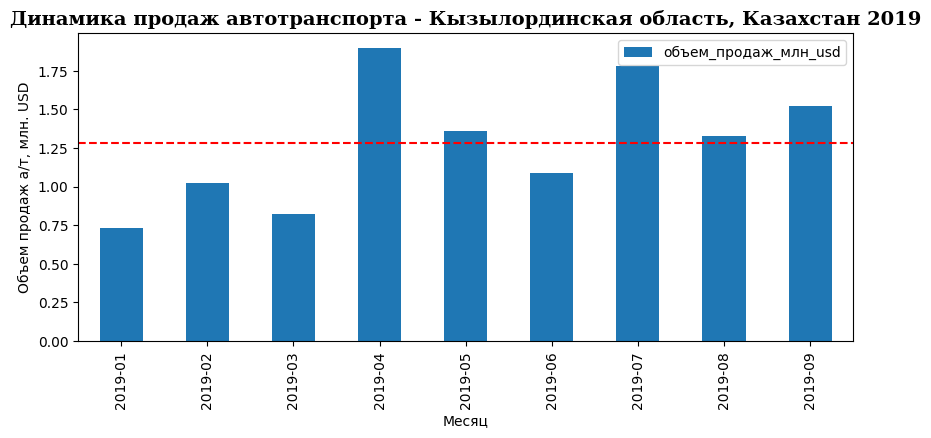


Костанайская область



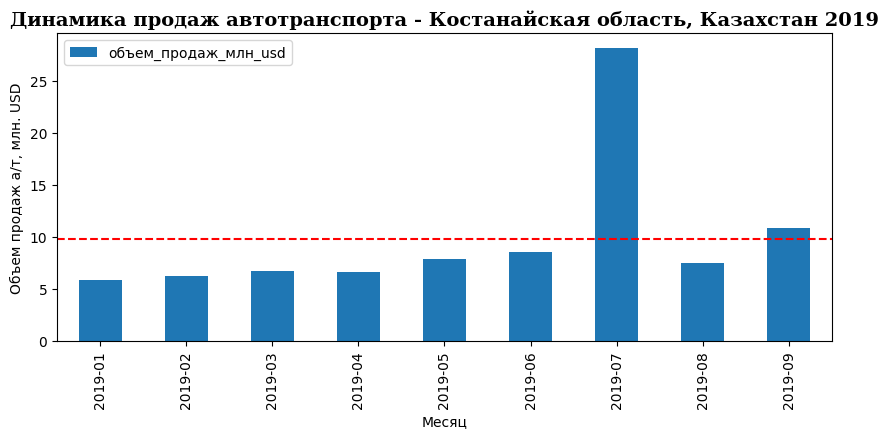


Северо-Казахстанская область



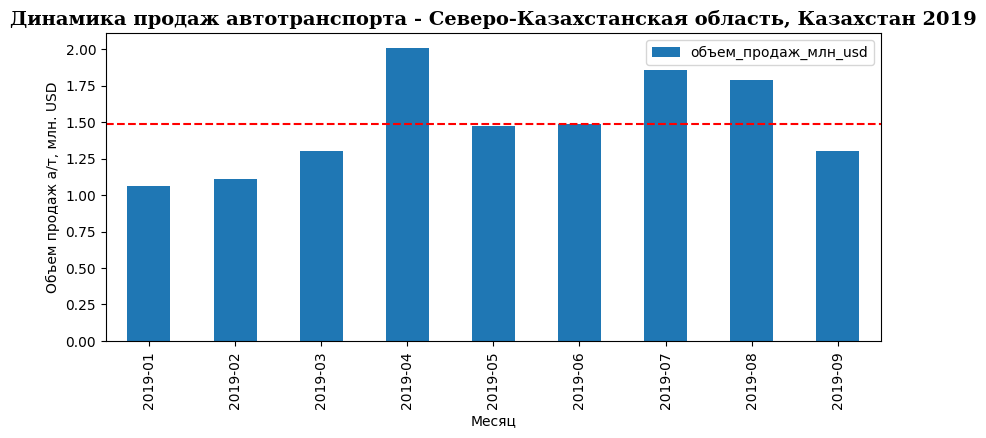


г.Нур-Султан



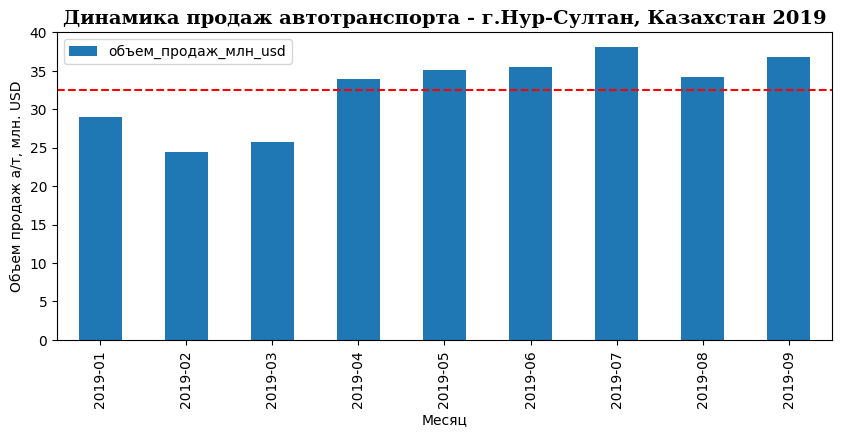


Южно-Казахстанская область



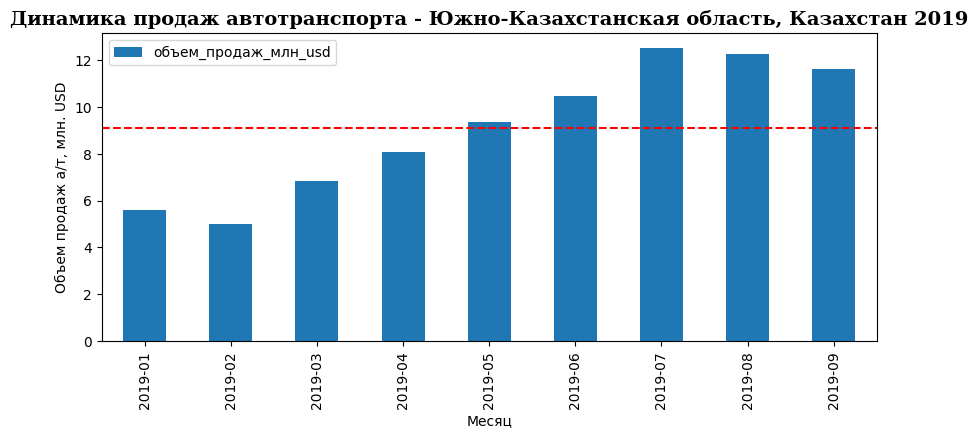


Туркестанская область



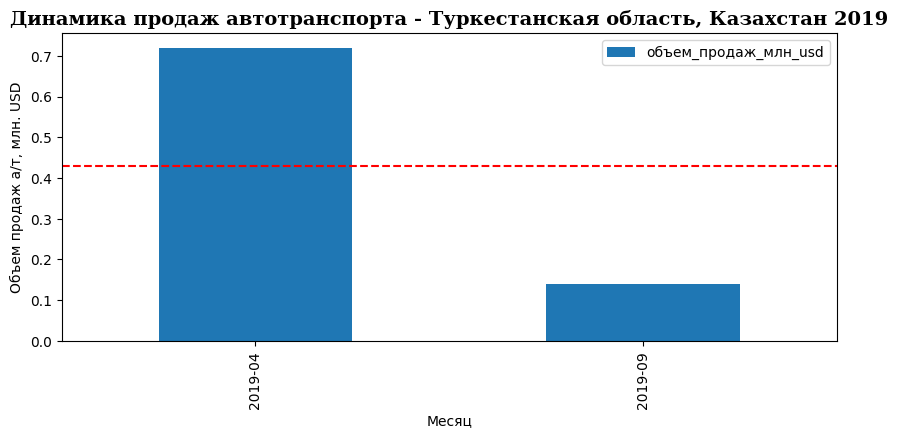


г.Алматы



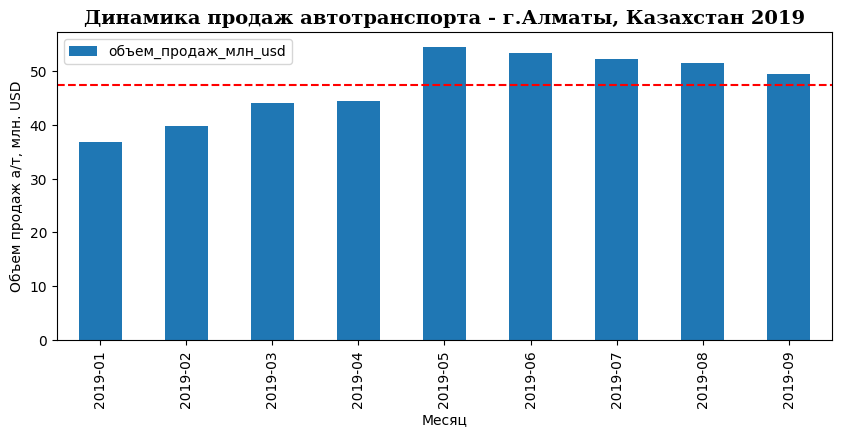


Актюбинская область



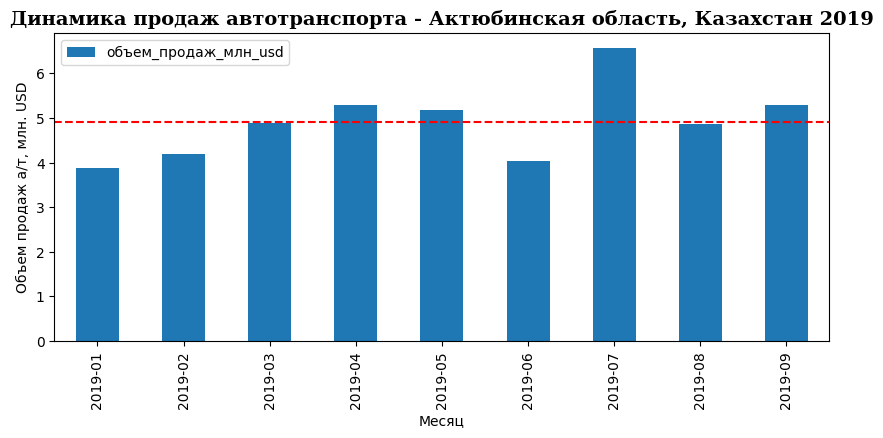


Атырауская область



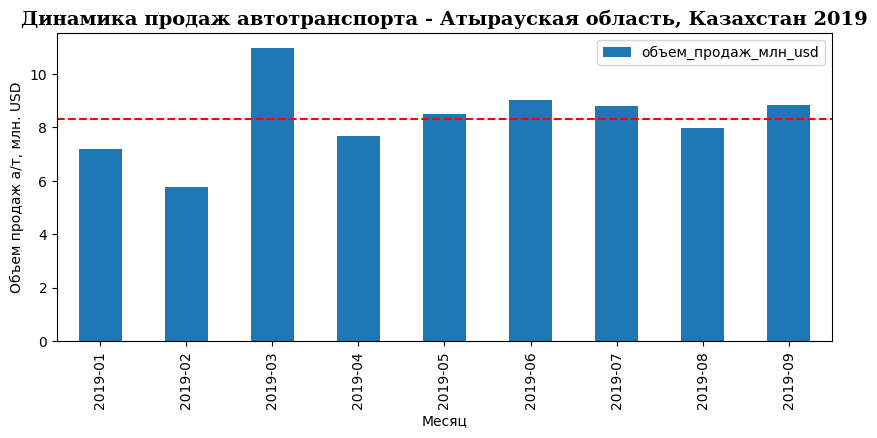


Восточно-Казахстанская область



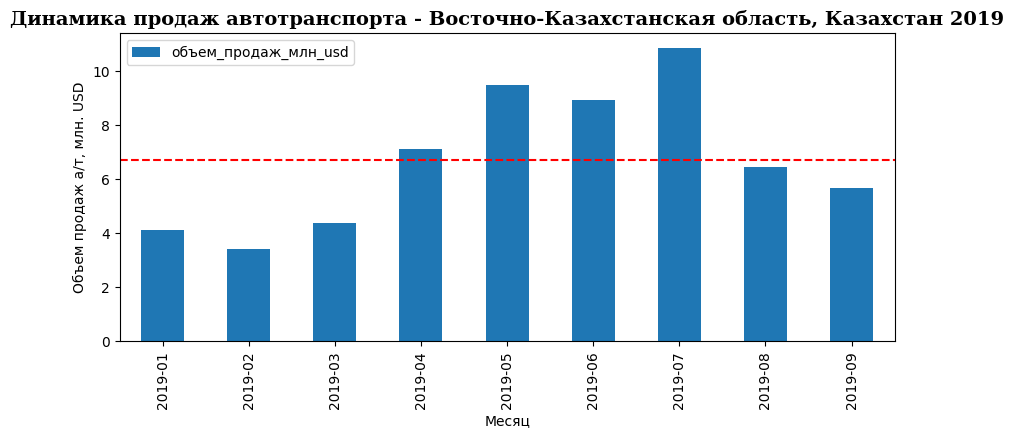


Карагандинская область



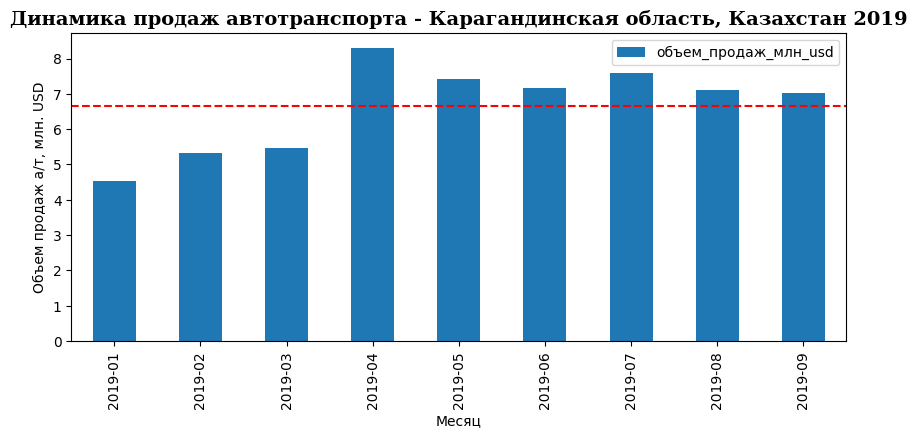


Павлодарская область



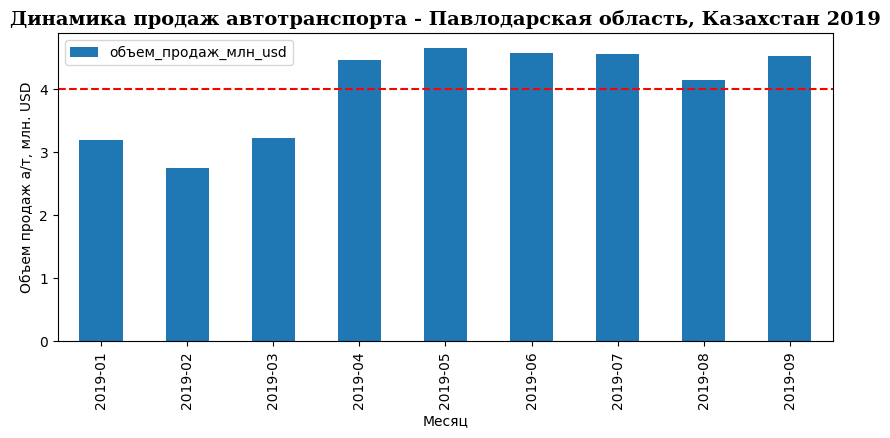


Жамбылская область



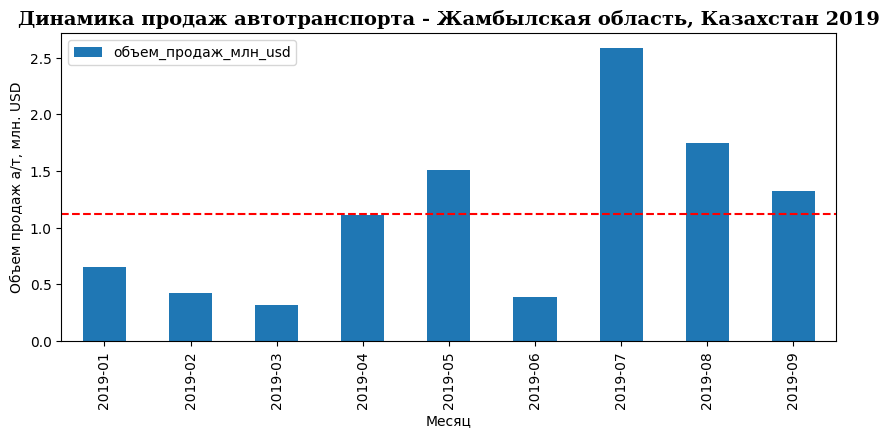


Западно-Казахстанская область



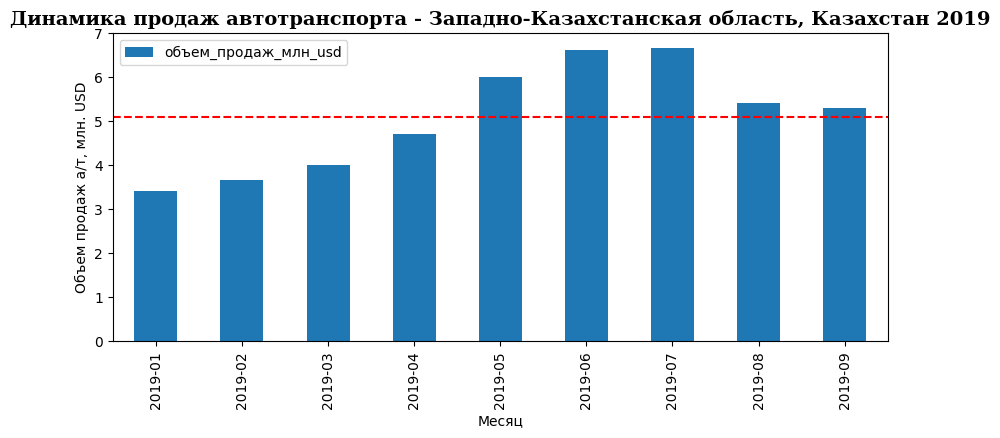

In [50]:
# Построим график динамики продаж в разрезе регионов
for i in set(regions_sales['область'].to_list()):
    print()
    print(i)
    print()
    regions_sales[regions_sales['область']==i].plot(x = 'год_месяц',
                                                    y = 'объем_продаж_млн_usd',
                                                    kind = 'bar',
                                                    legend = True,
                                                    figsize=(10, 4))
    plt.axhline(y = regions_sales[regions_sales['область']==i]['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
    plt.title(f'Динамика продаж автотранспорта - {i}, Казахстан 2019', font={'weight':'bold', 'size': '14', 'family':'serif'})
    plt.xlabel('Месяц')
    plt.ylabel('Объем продаж а/т, млн. USD')
    plt.show()

### **4.9.  Анализ продаж автоцентров**

In [51]:
# Создадим таблицу объем продаж в разрезе автоцентров
companies_sales = df.pivot_table(index=['год_месяц', 'компания'],
                                       values = 'общая_стоимость_заказа(usd)',
                                       aggfunc='sum').reset_index()
companies_sales .columns = ['год_месяц', 'компания', 'объем_продаж_млн_usd']
companies_sales['объем_продаж_млн_usd'] = round(companies_sales['объем_продаж_млн_usd']/1000000, 2)
companies_sales.head()

год_месяц               компания  объем_продаж_млн_usd
0   2019-01             Allur Auto                  1.18
1   2019-01  Almaty Motors Premium                  1.07
2   2019-01          Astana Motors                 17.33
3   2019-01            Autokapital                  0.99
4   2019-01         Caspian Motors                  0.01

In [52]:
# Узнаем топ-10 компаний по количеству проданных а/м
top_companies = companies_sales.groupby('компания').agg({'объем_продаж_млн_usd':'sum'}).reset_index().sort_values(by='объем_продаж_млн_usd', ascending=False)
top_companies['уд_вес_%'] = round(top_companies['объем_продаж_млн_usd']/(top_companies['объем_продаж_млн_usd'].sum())*100, 2)
top_companies.head(10)

компания  объем_продаж_млн_usd  уд_вес_%
19   Toyota Motor Kazakhstan                479.87     35.57
2              Astana Motors                229.34     17.00
25                БИПЭК АВТО                185.98     13.79
0                 Allur Auto                 66.50      4.93
12  Nissan Manufacturing RUS                 46.30      3.43
30                  ТК КАМАЗ                 46.11      3.42
26                     Вираж                 46.09      3.42
24         Автоцентр-Бавария                 29.21      2.17
14            Renault Россия                 24.18      1.79
11               Mercur Auto                 19.37      1.44


Ravon Motors Kazakstan



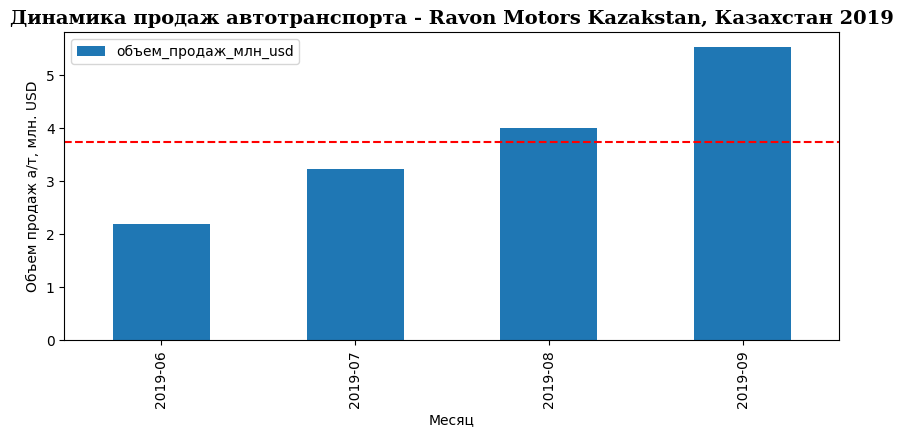


MMC RUS



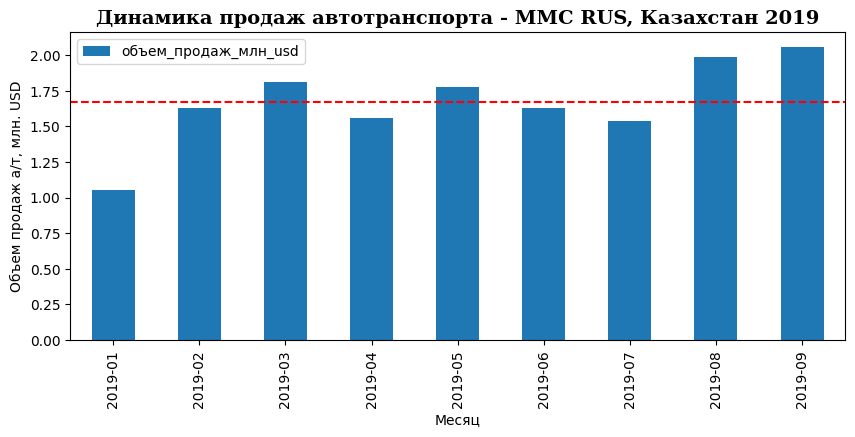


Caspian Motors



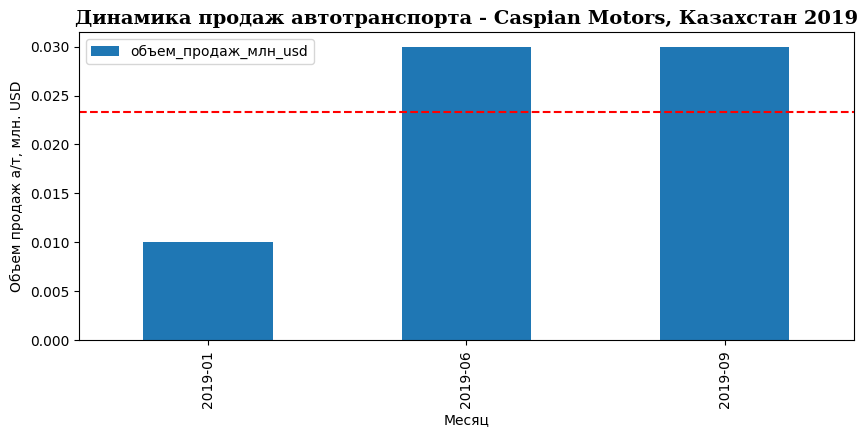


Subaru Kazakhstan



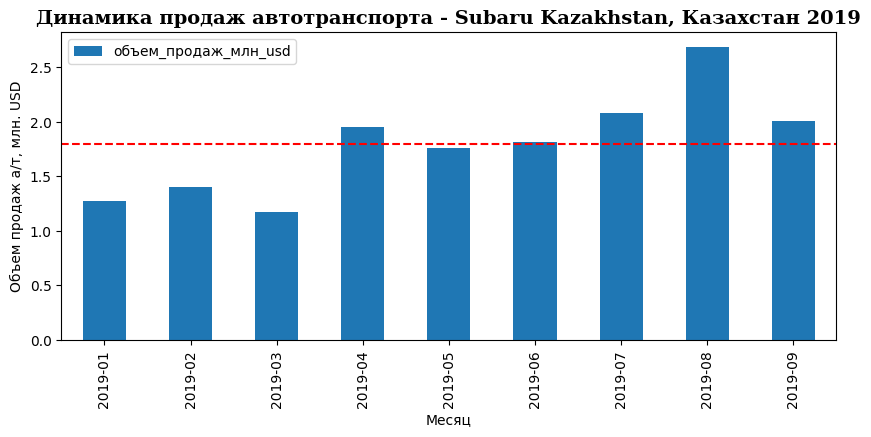


Вираж



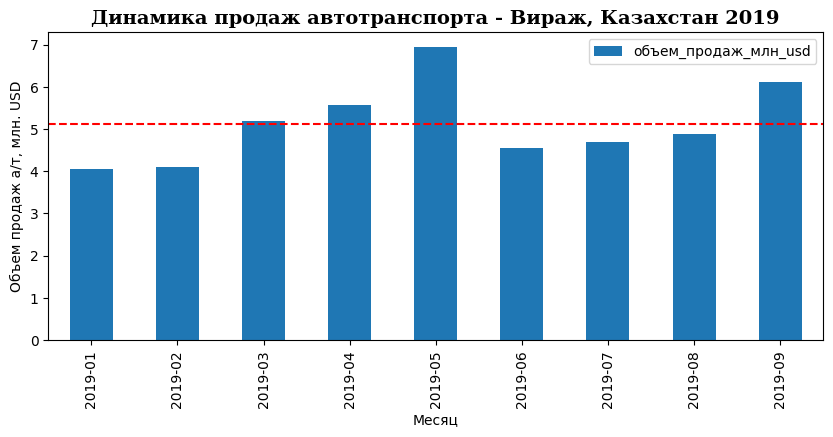


Mercur Auto



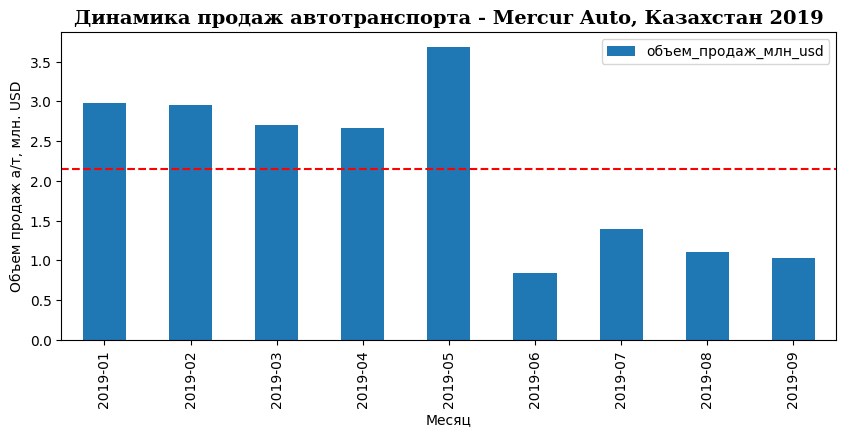


Volkswagen Group Rus



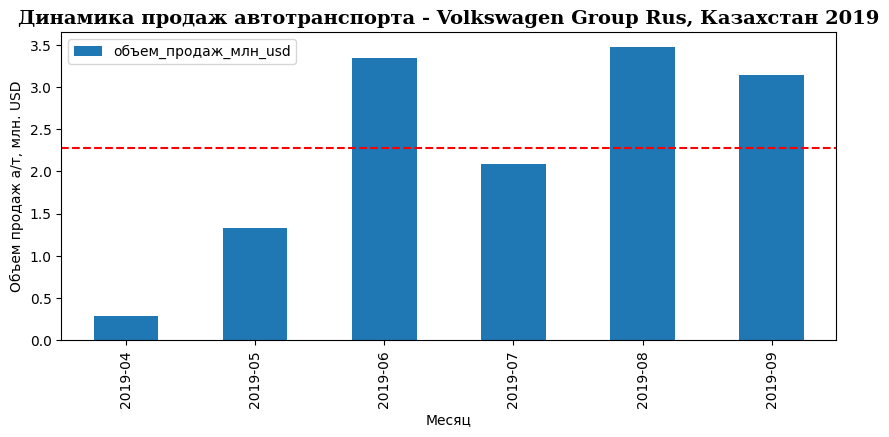


УзАвто-Казахстан



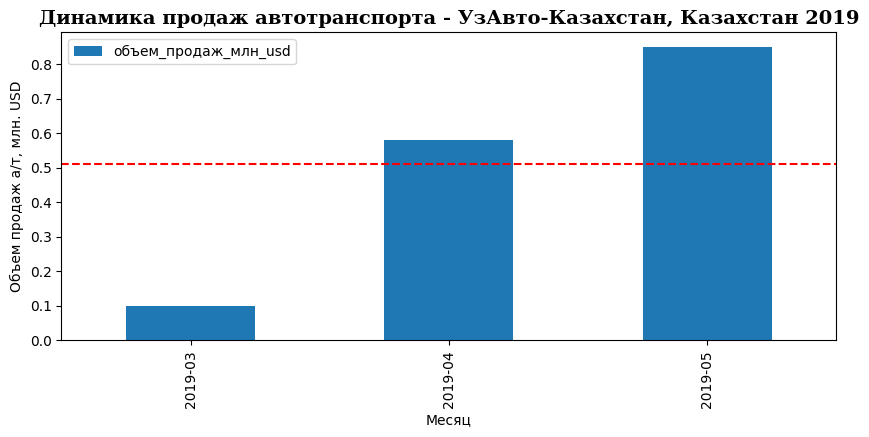


MAN Truck & Bus Kazakhstan



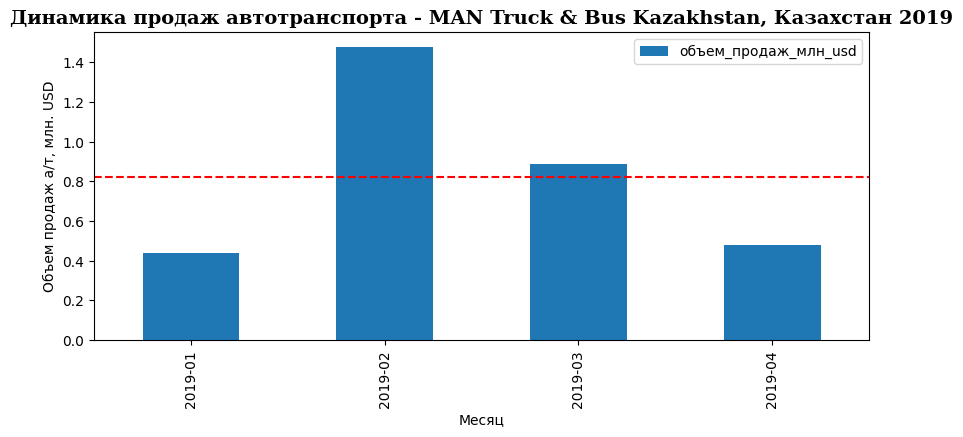


Hyundai Com Trans Kazakhstan



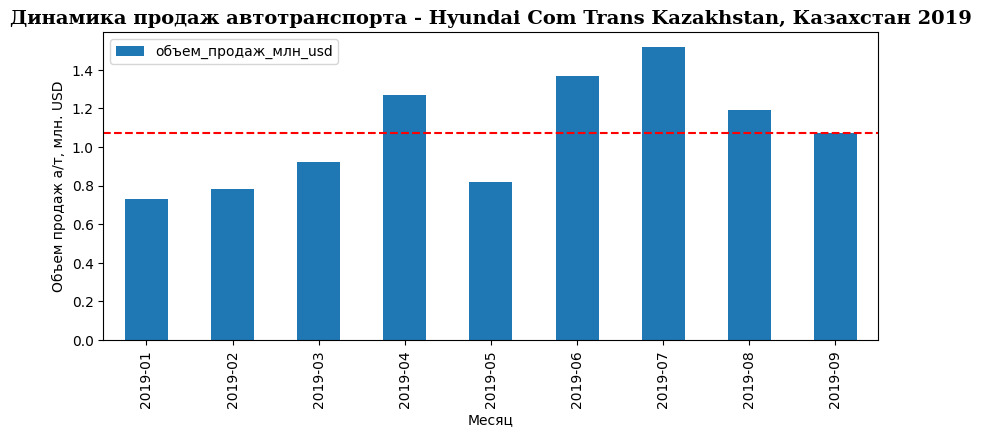


Hino Motors



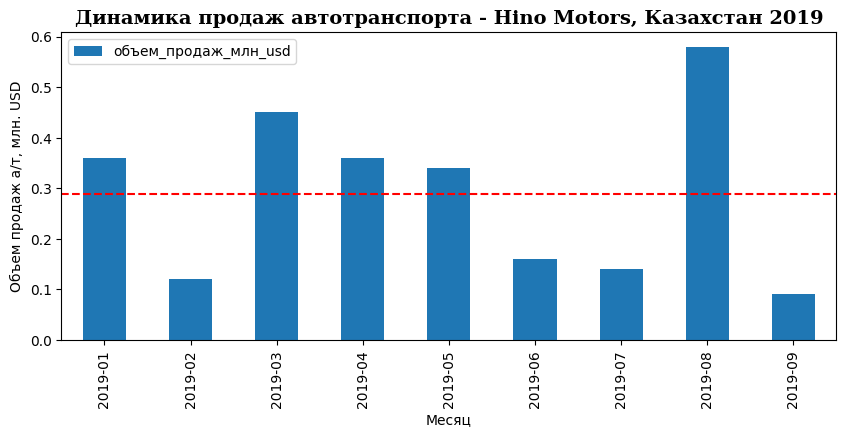


Автомир-Центр



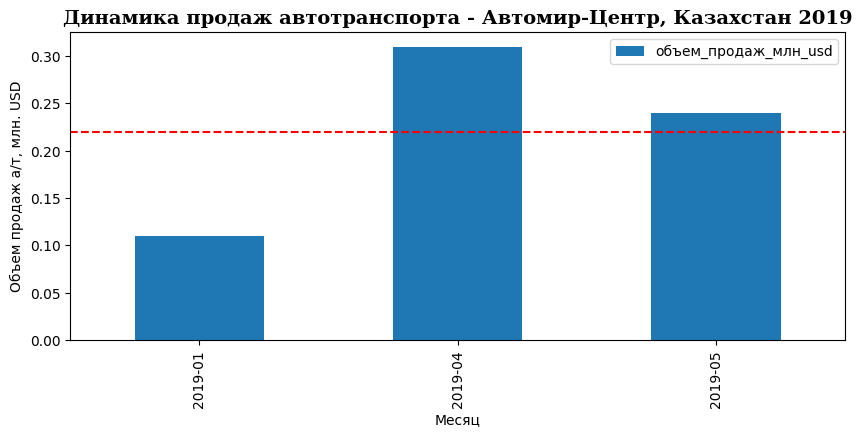


Nissan Manufacturing RUS



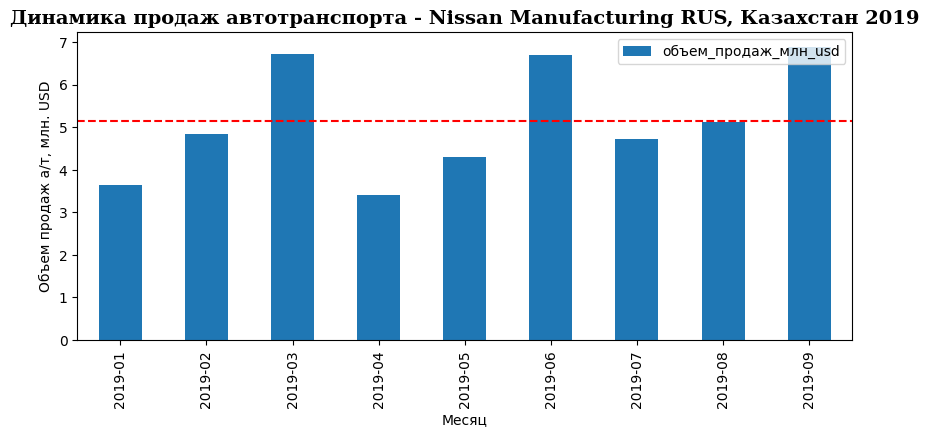


Scania Central Asia



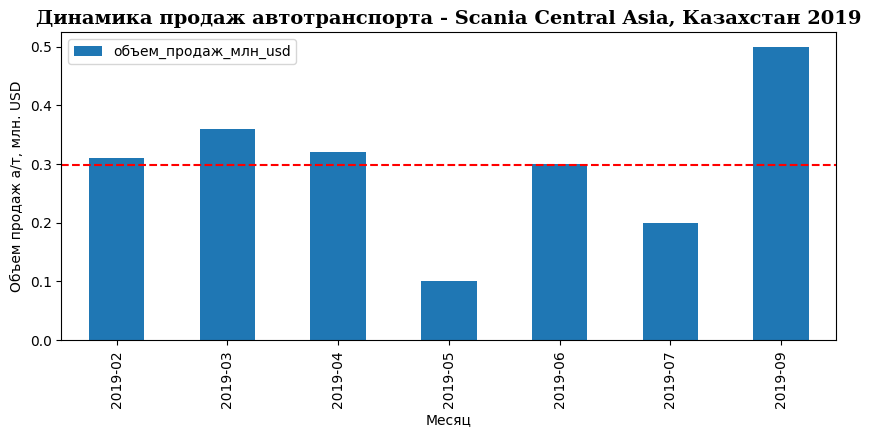


СВС-ТРАНС



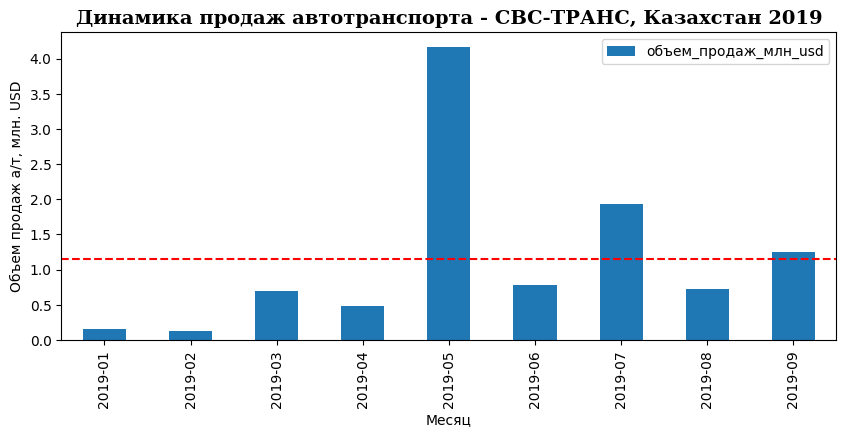


Автодом Motors KST



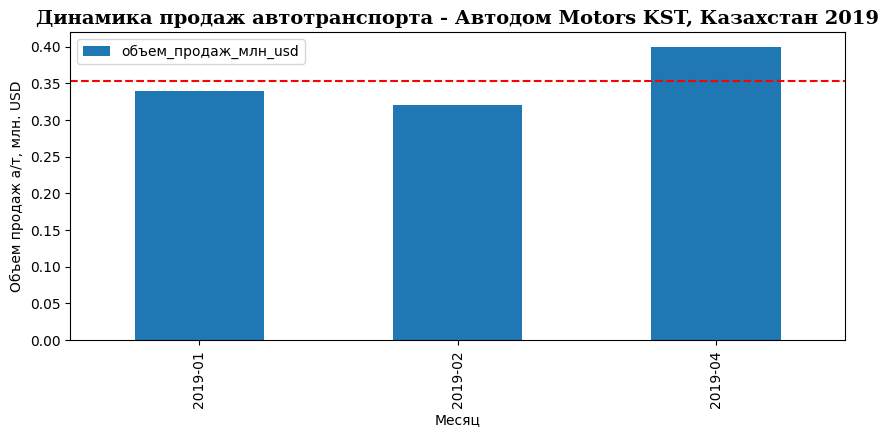


Лифан Моторс Рус



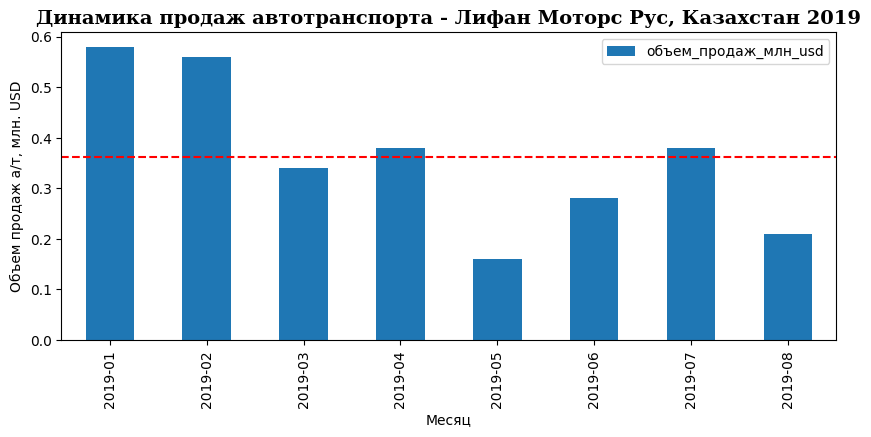


ТОО "Eurasia Motor Zhaik"



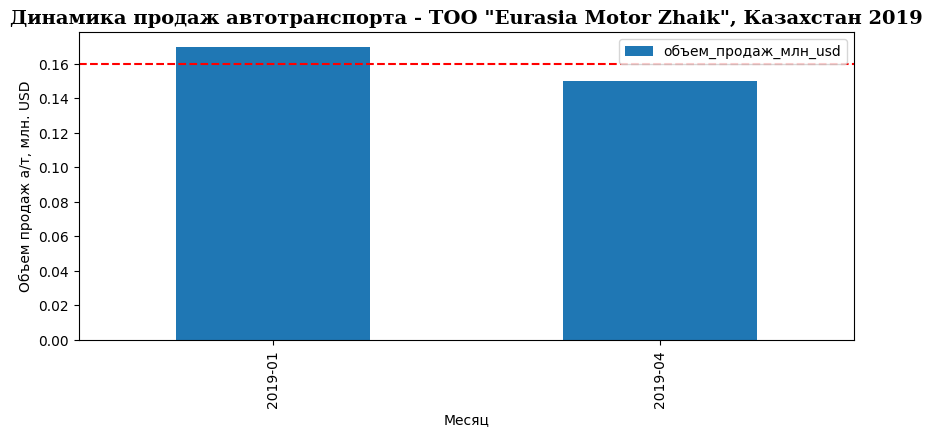


Daewoo Bus Kazakhstan



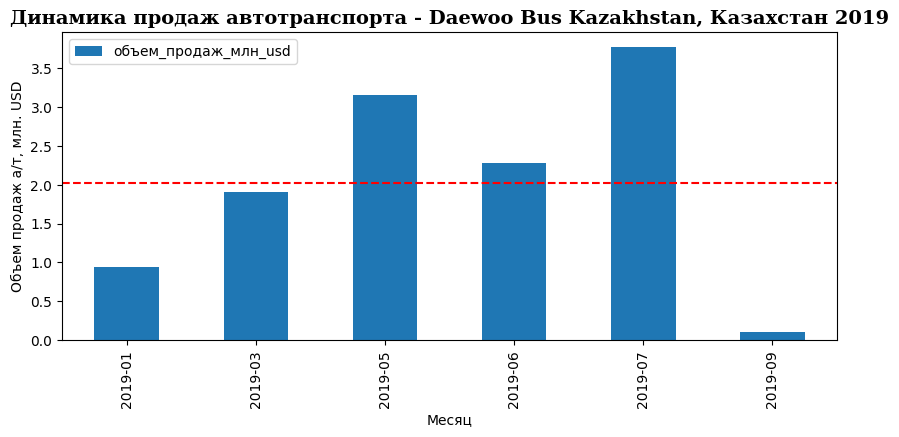


Toyota Motor Kazakhstan



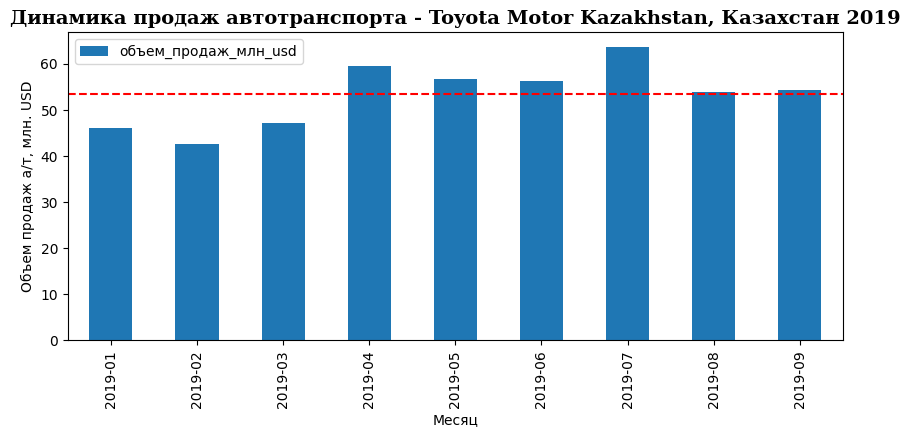


Allur Auto



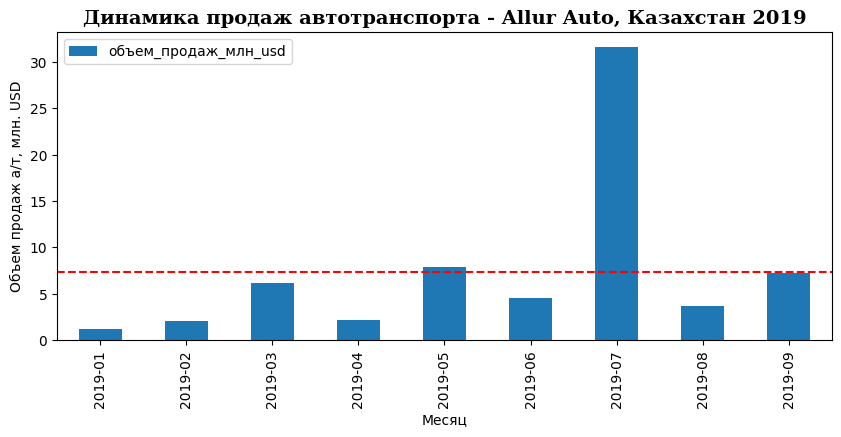


БИПЭК АВТО



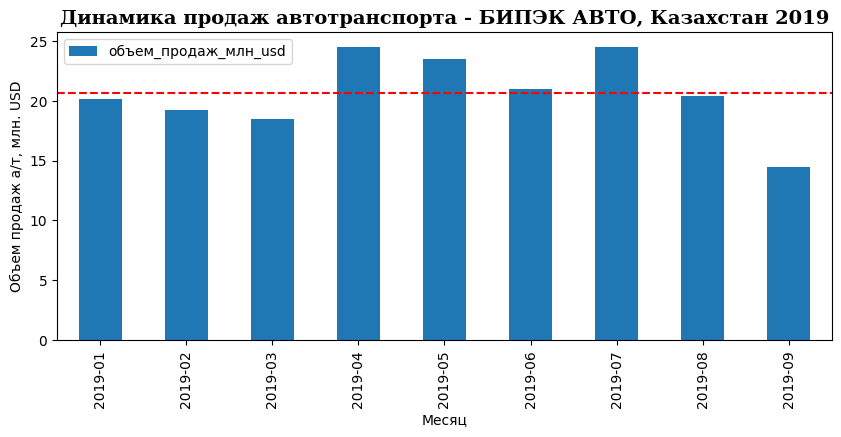


Eurasia Motor Premium



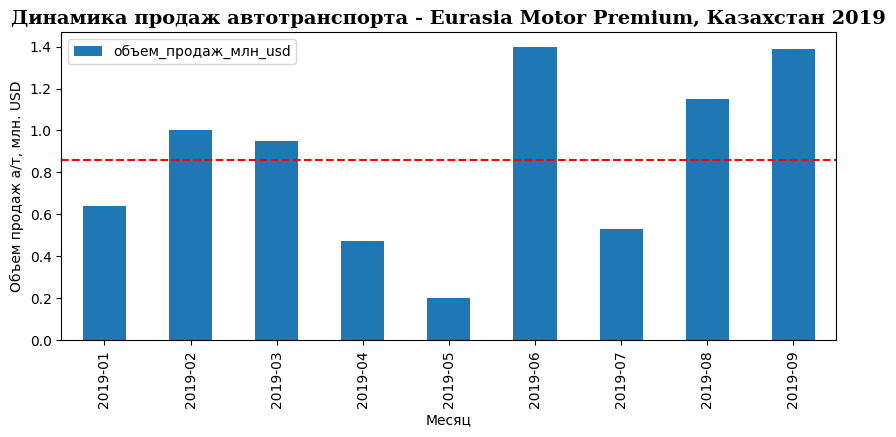


Scandinavian Motors



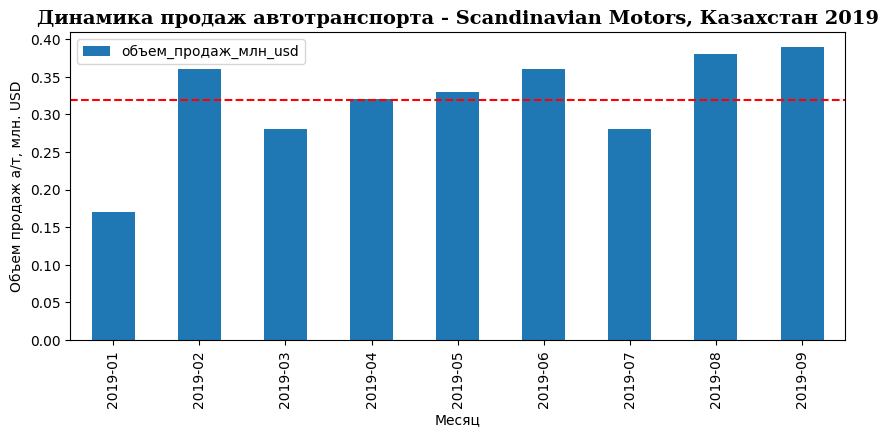


Almaty Motors Premium



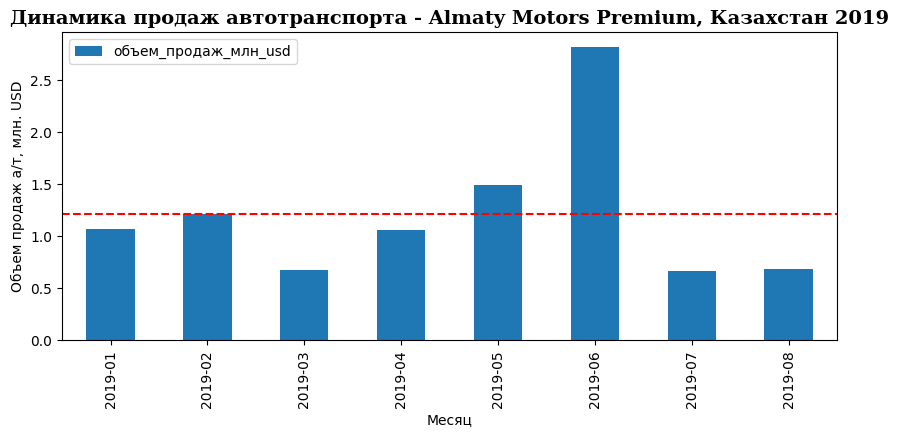


ТК КАМАЗ



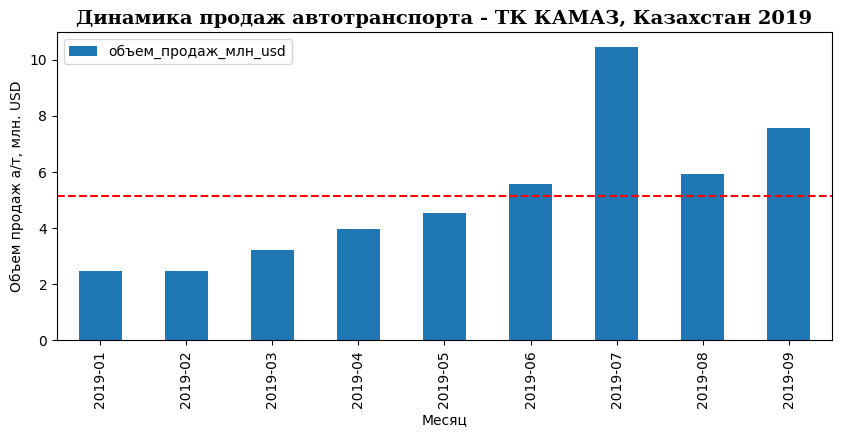


TERRA MOTORS



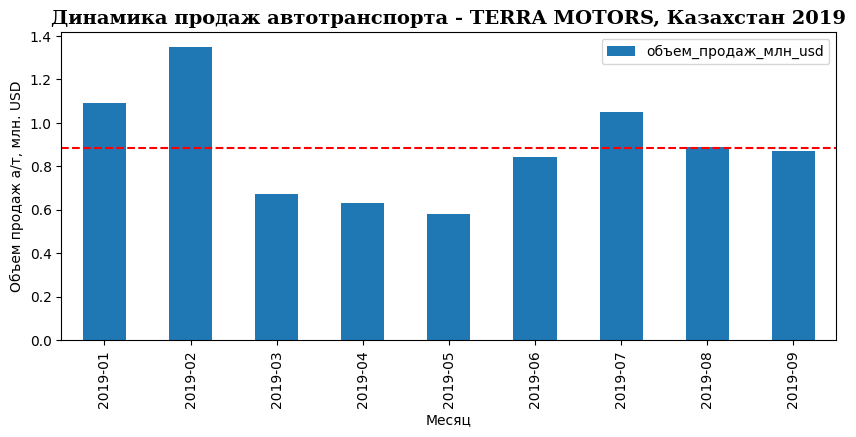


СемАЗ



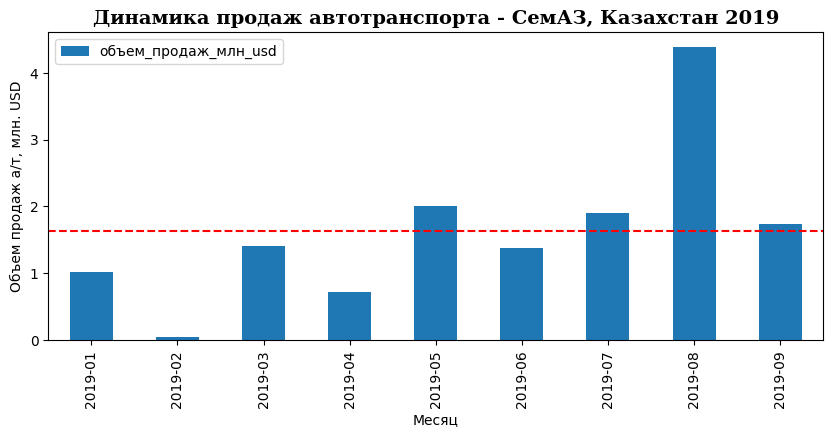


Autokapital



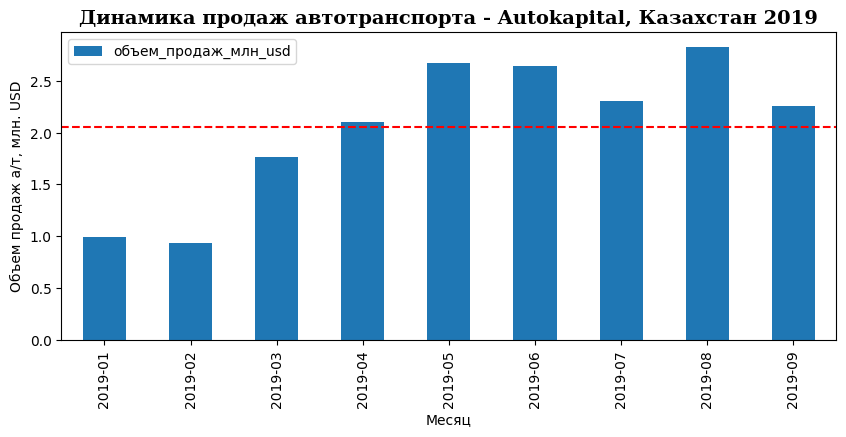


Автомир ГК



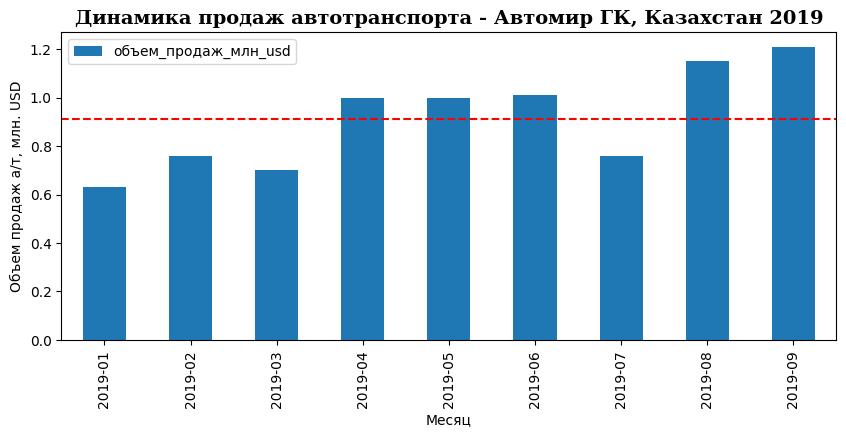


Renault Россия



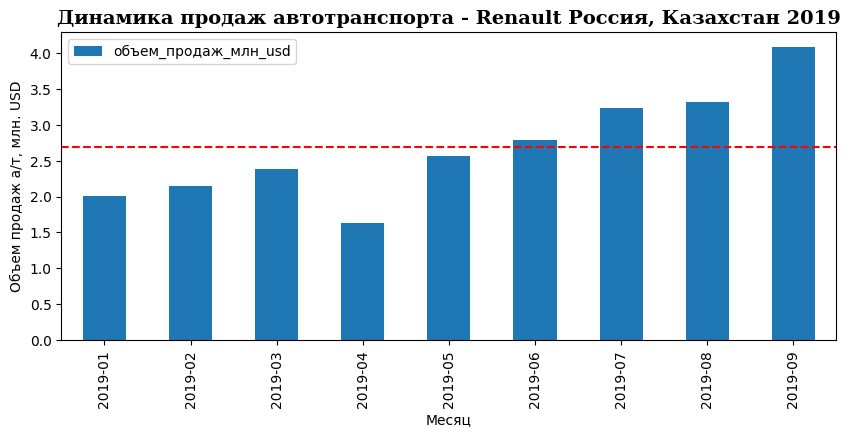


Автоцентр-Бавария



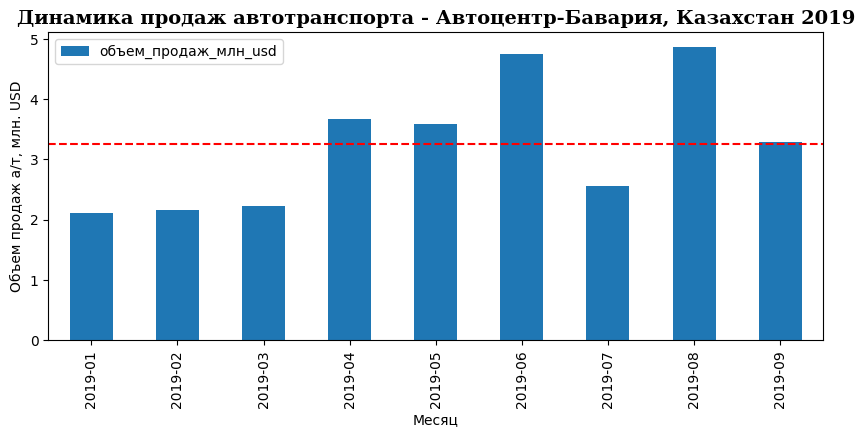


Astana Motors



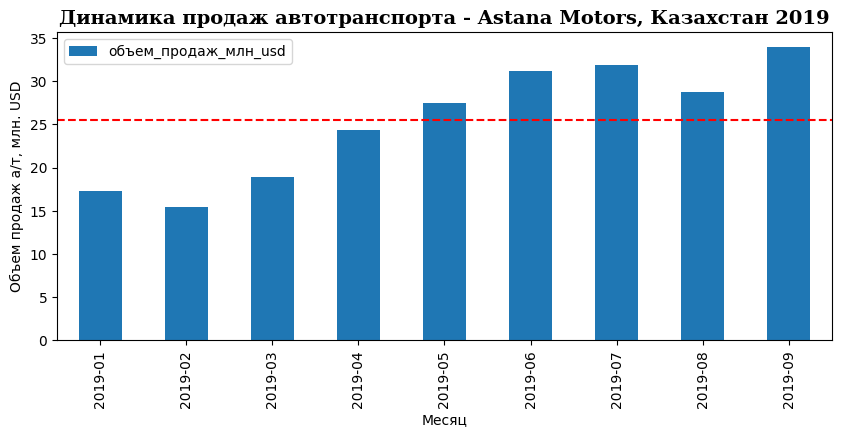

In [53]:
# Построим график динамики продаж в разрезе автоцентров
for i in set(companies_sales['компания'].to_list()):
    print()
    print(i)
    print()
    companies_sales[companies_sales['компания']==i].plot(x = 'год_месяц',
                                                              y = 'объем_продаж_млн_usd',
                                                              kind = 'bar',
                                                              legend = True,
                                                              figsize=(10, 4))
    plt.axhline(y = companies_sales[companies_sales['компания']==i]['объем_продаж_млн_usd'].mean(), color = 'r', linestyle = '--')
    plt.title(f'Динамика продаж автотранспорта - {i}, Казахстан 2019', font={'weight':'bold', 'size': '14', 'family':'serif'})
    plt.xlabel('Месяц')
    plt.ylabel('Объем продаж а/т, млн. USD')
    plt.show()

### **4.10.  Проверка гипотезы: стоимость автомобиля зависит от средней заработной платы по региону(области)**

In [54]:
df['область'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [55]:
# Создадим новый датафрейм с salary зп по областям
salary = {'г.Алматы': 224158,
          'г.Нур-Султан': 266796,
          'Восточно-Казахстанская область': 162182,
          'Западно-Казахстанская область' : 183914,
          'Костанайская область': 145890,
          'Павлодарская область': 160670,
          'Южно-Казахстанская область': 186815,
          'Мангистауская область': 294099,
          'Атырауская область':351103,
          'Актюбинская область':156595,
          'Карагандинская область': 172239,
          'Северо-Казахстанская область': 130233,
          'Акмолинская область': 140272,
          'Кызылординская область': 152085,
          'Жамбылская область': 127043,
          'Туркестанская область': 123853,
          'Алматинская область': 136212,
          'Экспорт область': 186815}
df_salary = pd.DataFrame.from_dict(salary, orient='index'). reset_index()
df_salary.columns = ['область', 'средняя_зп_2019']
df_salary

область  средняя_зп_2019
0                         г.Алматы           224158
1                     г.Нур-Султан           266796
2   Восточно-Казахстанская область           162182
3    Западно-Казахстанская область           183914
4             Костанайская область           145890
5             Павлодарская область           160670
6       Южно-Казахстанская область           186815
7            Мангистауская область           294099
8               Атырауская область           351103
9              Актюбинская область           156595
10          Карагандинская область           172239
11    Северо-Казахстанская область           130233
12             Акмолинская область           140272
13          Кызылординская область           152085
14              Жамбылская область           127043
15           Туркестанская область           123853
16             Алматинская область           136212
17                 Экспорт область           186815

In [56]:
# Объявим функцию test для проверки гипотезы о наличии зависимости между объемом продаж а/м и зп по региону
def test(d):
    df_sales = d.pivot_table(index='область',
                              values='общая_стоимость_заказа(usd)',
                              aggfunc='sum').reset_index()
    df_sales.columns = ['область', 'объем_продаж_общий']
    df_sales = df_sales.merge(df_salary)
    print()
    print('Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей')
    display(df_sales.sort_values(by='объем_продаж_общий', ascending=False).style.background_gradient(cmap='GnBu', axis=0))
    print()
    print("Таблица корреляций между объемом продаж а/м и зп")
    print()
    display(df_sales.corr(numeric_only = True).style.background_gradient(cmap='coolwarm'))
    print()
    print("График scatterplot")
    print()
    plt.figure(figsize=(5, 5))
    plt.scatter(df_sales['объем_продаж_общий'], df_sales['средняя_зп_2019'])
    plt.title('График зависимоти объема продаж а/м от зп в разрезе областей')
    plt.xlabel('Объем продаж, млн. USD')
    plt.ylabel('Cредняя зп 2019, KZT')
    plt.show()

#### **4.10.1. Проверка гипотезы - сегмент 'Легковые автомобили'**


Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей



Таблица корреляций между объемом продаж а/м и зп




График scatterplot



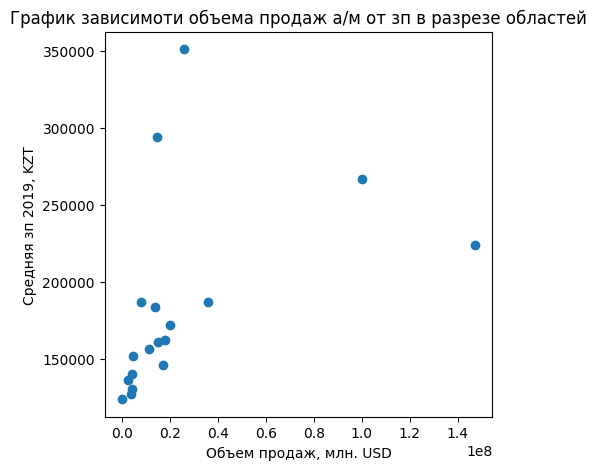

In [57]:
# Запустим функцию test для сегмента 'Легковые автомобили'
test(df[df['сегментация_2013']=='Легковые автомобили'])

____________
_____________
**Промежуточный вывод:**

- в сегменте 'Легковые автомобили' есть слабая положительная корреляция между объемом продаж а/м и средней зп в регионе продаж - 0.44;
- корреляция могла бы быть выше, но есть 2 области с самыми высокими зп в Казахстане: Атырауская и Мангистауская, где продажи а/м меньше, чем в столичных регионах.

Исключим из данных эти 2 области и посмотрим как изменится коэффициент корреляции.
__________
_________


Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей



Таблица корреляций между объемом продаж а/м и зп




График scatterplot



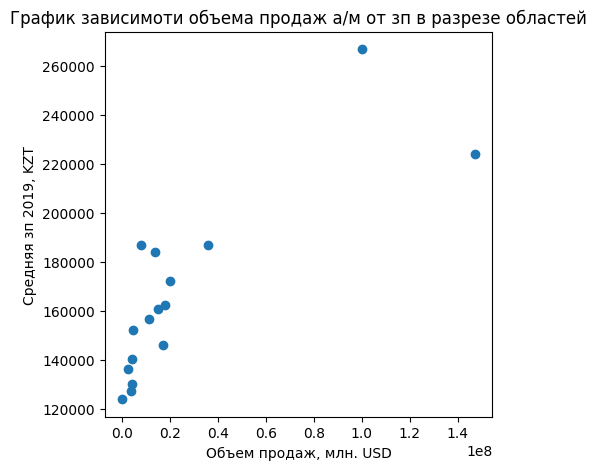

In [58]:
# Запустим функцию test для сегмента 'Легковые автомобили' без Атырауской и Мангистауской областей
test(df[(df['сегментация_2013']=='Легковые автомобили')&(df['область']!='Атырауская область')&(df['область']!='Мангистауская область')])

___________
Предположение подтвердилось, коэффициет корреляции возрос до 0.82
___________

#### **4.10.2. Проверка гипотезы - сегмент 'Внедорожники'**


Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей



Таблица корреляций между объемом продаж а/м и зп




График scatterplot



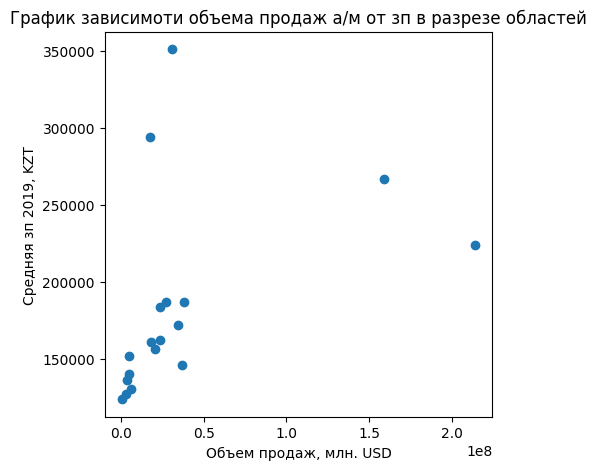

In [59]:
# Запустим функцию test для сегмента 'Внедорожники'
test(df[df['сегментация_2013']=='Внедорожники'])

____________
_____________
**Промежуточный вывод:**

- в сегменте 'Внедорожники' есть слабая положительная корреляция между объемом продаж а/м и средней зп в регионе продаж - 0.41;
- корреляция ниже, чем в сегменте 'Легковые автомобили'.

Скорее всего покупатели внедорожников имеют зп, отличную от средней.
__________
_________

#### **4.10.3. Проверка гипотезы - сегмент 'Коммерческие автомобили'**


Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей



Таблица корреляций между объемом продаж а/м и зп




График scatterplot



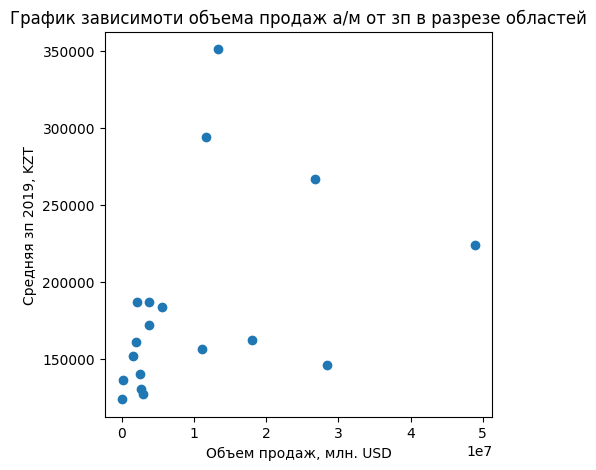

In [60]:
# Запустим функцию test для сегмента 'Коммерческие автомобили'
test(df[df['сегментация_2013']=='Коммерческие автомобили'])

____________
_____________
**Промежуточный вывод:**

- в сегменте 'Коммерческие автомобили' есть слабая положительная корреляция между объемом продаж а/м и средней зп в регионе продаж - 0.39;
- корреляция ниже, чем в сегменте 'Легковые автомобили'.
__________
_________

#### **4.10.4. Проверка гипотезы - сегмент 'Минивэны'**


Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей



Таблица корреляций между объемом продаж а/м и зп




График scatterplot



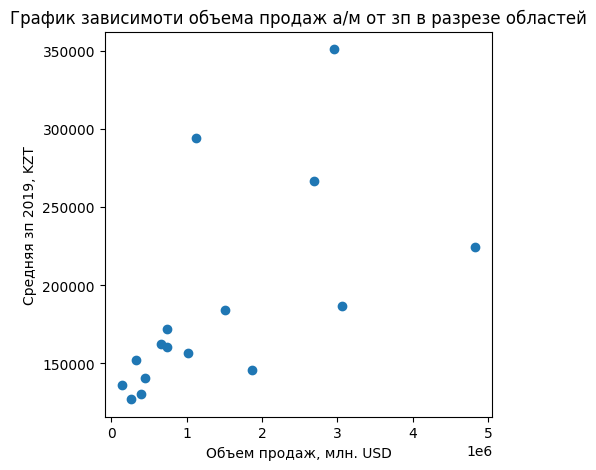

In [61]:
# Запустим функцию test для сегмента 'Минивэны'
test(df[df['сегментация_2013']=='Минивэны'])

____________
_____________
**Промежуточный вывод:**

- в сегменте 'Минивэны' есть слабая положительная корреляция между объемом продаж а/м и средней зп в регионе продаж - 0.59;
- корреляция выше, чем в сегменте 'Легковые автомобили'.

В Атырауской область минивэны пользуются повышенной популярностью.
__________
_________

#### **4.10.5. Проверка гипотезы - сегмент 'Пикапы'**


Таблица объемы продаж а/м и средняя зп за 2019 г. в разрезе областей



Таблица корреляций между объемом продаж а/м и зп




График scatterplot



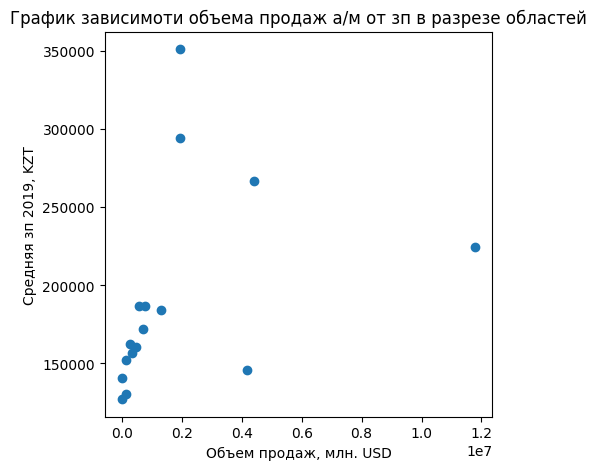

In [62]:
# Запустим функцию test для сегмента  'Пикапы'
test(df[df['сегментация_2013']== 'Пикапы'])

____________
_____________
**Промежуточный вывод:**

- в сегменте 'Пикапы' есть слабая положительная корреляция между объемом продаж а/м и средней зп в регионе продаж - 0.35;
- корреляция существенно ниже, чем в сегменте 'Легковые автомобили'.
__________
_________

#### **4.10.6. Общий вывод по разделу**

- существует слабовыраженная корреляция между объемами продаж автомобилей и средней зп в регионе - значение коэффициента корреляции Пирсона от 0.35 до 0.59 в зависимости от сегмента а/м;

- коэффициент корреляции мог бы быть выше - до 0.89, но есть 2 области: Атырауская и Мангистауская с высокой средней зп, сравнительно низкой численностью населения и объемами продаж ниже столичных областей.

Таким образом, для получения объективной картины не достаточно показателя средняя зп:
- средняя зп не характеризует потребителей коммерческих и люксовых а/м;
- объем продаж зависит не только от зп, но и от численности населения региона и от темпов его прироста.

### **4.11.  RFM-анализ моделей авто (показатели Frequency и Monetary)**

**Справка:**

https://habr.com/ru/companies/otus/articles/666862/

https://alimbekov.com/rfm-python/

**RFM** — это метод, используемый для анализа потребительской ценности.

Он группирует клиентов на основе истории их транзакций:

**Recency (Давность)** — Как давно клиент совершил покупку?

**Frequency (Частота)** — Как часто они совершают покупки?

**Monetary Value (Денежная ценность)** — Сколько они тратят?

Для расчета RFM показателей используют квинтили — составление четырех равных частей на основе доступных значений.

RFM — это простая структура для количественной оценки поведения клиентов. Многие пользователи дополнили и расширили модель сегментации RFM, создав ее вариации.

Одна из возможных вариаций - RFM анализ моделей а/м.

**RFM-сегментация моделей ответит на вопросы:**

- какие ваши модели популярны?

- какие модели теряют популярность?

- каким моделям не нужно уделять много внимания?

- какие модели имеют потенциал?

- какие модели включить в текущую рекламную кампанию?

____________________________
Согласно ТЗ:

- ограничимся 2-мя показателями: Frequency и Monetary.
________________

In [63]:
# Создадим датафрейм df_rfm
df_rfm = df.groupby(['модель', 'бренд']).agg({'год_месяц':'max', 'количество':'sum', 'общая_стоимость_заказа(usd)':'sum'}).reset_index()
df_rfm.columns = ['модель', 'бренд', 'recency', 'frequency','monetary']
df_rfm.head(2)

модель бренд  recency  frequency     monetary
0   2206   UAZ  2019-09        159 2,338,284.70
1   2217   GAZ  2019-08          3    69,546.96

In [64]:
# Создадим в датафрейме df_rfm с условно текущей датой
df_rfm['now'] = '2019-10'
df_rfm['now'] = pd.to_datetime(df_rfm['now'])

In [65]:
# Преобразуем показатель recency в число
df_rfm['recency'] = df_rfm['recency'].apply(lambda x: str(x))
df_rfm['recency'] = pd.to_datetime(df_rfm['recency'])
df_rfm['recency'] = df_rfm['now'] - df_rfm['recency']
df_rfm['recency'] = df_rfm['recency'].apply(lambda x: int(x.days))
df_rfm = df_rfm.drop('now', axis=1)
df_rfm.head(2)

модель бренд  recency  frequency     monetary
0   2206   UAZ       30        159 2,338,284.70
1   2217   GAZ       61          3    69,546.96

In [66]:
# Изучим фатафрейм df_rfm с помощью метода .info()
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   модель     273 non-null    object 
 1   бренд      273 non-null    object 
 2   recency    273 non-null    int64  
 3   frequency  273 non-null    int64  
 4   monetary   273 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.8+ KB


In [67]:
# Рассчитаем квинтили
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75], numeric_only=True)
quantiles

recency  frequency     monetary
0.25    30.00       4.00   218,152.52
0.50    30.00      20.00   844,417.46
0.75    92.00      89.00 3,191,632.88

In [68]:
# Преобразуем датафрейм quantiles в словарь для удобства
quantiles = quantiles.to_dict()

In [69]:
# Создадим в датафрейме rfm_segment столбцы с rfm оценками и rfm классом моделей
rfm_segment = df_rfm.copy()

def r_class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def fm_class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

rfm_segment['r_quartile'] = rfm_segment['recency'].apply(r_class, args=('recency',quantiles,))
rfm_segment['f_quartile'] = rfm_segment['frequency'].apply(fm_class, args=('frequency',quantiles,))
rfm_segment['m_quartile'] = rfm_segment['monetary'].apply(fm_class, args=('monetary',quantiles,))
rfm_segment['class_rfm'] = rfm_segment.m_quartile.map(str) + rfm_segment.f_quartile.map(str) + rfm_segment.r_quartile.map(str)
rfm_segment['class_rfm'] = rfm_segment['class_rfm'].astype(int)
rfm_segment['rfm_модель'] = rfm_segment['модель'] + ' ' + rfm_segment['бренд']
rfm_segment.sort_values(by=['class_rfm', 'frequency'], ascending=False)

модель          бренд  recency  frequency       monetary  \
87                Camry         Toyota       30       4853 155,748,737.03   
125              Granta           Lada       30       3664  26,671,905.26   
240              Tucson        Hyundai       30       3271  87,315,647.39   
245               Vesta           Lada       30       2653  31,116,273.67   
32                  4x4           Lada       30       2469  22,338,600.00   
64               Accent        Hyundai       30       2211  36,481,915.33   
110             Elantra        Hyundai       30       2062  41,269,145.36   
96                Creta        Hyundai       30       1775  35,222,267.04   
146            LC Prado         Toyota       30       1711  83,134,112.00   
169            Nexia R3          Ravon       30       1700  16,714,970.76   
150              Largus           Lada       30       1683  19,173,200.00   
208                  S3            Jac       30       1355  17,847,416.88   
196                RAV4         Toyota       30       1213  33,725,129.08   
93              Corolla         Toyota       30       1089  33,896,786.46   
184                Polo     Volkswagen       30       1032  15,715,322.36   
12                 3302            GAZ       30        998  15,664,492.91   
205                 Rio            Kia       30        993  13,755,500.00   
137            HILUX DC         Toyota       30        827  25,436,705.46   
147               LC200         Toyota       30        779  57,893,775.54   
104              Duster        Renault       30        707   9,085,685.36   
214            Santa Fe        Hyundai       30        639  23,288,660.96   
265                XRAY           Lada       30        602   8,276,800.00   
192             Qashqai         Nissan       30        601  15,049,695.79   
230             Terrano         Nissan       30        582   9,462,359.91   
171                Niva      Chevrolet       30        567   5,943,286.22   
209                  S5            Jac       30        486   7,422,808.44   
198                  RX          Lexus       30        442  24,363,857.56   
213             Sandero        Renault       30        441   5,669,923.47   
170                Next            GAZ       30        416   8,900,971.80   
247             X-Trail         Nissan       30        409  13,414,339.96   
18                 3909            UAZ       30        390   4,838,746.49   
218             Sorento            Kia       30        388  12,075,200.00   
172             Octavia          Skoda       30        383   7,188,100.00   
220            Sportage            Kia       30        356   7,947,700.00   
92               Cerato            Kia       30        348   6,208,800.00   
149                  LX          Lexus       30        332  33,640,568.81   
181             Patriot            UAZ       30        323   5,106,565.44   
152               Logan        Renault       30        320   3,750,532.33   
115            Forester         Subaru       30        291   8,992,357.10   
175           Outlander     Mitsubishi       30        291   9,013,600.70   
46                65115          KAMAZ       30        258  12,541,093.46   
135            HFF6850G          ANKAI       30        240  19,592,899.99   
143              Kaptur        Renault       30        230   3,812,627.63   
136          HIGHLANDER         Toyota       30        197  10,538,908.25   
231              Tiguan     Volkswagen       30        194   6,376,433.30   
168                  NX          Lexus       30        192   8,164,268.17   
22                43118          KAMAZ       30        188   9,818,009.82   
217              Sonata        Hyundai       30        188   4,839,210.54   
81                 CX-5          Mazda       30        182   4,951,893.27   
107                  ES          Lexus       30        180   7,580,553.41   
224              Superb          Skoda       30        176   6,251,002.50   
253          

In [85]:
# Узнаем количество моделей в каждом rfm_сегменте
rfm_segment_model_count = rfm_segment.groupby('class_rfm').agg({'модель':'nunique', 'frequency':'sum', 'monetary':'sum'}).reset_index()
rfm_segment_model_count.columns = ['class_rfm', 'model_counts', 'frequency_sum', 'monetary_sum']
rfm_segment_model_count['frequency_%'] = round(rfm_segment_model_count['frequency_sum']/(rfm_segment_model_count['frequency_sum'].sum())*100, 2)
rfm_segment_model_count['monetary_%'] = round(rfm_segment_model_count['monetary_sum']/(rfm_segment_model_count['monetary_sum'].sum())*100, 2)
rfm_segment_model_count.style.background_gradient(cmap='GnBu', axis=0)

In [79]:
# Узнаем сколько моделей присутствует на рынке а/т Казахстана
df['модель'].nunique()

272

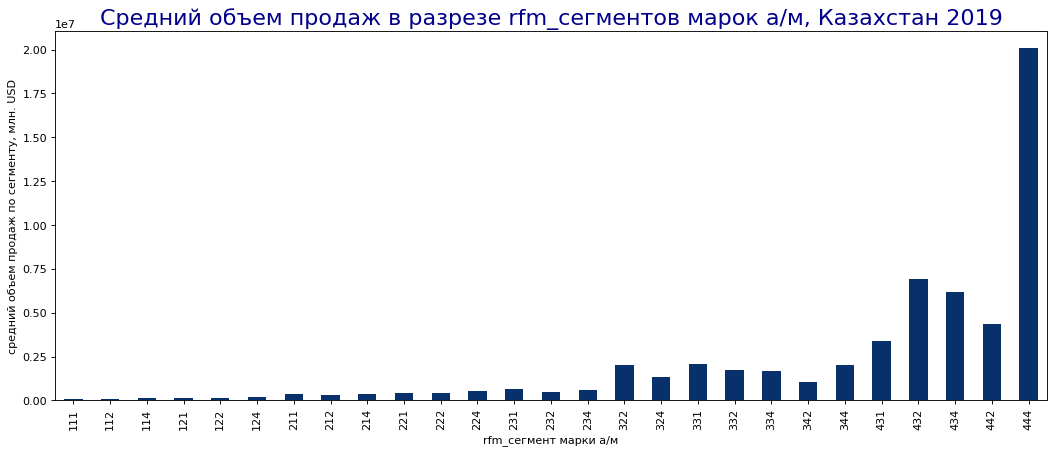

In [70]:
# Посмотри среднюю выручка от продаж марок а/м каждого rfm_сегмента на графике
fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
rfm_segment.groupby('class_rfm').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')
plt.xlabel('rfm_сегмент марки а/м')
plt.ylabel('средний объем продаж по сегменту, млн. USD')
plt.title('Средний объем продаж в разрезе rfm_сегментов марок а/м, Казахстан 2019', size=20, color='darkblue')
plt.show()

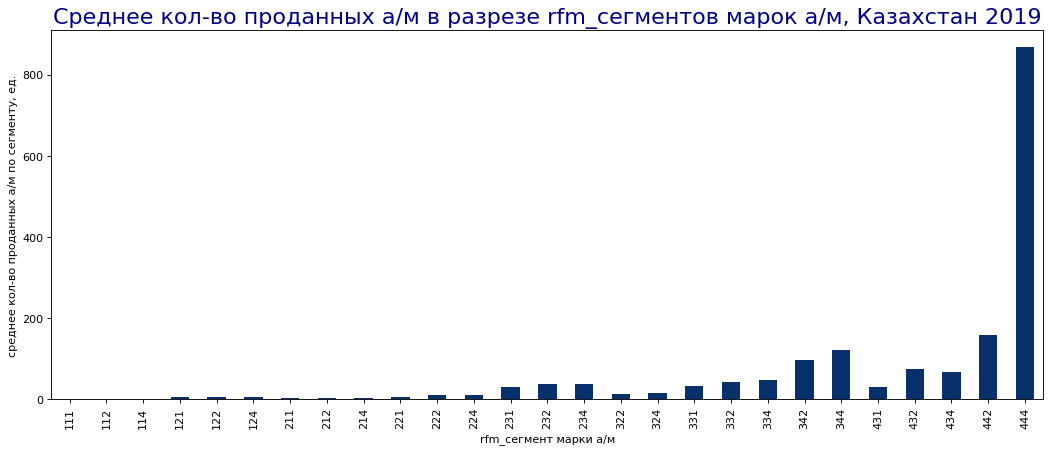

In [71]:
# Посмотри среднее количество продаж марок а/м каждого rfm_сегмента на графике
fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
rfm_segment.groupby('class_rfm').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')
plt.xlabel('rfm_сегмент марки а/м')
plt.ylabel('среднее кол-во проданных а/м по сегменту, ед.')
plt.title('Среднее кол-во проданных а/м в разрезе rfm_сегментов марок а/м, Казахстан 2019', size=20, color='darkblue')
plt.show()

In [72]:
# Создадим датафрейм rfm_segment_2 для построения графика heatmap
# Посмотрим кол-во моделей в разрезе марок и rfm_сегмента
rfm_segment_2 = rfm_segment.pivot_table(index="бренд", columns='class_rfm', values="rfm_модель", aggfunc='count')
rfm_segment_2 = rfm_segment_2.fillna(0)
rfm_segment_2.style.background_gradient(cmap='GnBu', axis=0)

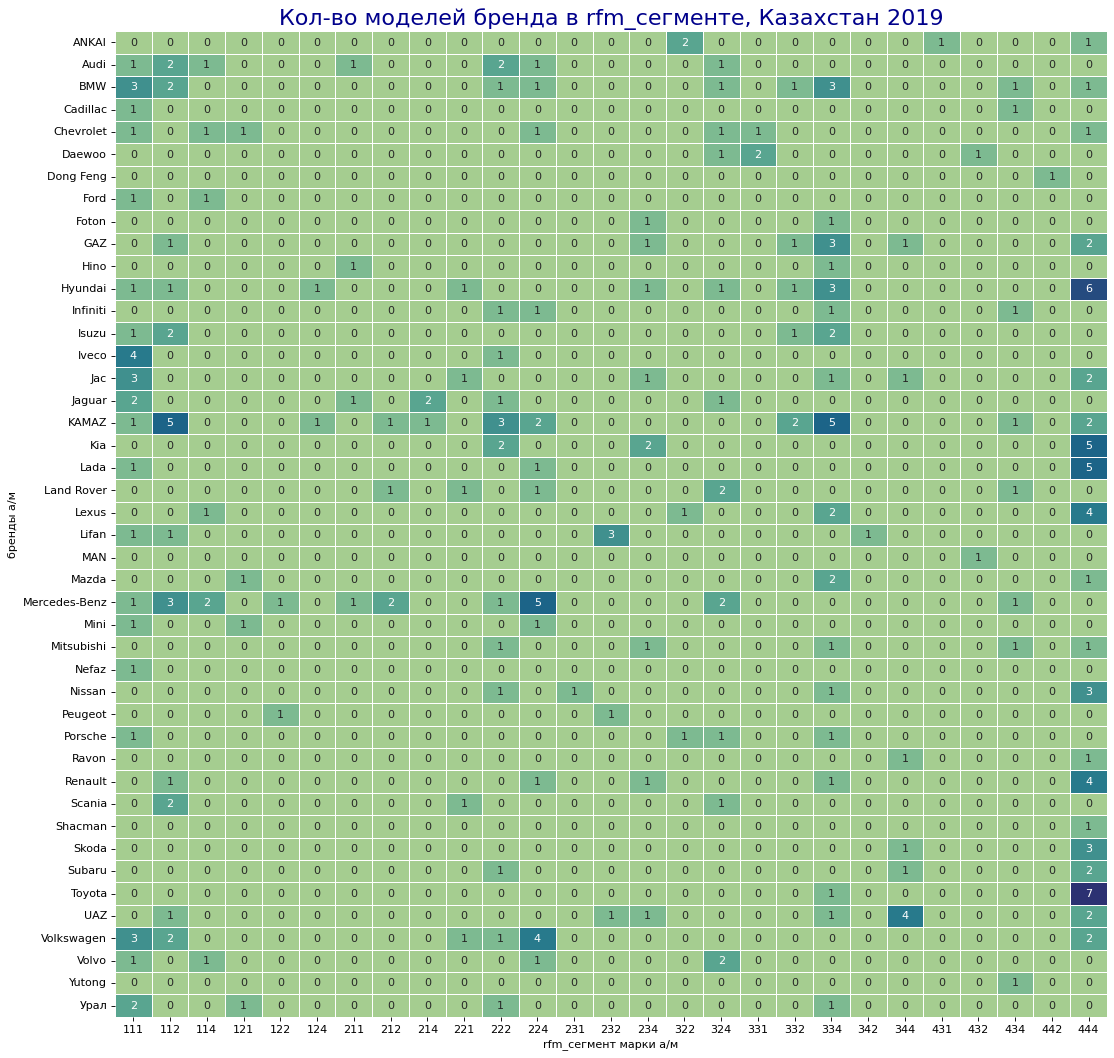

In [73]:
# Построим график heatmap кол-во моделей в разрезе марок и rfm_сегмента
fig=plt.figure(figsize=(16, 16), dpi= 80)
sns.heatmap(rfm_segment_2, annot=True, fmt=".0f", linewidth=.5, cmap="crest", cbar= False)
plt.xlabel('rfm_сегмент марки а/м')
plt.ylabel('бренды а/м')
plt.title('Кол-во моделей бренда в rfm_сегменте, Казахстан 2019', size=20, color='darkblue')
plt.show()

**Как использовать результаты RFM анализа**

Цель RFM анализа сформировать сегменты и в зависимости от сегмента воздействовать на них определенным образом.

Например: какие модели заказать,предложить бонус, льготу, отправить push или email уведомление потенциальным покупателям. Важно делать это таргетировано.

Эффект от использования RFM анализа может быть следующим: повысить объемы продаж, повысить доходы, повысить лояльность клиентов.

Примеры интерпретации сегментов RFM анализа:

R=5, F=5, M=5 — высокая выручка, много единиц продано и недавно. Самые популярные марки.

R=1, F=1, M=1 — выручка низкая, продается редко и давно. Скорее всего забытые марки. Возможно не стоит предпринимать действия по активизации их продаж.

R=1/2, F=4/5, M=4/5 — теряющие популярность модели. Предлагаем по ним бонус, скидку и пытаемся их продать.

R=4/5, F=1, M=1/2/3/4/5 — недавно продаваемые модели. Пробуем стимулировать их продажи.

________________
________________
**Промежуточный вывод:**
- на рынке присутствуют 56 популярных моделей - rfm_сегмент 444;
- 54 модели на рынке относятся к разряду "забытых" - rfm_сегмент 111 - 112;
- всего 272 модели представлены на рынке;
- модели rfm_сегмента 444 обеспечивают 83% от общей выручки на рынке;
- модели rfm_сегмента 444 обеспечивают 90% от общего кол-во единиц проданных на рынке а/м.

_________________
_________________

### **4.12.  Итоговый вывод по разделу**

- емкость рынка коммерческого автотранспорта Казахстана:
     - средняя месячная емкость в еденицах а/м - 612 ед.;
     - средняя месячная емкость в USD - 22 млн.USD;
     - прогнозная емкость за 2019 г. в еденицах а/м - 7340 ед.;
     - прогнозная емкость за 2019 г. в USD - 260 млн.USD.
- емкость рынка некоммерческого автотранспорта Казахстана:
     - средняя месячная емкость в еденицах а/м - 5670 ед.;
     - средняя месячная емкость в USD - 135 млн.USD;
     - прогнозная емкость за 2019 г. в еденицах а/м - 68 100 ед.;
     - прогнозная емкость за 2019 г. в USD - 1 629 млн.USD.
- Модель - лидер продаж на рынке коммерческого автотранспорта Казахстана - малотоннажный грузовик GAZ 3302 - Газель.
- Модель - лидер продаж на рынке некоммерческого автотранспорта Казахстана - легковой а/м Toyota Camry.
- Марка - лидер продаж на рынке коммерческого автотранспорта Казахстана - GAZ - Горьковский автомобильный завод.
- Марка - лидер продаж на рынке некоммерческого автотранспорта Казахстана - Lada - АО «АвтоВАЗ».
- объем продаж коммерческого а/т не имеет четко выраженной динамики по месяцам и зависит от отдельных сделок.
- объем продаж некоммерческого а/т имеет сезонный характер: I квартал- снижение, IV квартал - рост;.
- регионы-лидеры по объемам продаж: г.Алматы и г.Нур-Султан на них приходится 53% об общего объема продаж.
- автоцентры-лидеры по объемам продаж: Toyota Motor Kazakhstan и Astana Motors на них приходится 52% об общего объема продаж.
- существует слабовыраженная корреляция между объемами продаж автомобилей и средней зп в регионе - значение коэффициента корреляции Пирсона от 0.35 до 0.59 в зависимости от сегмента а/м.
- на рынке присутствуют 56 популярных моделей - rfm_сегмент 444, они обеспечивают 83% от общей выручки на рынке и 90% от общего кол-во единиц проданных на рынке а/м.

